In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/HepatitisCdata.csv')
df.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [5]:
df.shape

(615, 14)

In [6]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [7]:
df=df.fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         615 non-null    float64
 5   ALP         615 non-null    float64
 6   ALT         615 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        615 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        615 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [9]:
df.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [10]:
df.describe()

Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  615.000000  615.000000  615.000000  615.000000   
mean   308.000000   47.408130   41.552520   66.285366   28.404553   34.786341   
std    177.679487   10.055105    6.014807   28.112329   25.474786   33.090690   
min      1.000000   19.000000    0.000000    0.000000    0.000000   10.600000   
25%    154.500000   39.000000   38.800000   51.700000   16.400000   21.600000   
50%    308.000000   47.000000   41.900000   65.300000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   79.300000   33.050000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  615.000000   615.000000  615.000000  615.000000  
mean    11.396748    8.196634    5.280813    81.287805   39.533171   71.926992  
std     19.673150    2.205657    1.312962    49.756166   54.661071    6.130297  
min      0.800000    1.420000    0.000000     8.000000    4.500000    0.000000  
25%      5.300000    6.935000    4.580000    67.000000   15.700000   69.300000  
50%      7.300000    8.260000    5.290000    77.000000   23.300000   72.200000  
75%     11.200000    9.590000    6.055000    88.000000   40.200000   75.400000  
max    254.000000   16.410000    9.670000  1079.100000  650.900000   90.000000

In [12]:
df.corr().describe().T

count      mean       std       min       25%       50%       75%  \
Unnamed: 0   12.0  0.099469  0.366475 -0.315866 -0.122630 -0.031666  0.268992   
Age          12.0  0.123955  0.319260 -0.208897 -0.035496  0.060579  0.145077   
ALB          12.0  0.077203  0.385469 -0.315866 -0.196419 -0.037819  0.248408   
ALP          12.0  0.129957  0.301121 -0.088372 -0.036534  0.021757  0.148033   
ALT          12.0  0.135072  0.293940 -0.042857 -0.031662  0.022841  0.171377   
AST          12.0  0.153237  0.353478 -0.208536 -0.064105  0.039275  0.317330   
BIL          12.0  0.058688  0.358256 -0.333172 -0.205594  0.010646  0.190351   
CHE          12.0  0.102921  0.370255 -0.333172 -0.134893  0.021144  0.328309   
CHOL         12.0  0.125385  0.326150 -0.207026 -0.052441  0.071773  0.211259   
CREA         12.0  0.092399  0.292341 -0.042857 -0.025556 -0.016272  0.053668   
GGT          12.0  0.205641  0.315910 -0.163287 -0.033655  0.185055  0.270740   
PROT         12.0  0.118814  0.352678 -0.272408 -0.075287 -0.025304  0.241027   

            max  
Unnamed: 0  1.0  
Age         1.0  
ALB         1.0  
ALP         1.0  
ALT         1.0  
AST         1.0  
BIL         1.0  
CHE         1.0  
CHOL        1.0  
CREA        1.0  
GGT         1.0  
PROT        1.0

In [13]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    308.000000
Age            47.408130
ALB            41.552520
ALP            66.285366
ALT            28.404553
AST            34.786341
BIL            11.396748
CHE             8.196634
CHOL            5.280813
CREA           81.287805
GGT            39.533171
PROT           71.926992
dtype: float64

In [14]:
df.min()

Unnamed: 0                1
Category      0=Blood Donor
Age                      19
Sex                       f
ALB                     0.0
ALP                     0.0
ALT                     0.0
AST                    10.6
BIL                     0.8
CHE                    1.42
CHOL                    0.0
CREA                    8.0
GGT                     4.5
PROT                    0.0
dtype: object

In [15]:
df.max()

Unnamed: 0            615
Category      3=Cirrhosis
Age                    77
Sex                     m
ALB                  82.2
ALP                 416.6
ALT                 325.3
AST                 324.0
BIL                 254.0
CHE                 16.41
CHOL                 9.67
CREA               1079.1
GGT                 650.9
PROT                 90.0
dtype: object

In [16]:
df.skew()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0     0.000000
Age            0.267134
ALB           -0.664161
ALP            3.378721
ALT            5.497007
AST            4.940327
BIL            8.385437
CHE           -0.110233
CHOL          -0.678965
CREA          15.169291
GGT            5.632734
PROT          -3.253191
dtype: float64

In [17]:
df.interpolate()

Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0    0.0   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0    0.0  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1  69.0  
1    11.17  4.80   74.0   15.6  76.5  
2     8.84  5.20   86.0   33.2  79.3  
3     7.33  4.74   80.0   33.8  75.7  
4     9.15  4.32   76.0   29.9  68.7  
..     ...   ...    ...    ...   ...  
610   5.57  6.30   55.7  650.9  68.5  
611   1.54  3.02   63.0   35.9  71.3  
612   1.66  3.63   66.7   64.2  82.0  
613   3.56  4.20   52.0   50.0  71.0  
614   9.07  5.30   67.0   34.0  68.0  

[615 rows x 14 columns]

In [18]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Unnamed: 0" is
 1      1
414    1
407    1
408    1
409    1
      ..
207    1
208    1
209    1
210    1
615    1
Name: Unnamed: 0, Length: 615, dtype: int64
-------------------------------------------------
unique values in column "Category" is
 0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64
-------------------------------------------------
unique values in column "Age" is
 46    32
48    28
33    25
51    24
52    22
50    21
49    21
35    21
38    20
53    20
37    20
43    20
44    20
47    20
56    20
45    19
34    19
59    18
32    17
57    16
36    16
41    16
39    15
40    14
55    14
42    13
54    12
60    12
58    10
61     9
64     9
62     8
65     8
63     6
68     4
66     4
67     3
70     3
71     3
76     2
74     2
29     2
77     1
19     1
23     1
25     1
27     1
30     1
75     1
Name: Age, dtype: int64

In [19]:
df.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [20]:
df=df.drop(['Unnamed: 0'],axis='columns')

In [21]:
df.head()

Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
3  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  
0  12.1  69.0  
1  15.6  76.5  
2  33.2  79.3  
3  33.8  75.7  
4  29.9  68.7

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
df['Category']=le.fit_transform(df['Category'])

In [26]:
df.tail()

Category  Age Sex   ALB    ALP    ALT    AST   BIL   CHE  CHOL  CREA  \
610         4   62   f  32.0  416.6    5.9  110.3  50.0  5.57  6.30  55.7   
611         4   64   f  24.0  102.8    2.9   44.4  20.0  1.54  3.02  63.0   
612         4   64   f  29.0   87.3    3.5   99.0  48.0  1.66  3.63  66.7   
613         4   46   f  33.0    0.0   39.0   62.0  20.0  3.56  4.20  52.0   
614         4   59   f  36.0    0.0  100.0   80.0  12.0  9.07  5.30  67.0   

       GGT  PROT  
610  650.9  68.5  
611   35.9  71.3  
612   64.2  82.0  
613   50.0  71.0  
614   34.0  68.0

In [27]:
x=df.drop(['Sex'],axis='columns')
y=df.Sex.values

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


72.43243243243244

In [30]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

           f       0.68      0.58      0.62        73
           m       0.75      0.82      0.78       112

    accuracy                           0.72       185
   macro avg       0.71      0.70      0.70       185
weighted avg       0.72      0.72      0.72       185



In [31]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

69.72972972972973

In [32]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           f       0.60      0.68      0.64        73
           m       0.77      0.71      0.74       112

    accuracy                           0.70       185
   macro avg       0.69      0.70      0.69       185
weighted avg       0.71      0.70      0.70       185



In [33]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

78.37837837837837

In [34]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           f       0.75      0.67      0.71        73
           m       0.80      0.86      0.83       112

    accuracy                           0.78       185
   macro avg       0.78      0.76      0.77       185
weighted avg       0.78      0.78      0.78       185



In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

75.67567567567568

In [37]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           f       0.69      0.70      0.69        73
           m       0.80      0.79      0.80       112

    accuracy                           0.76       185
   macro avg       0.75      0.75      0.75       185
weighted avg       0.76      0.76      0.76       185



In [38]:
from sklearn.ensemble import BaggingClassifier

In [39]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

73.51351351351352

In [40]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           f       0.65      0.71      0.68        73
           m       0.80      0.75      0.77       112

    accuracy                           0.74       185
   macro avg       0.73      0.73      0.73       185
weighted avg       0.74      0.74      0.74       185



In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pred_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pred_gau)*100
accu_l

55.67567567567567

In [43]:
print(classification_report(ytest,pred_gau))

              precision    recall  f1-score   support

           f       0.47      0.82      0.59        73
           m       0.77      0.38      0.51       112

    accuracy                           0.56       185
   macro avg       0.62      0.60      0.55       185
weighted avg       0.65      0.56      0.54       185



In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pred_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pred_etc)*100
accu_etc

81.62162162162161

In [46]:
print(classification_report(ytest,pred_etc))

              precision    recall  f1-score   support

           f       0.78      0.74      0.76        73
           m       0.84      0.87      0.85       112

    accuracy                           0.82       185
   macro avg       0.81      0.80      0.81       185
weighted avg       0.82      0.82      0.82       185



In [47]:
from sklearn.svm import SVC

In [48]:
svc=SVC()
svc.fit(xtrain,ytrain)
pred_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pred_svc)*100
accu_svc

78.91891891891892

In [49]:
print(classification_report(ytest,pred_svc))

              precision    recall  f1-score   support

           f       0.77      0.66      0.71        73
           m       0.80      0.88      0.83       112

    accuracy                           0.79       185
   macro avg       0.79      0.77      0.77       185
weighted avg       0.79      0.79      0.79       185



In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pred_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pred_rnd)*100
accu_rnd

81.62162162162161

In [52]:
print(classification_report(ytest,pred_rnd))

              precision    recall  f1-score   support

           f       0.77      0.77      0.77        73
           m       0.85      0.85      0.85       112

    accuracy                           0.82       185
   macro avg       0.81      0.81      0.81       185
weighted avg       0.82      0.82      0.82       185



In [53]:
from catboost import CatBoostClassifier

In [54]:
cat=CatBoostClassifier()
cat.fit(xtrain,ytrain)

Learning rate set to 0.007185
0:	learn: 0.6895968	total: 349ms	remaining: 5m 48s
1:	learn: 0.6862882	total: 357ms	remaining: 2m 57s
2:	learn: 0.6829444	total: 364ms	remaining: 2m
3:	learn: 0.6793261	total: 369ms	remaining: 1m 31s
4:	learn: 0.6756775	total: 373ms	remaining: 1m 14s
5:	learn: 0.6719432	total: 377ms	remaining: 1m 2s
6:	learn: 0.6687979	total: 381ms	remaining: 54s
7:	learn: 0.6649309	total: 384ms	remaining: 47.6s
8:	learn: 0.6611921	total: 388ms	remaining: 42.7s
9:	learn: 0.6576228	total: 392ms	remaining: 38.8s
10:	learn: 0.6546554	total: 395ms	remaining: 35.5s
11:	learn: 0.6520589	total: 399ms	remaining: 32.8s
12:	learn: 0.6489821	total: 403ms	remaining: 30.6s
13:	learn: 0.6459861	total: 407ms	remaining: 28.7s
14:	learn: 0.6430615	total: 410ms	remaining: 26.9s
15:	learn: 0.6397116	total: 414ms	remaining: 25.5s
16:	learn: 0.6367851	total: 418ms	remaining: 24.2s
17:	learn: 0.6340285	total: 421ms	remaining: 23s
18:	learn: 0.6308191	total: 425ms	remaining: 22s
19:	learn: 0.627

175:	learn: 0.3909150	total: 1.02s	remaining: 4.77s
176:	learn: 0.3899192	total: 1.02s	remaining: 4.76s
177:	learn: 0.3891116	total: 1.03s	remaining: 4.74s
178:	learn: 0.3884856	total: 1.03s	remaining: 4.73s
179:	learn: 0.3877358	total: 1.03s	remaining: 4.72s
180:	learn: 0.3871978	total: 1.04s	remaining: 4.71s
181:	learn: 0.3867100	total: 1.04s	remaining: 4.7s
182:	learn: 0.3859203	total: 1.05s	remaining: 4.68s
183:	learn: 0.3854736	total: 1.05s	remaining: 4.67s
184:	learn: 0.3846157	total: 1.05s	remaining: 4.65s
185:	learn: 0.3837516	total: 1.06s	remaining: 4.64s
186:	learn: 0.3828628	total: 1.06s	remaining: 4.62s
187:	learn: 0.3822360	total: 1.07s	remaining: 4.61s
188:	learn: 0.3812842	total: 1.07s	remaining: 4.59s
189:	learn: 0.3805323	total: 1.07s	remaining: 4.58s
190:	learn: 0.3800565	total: 1.08s	remaining: 4.56s
191:	learn: 0.3795252	total: 1.08s	remaining: 4.55s
192:	learn: 0.3788737	total: 1.08s	remaining: 4.53s
193:	learn: 0.3779806	total: 1.09s	remaining: 4.52s
194:	learn: 0

378:	learn: 0.2886038	total: 1.83s	remaining: 2.99s
379:	learn: 0.2881295	total: 1.83s	remaining: 2.99s
380:	learn: 0.2879020	total: 1.83s	remaining: 2.98s
381:	learn: 0.2876171	total: 1.84s	remaining: 2.98s
382:	learn: 0.2872307	total: 1.84s	remaining: 2.97s
383:	learn: 0.2870272	total: 1.85s	remaining: 2.96s
384:	learn: 0.2866731	total: 1.85s	remaining: 2.96s
385:	learn: 0.2862577	total: 1.85s	remaining: 2.95s
386:	learn: 0.2859932	total: 1.86s	remaining: 2.94s
387:	learn: 0.2857349	total: 1.86s	remaining: 2.94s
388:	learn: 0.2851749	total: 1.87s	remaining: 2.93s
389:	learn: 0.2846987	total: 1.87s	remaining: 2.92s
390:	learn: 0.2843757	total: 1.87s	remaining: 2.92s
391:	learn: 0.2840045	total: 1.88s	remaining: 2.91s
392:	learn: 0.2837068	total: 1.88s	remaining: 2.9s
393:	learn: 0.2832547	total: 1.88s	remaining: 2.9s
394:	learn: 0.2830207	total: 1.89s	remaining: 2.89s
395:	learn: 0.2829669	total: 1.89s	remaining: 2.88s
396:	learn: 0.2826952	total: 1.89s	remaining: 2.87s
397:	learn: 0.

558:	learn: 0.2358743	total: 2.5s	remaining: 1.97s
559:	learn: 0.2355675	total: 2.5s	remaining: 1.97s
560:	learn: 0.2352502	total: 2.5s	remaining: 1.96s
561:	learn: 0.2350024	total: 2.51s	remaining: 1.96s
562:	learn: 0.2347467	total: 2.51s	remaining: 1.95s
563:	learn: 0.2344450	total: 2.52s	remaining: 1.95s
564:	learn: 0.2341991	total: 2.52s	remaining: 1.94s
565:	learn: 0.2339403	total: 2.53s	remaining: 1.94s
566:	learn: 0.2335171	total: 2.53s	remaining: 1.93s
567:	learn: 0.2333315	total: 2.54s	remaining: 1.93s
568:	learn: 0.2330274	total: 2.54s	remaining: 1.92s
569:	learn: 0.2326353	total: 2.54s	remaining: 1.92s
570:	learn: 0.2321756	total: 2.55s	remaining: 1.91s
571:	learn: 0.2319490	total: 2.55s	remaining: 1.91s
572:	learn: 0.2317012	total: 2.55s	remaining: 1.9s
573:	learn: 0.2314283	total: 2.56s	remaining: 1.9s
574:	learn: 0.2312556	total: 2.56s	remaining: 1.89s
575:	learn: 0.2310579	total: 2.56s	remaining: 1.89s
576:	learn: 0.2306377	total: 2.57s	remaining: 1.88s
577:	learn: 0.230

722:	learn: 0.1974935	total: 3.13s	remaining: 1.2s
723:	learn: 0.1971745	total: 3.14s	remaining: 1.2s
724:	learn: 0.1970068	total: 3.14s	remaining: 1.19s
725:	learn: 0.1968433	total: 3.15s	remaining: 1.19s
726:	learn: 0.1967249	total: 3.15s	remaining: 1.18s
727:	learn: 0.1966342	total: 3.15s	remaining: 1.18s
728:	learn: 0.1964857	total: 3.16s	remaining: 1.17s
729:	learn: 0.1962989	total: 3.16s	remaining: 1.17s
730:	learn: 0.1959376	total: 3.16s	remaining: 1.16s
731:	learn: 0.1957585	total: 3.17s	remaining: 1.16s
732:	learn: 0.1956173	total: 3.17s	remaining: 1.16s
733:	learn: 0.1955412	total: 3.18s	remaining: 1.15s
734:	learn: 0.1953642	total: 3.18s	remaining: 1.15s
735:	learn: 0.1951253	total: 3.18s	remaining: 1.14s
736:	learn: 0.1949051	total: 3.19s	remaining: 1.14s
737:	learn: 0.1946260	total: 3.19s	remaining: 1.13s
738:	learn: 0.1944067	total: 3.19s	remaining: 1.13s
739:	learn: 0.1942671	total: 3.2s	remaining: 1.12s
740:	learn: 0.1940839	total: 3.2s	remaining: 1.12s
741:	learn: 0.19

885:	learn: 0.1646693	total: 3.82s	remaining: 492ms
886:	learn: 0.1645444	total: 3.83s	remaining: 487ms
887:	learn: 0.1644908	total: 3.83s	remaining: 483ms
888:	learn: 0.1641945	total: 3.83s	remaining: 479ms
889:	learn: 0.1640245	total: 3.84s	remaining: 474ms
890:	learn: 0.1638299	total: 3.84s	remaining: 470ms
891:	learn: 0.1634440	total: 3.85s	remaining: 466ms
892:	learn: 0.1632163	total: 3.85s	remaining: 462ms
893:	learn: 0.1629553	total: 3.85s	remaining: 457ms
894:	learn: 0.1627543	total: 3.86s	remaining: 453ms
895:	learn: 0.1625704	total: 3.86s	remaining: 449ms
896:	learn: 0.1624638	total: 3.87s	remaining: 444ms
897:	learn: 0.1623237	total: 3.87s	remaining: 440ms
898:	learn: 0.1621290	total: 3.88s	remaining: 435ms
899:	learn: 0.1618509	total: 3.88s	remaining: 431ms
900:	learn: 0.1617902	total: 3.88s	remaining: 427ms
901:	learn: 0.1614682	total: 3.89s	remaining: 422ms
902:	learn: 0.1613479	total: 3.89s	remaining: 418ms
903:	learn: 0.1612282	total: 3.89s	remaining: 413ms
904:	learn: 

In [55]:
cat.score(xtest,ytest)*100

82.16216216216216

In [59]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

Model      Score
6    ExtraTreesClassifier  81.621622
8  RandomForestClassifier  81.621622
7                     SVM  78.918919
2    KNeighborsClassifier  78.378378
3      AdaBoostClassifier  75.675676
4       BaggingClassifier  73.513514
0      LogisticRegression  72.432432
1  DecisionTreeClassifier  69.729730
5              GaussianNB  55.675676

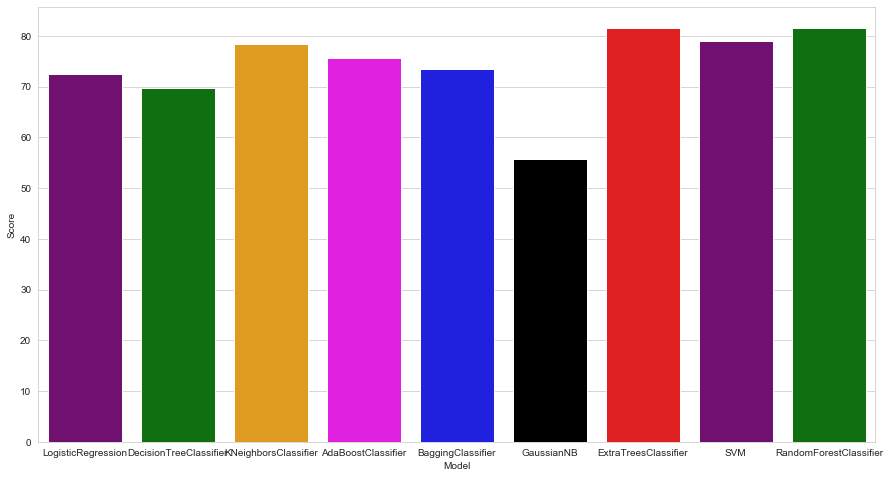

In [60]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [61]:
df.head()

Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
0         0   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
1         0   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2         0   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
3         0   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
4         0   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   

   PROT  
0  69.0  
1  76.5  
2  79.3  
3  75.7  
4  68.7

In [64]:
df['Sex']=le.fit_transform(df['Sex'])

In [65]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans 

In [66]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['Sex','Age']])

In [67]:
kmns.cluster_centers_

array([[ 0.54054054, 50.66891892],
       [ 0.61038961, 43.95454545],
       [ 0.57009346, 58.02803738],
       [ 0.675     , 34.95625   ],
       [ 0.73913043, 67.08695652]])

In [68]:
df['Age by Sex']=kmns.labels_

In [69]:
k_range=range(1,15)
wss=[]

In [70]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Sex','Age']])
    wss.append(km.inertia_)

In [71]:
wss

[62224.45528455284,
 20765.682502063184,
 9423.914798600397,
 5974.4689814856465,
 4138.206656274675,
 3029.8290246123674,
 2404.1060469529425,
 1935.0696568210014,
 1576.006448617203,
 1283.787179408444,
 1032.9685484331353,
 890.7681703465496,
 785.5475610172697,
 702.1812851322654]

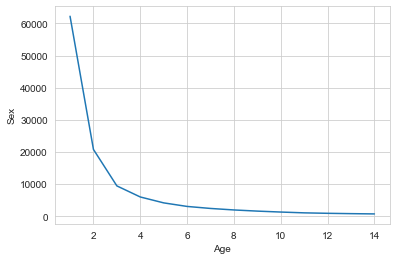

In [72]:
plt.xlabel('Age')
plt.ylabel('Sex')
plt.plot(k_range,wss)

In [73]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['Sex','Category']])

In [74]:
kmns.cluster_centers_

array([[1.99840144e-15, 4.62962963e-03],
       [6.66666667e-01, 4.00000000e+00],
       [1.00000000e+00, 1.85185185e-02],
       [8.33333333e-01, 2.00000000e+00],
       [6.19047619e-01, 3.00000000e+00]])

In [75]:
df['Sex by Category']=kmns.labels_

In [76]:
k_range=range(1,15)
wss=[]

In [77]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Sex','Category']])
    wss.append(km.inertia_)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (10) found smaller

In [78]:
wss

[825.7918699186991,
 205.57592592592596,
 75.95092592592593,
 33.55092592592593,
 21.585269360269358,
 13.70648148148148,
 9.262037037037036,
 4.328703703703703,
 0.8571428571428573,
 5.5029796597690706e-27,
 5.49496779120042e-27,
 1.8712489414061935e-27,
 1.8712489414061935e-27,
 1.8712489414061935e-27]

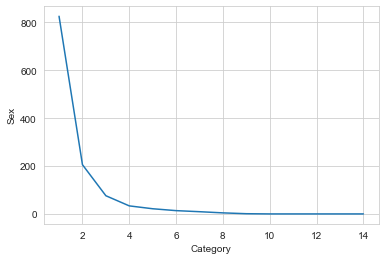

In [79]:
plt.xlabel('Category')
plt.ylabel('Sex')
plt.plot(k_range,wss)

In [81]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [82]:
object_col

[]

In [83]:
num_col

['Category',
 'Age',
 'Sex',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT',
 'Age by Sex',
 'Sex by Category']

In [84]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT', 'Age by Sex', 'Sex by Category'],
      dtype='object')

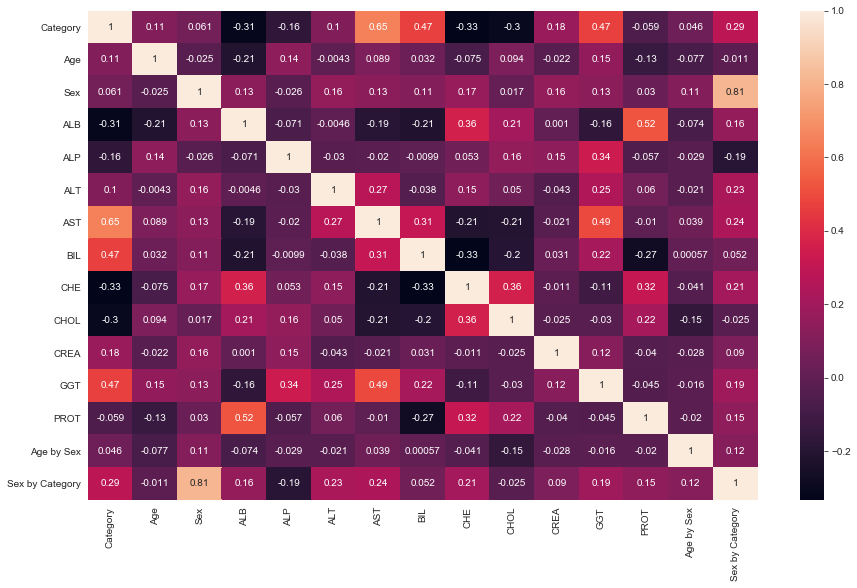

In [85]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

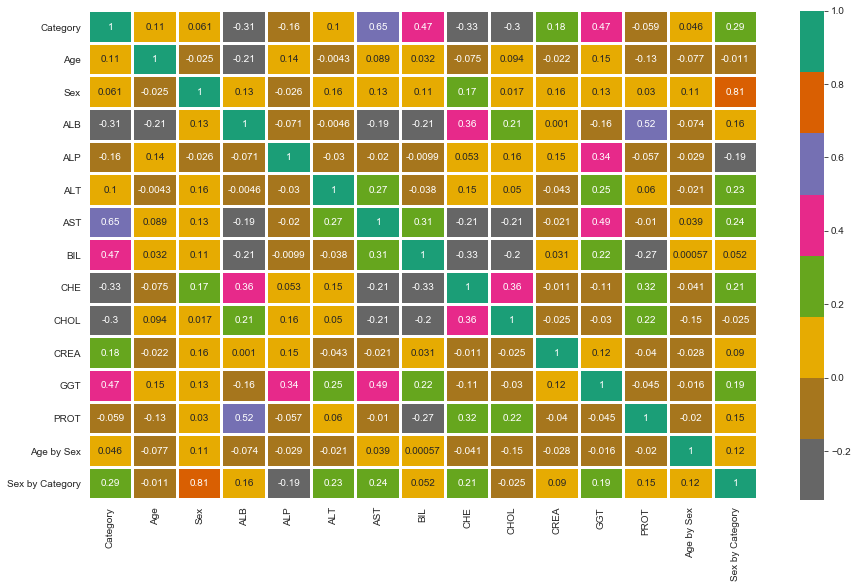

In [86]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

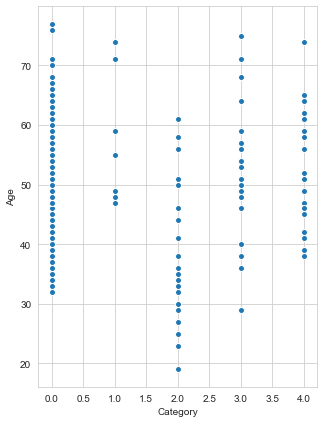

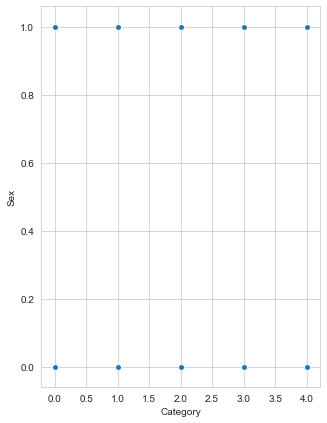

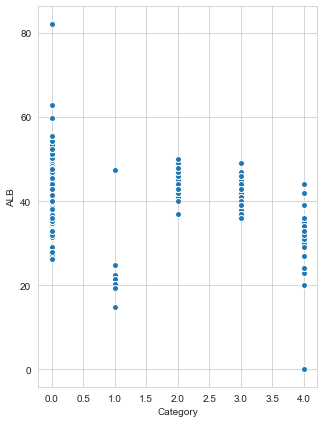

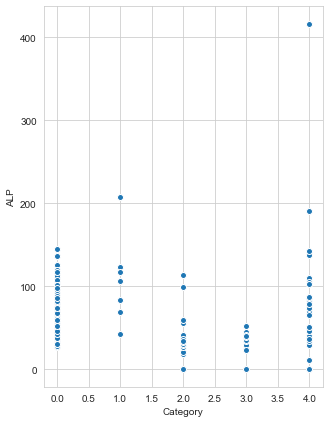

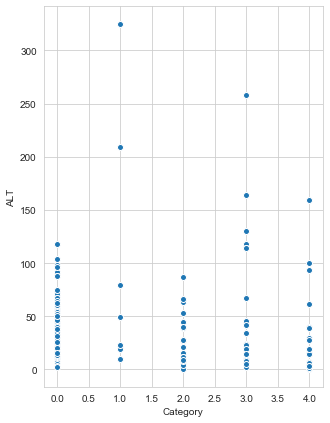

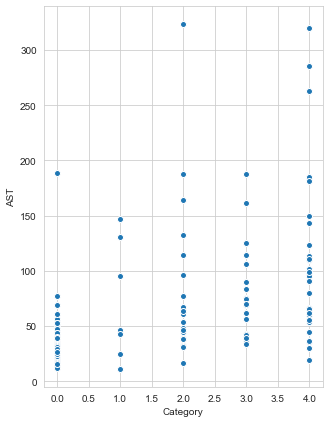

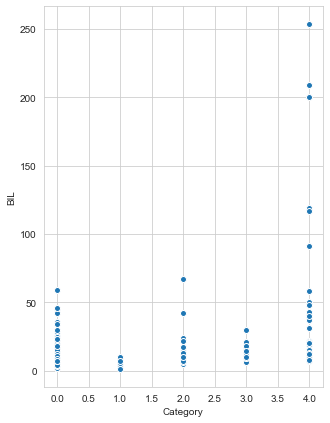

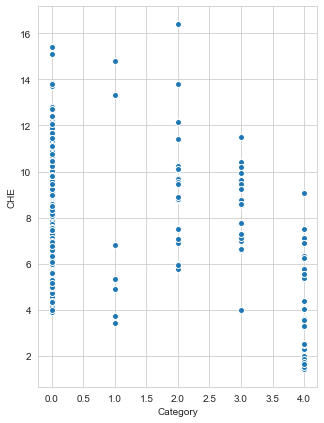

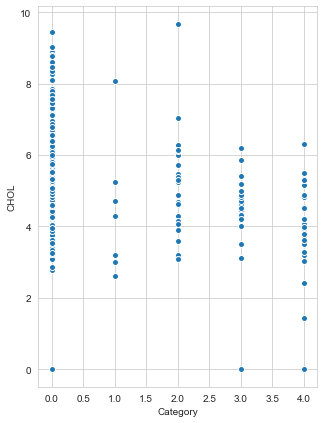

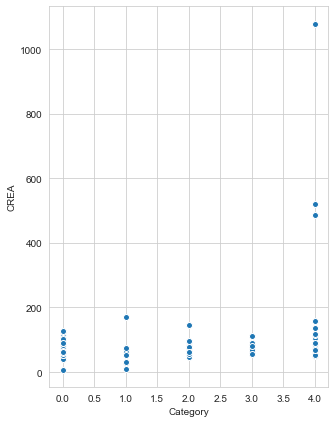

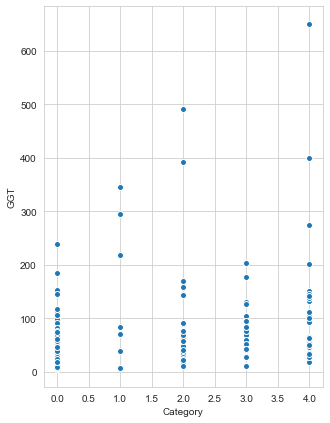

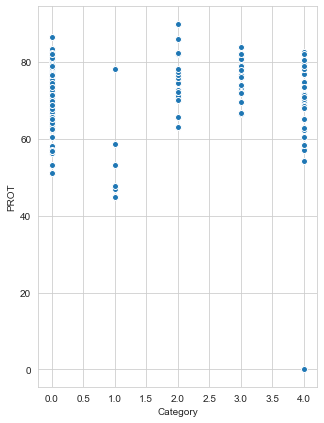

In [88]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(5,7))
    sns.scatterplot(x=df.Category,y=df[i],data=df,linewidth=1)
    plt.show()

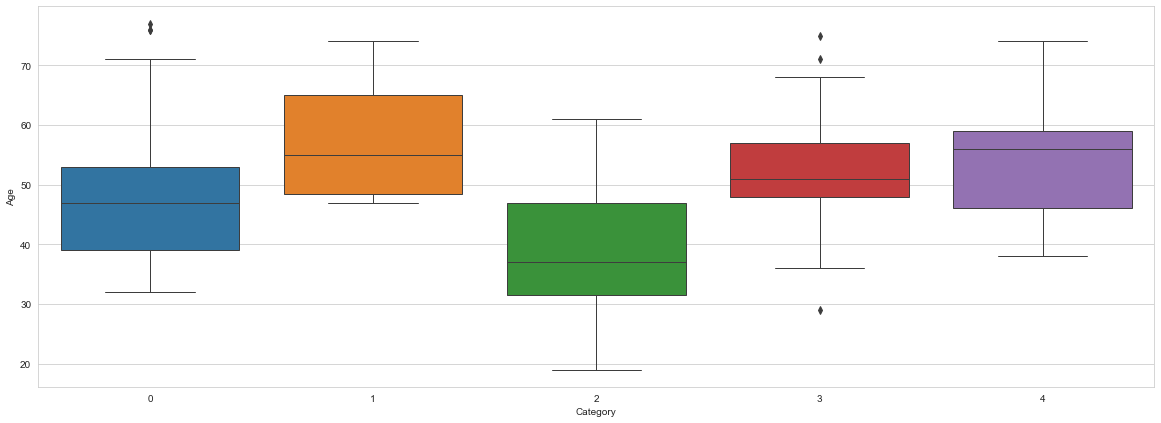

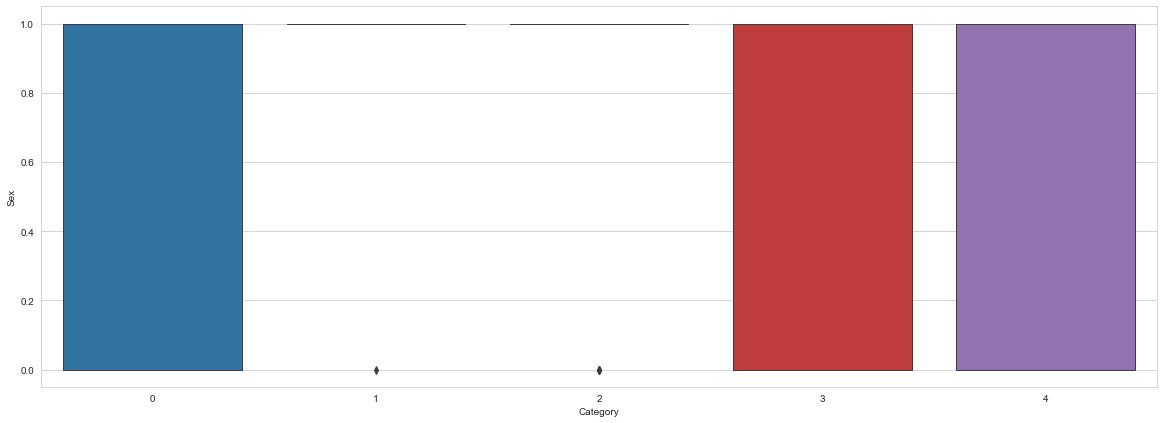

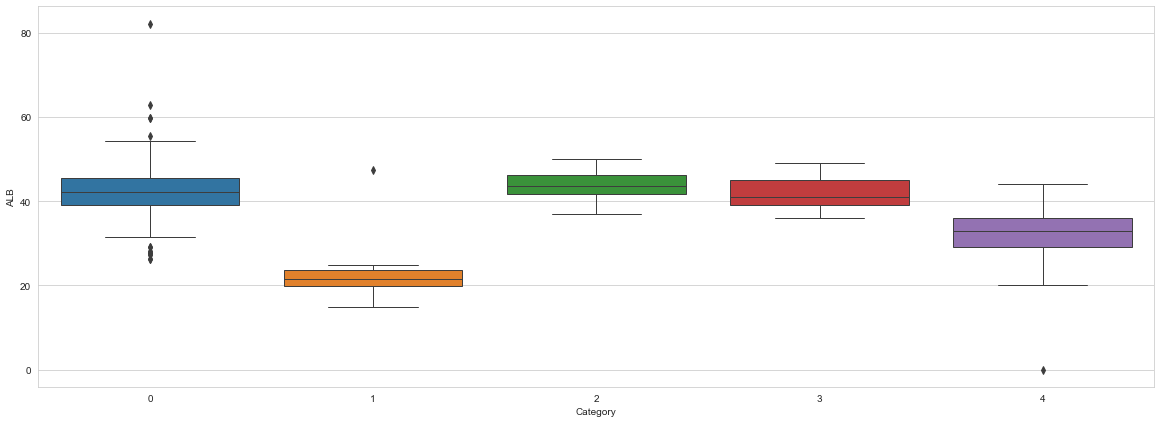

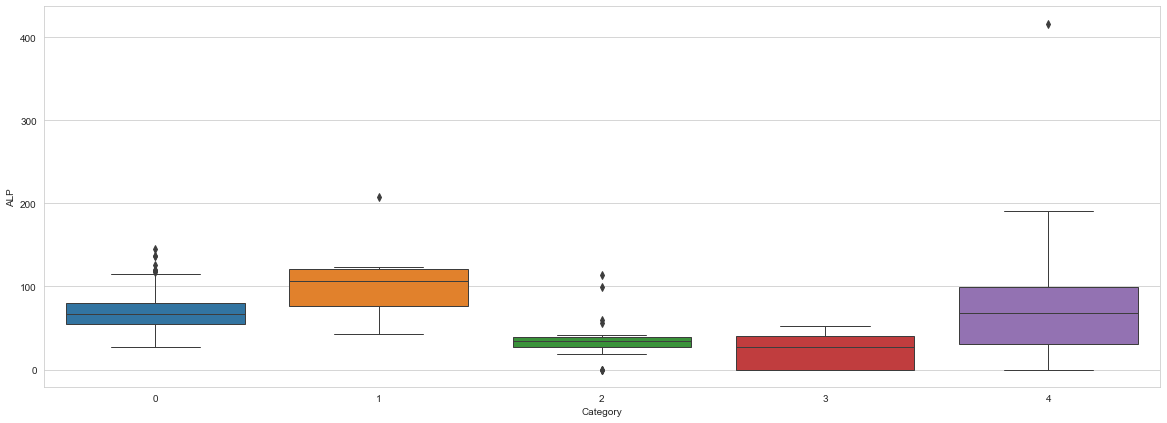

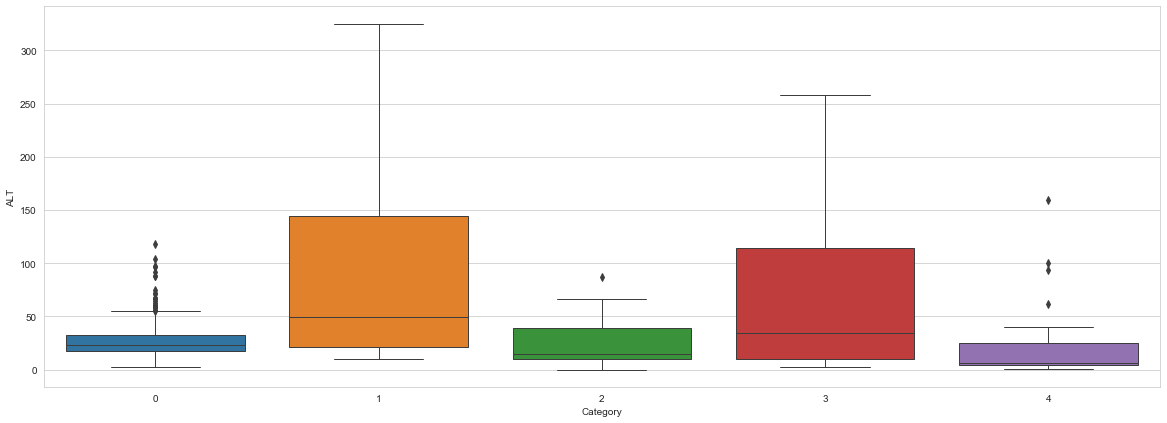

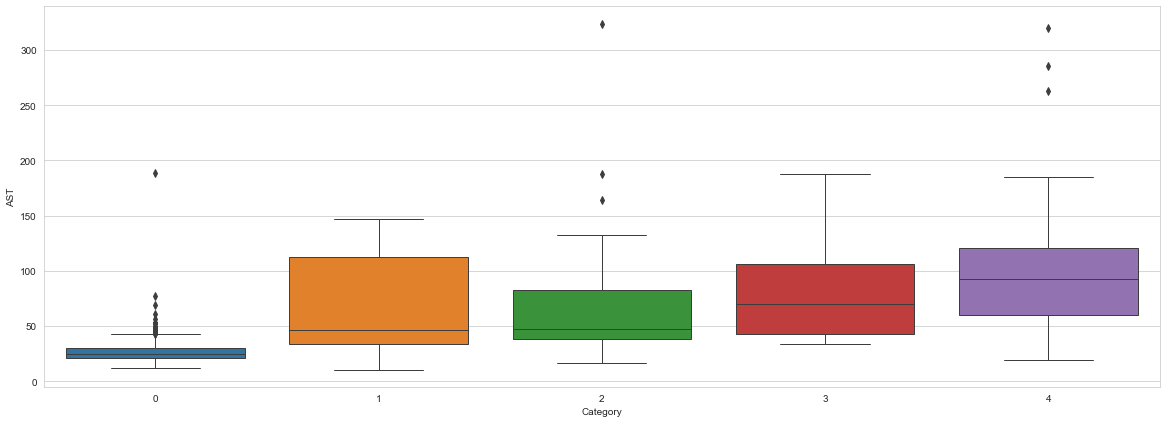

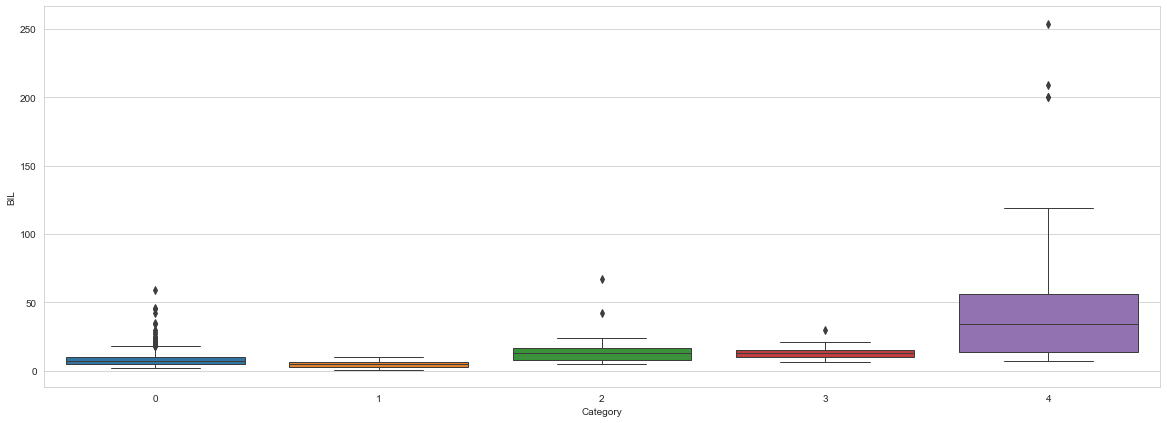

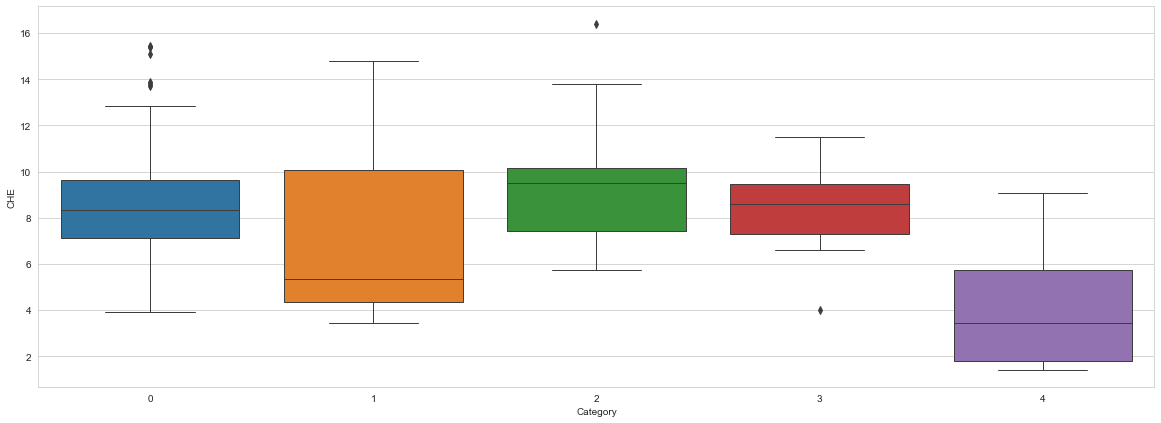

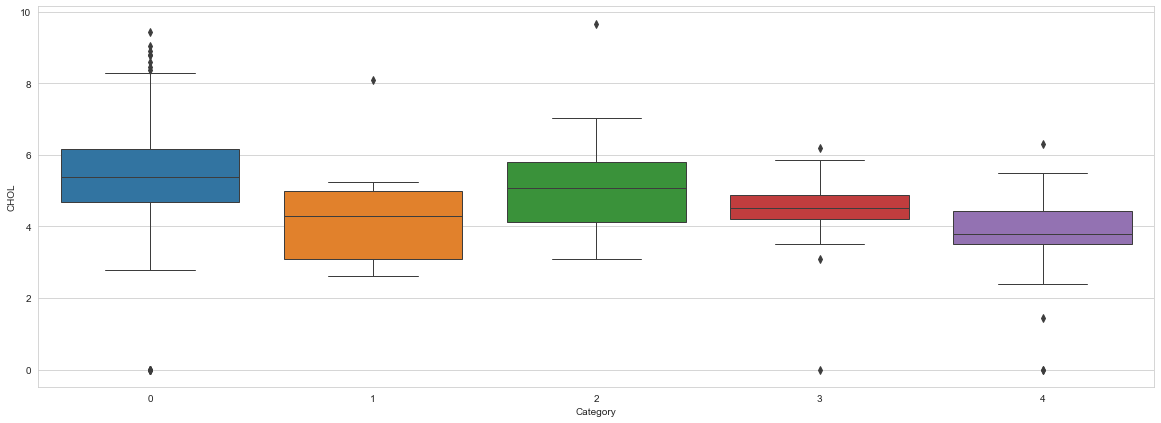

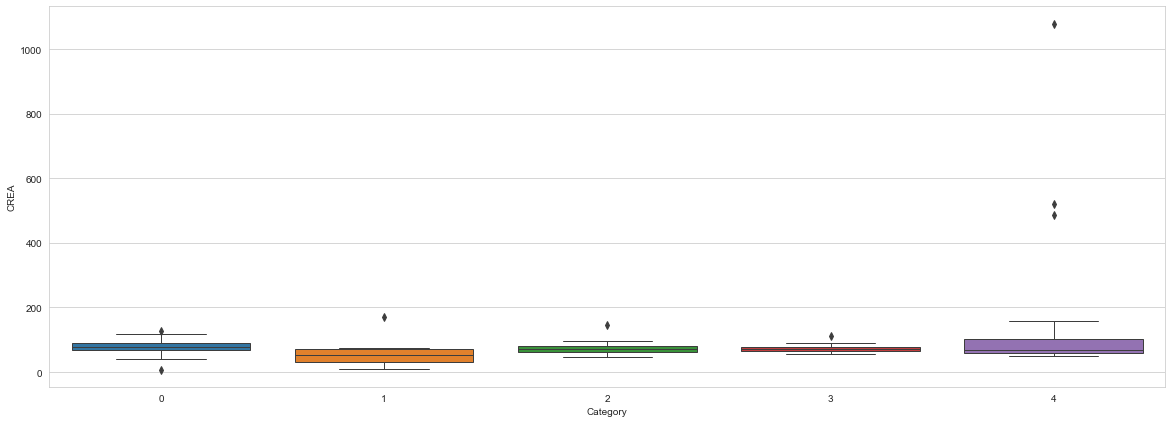

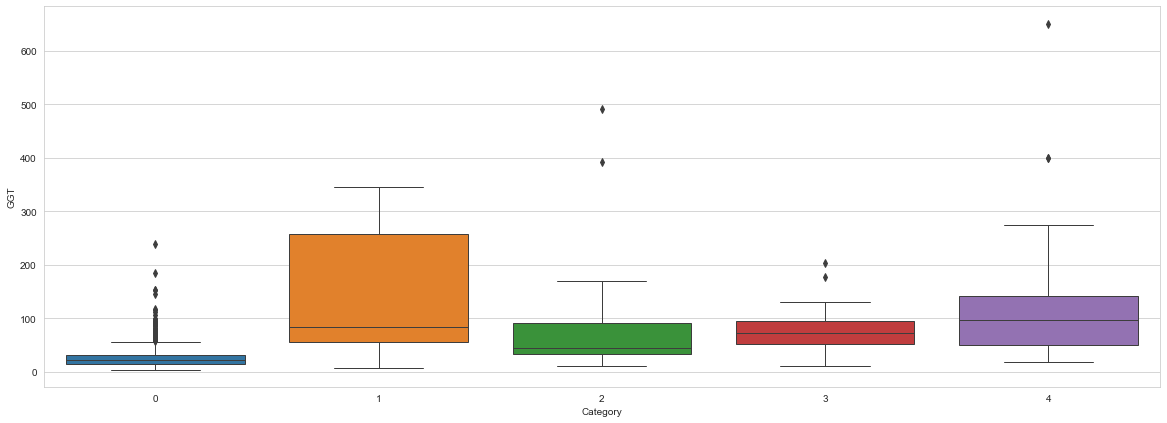

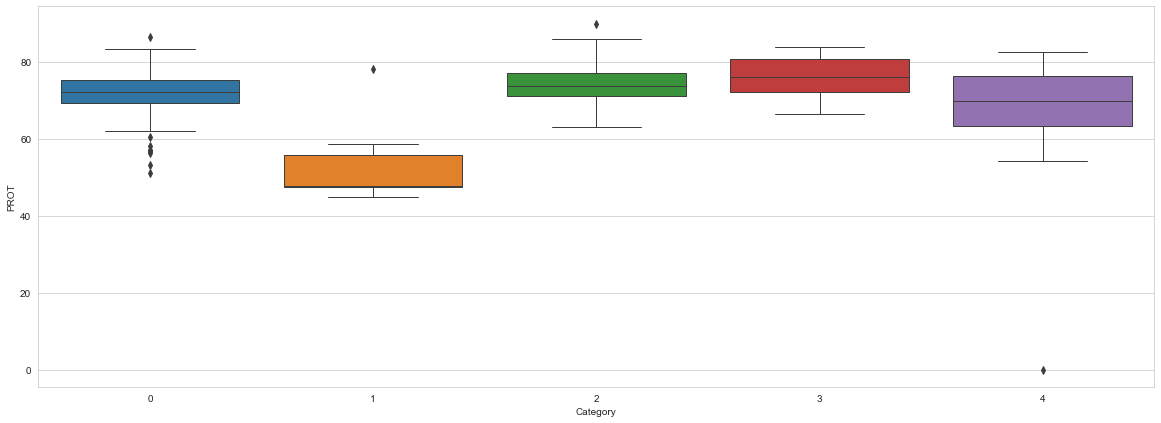

In [90]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(20,7))
    sns.boxplot(x=df.Category,y=df[i],data=df,linewidth=1)
    plt.show()

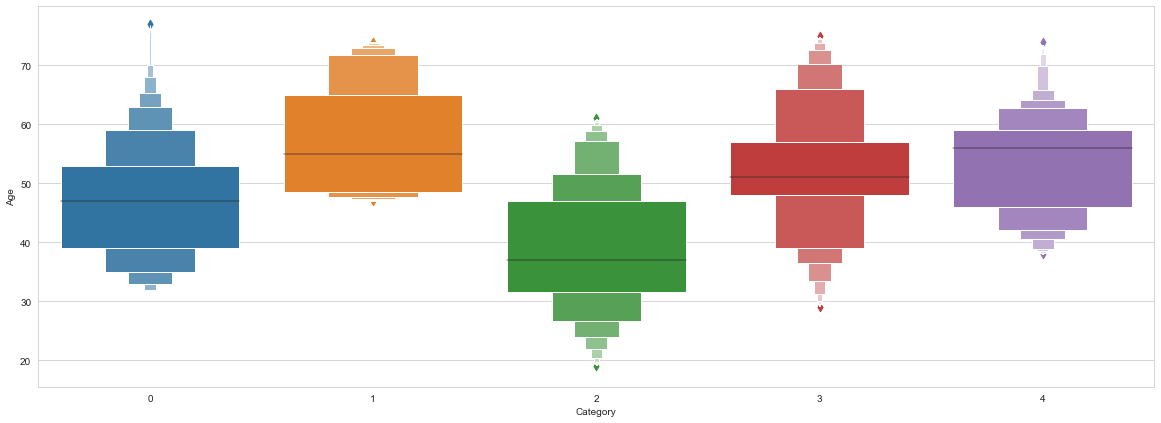

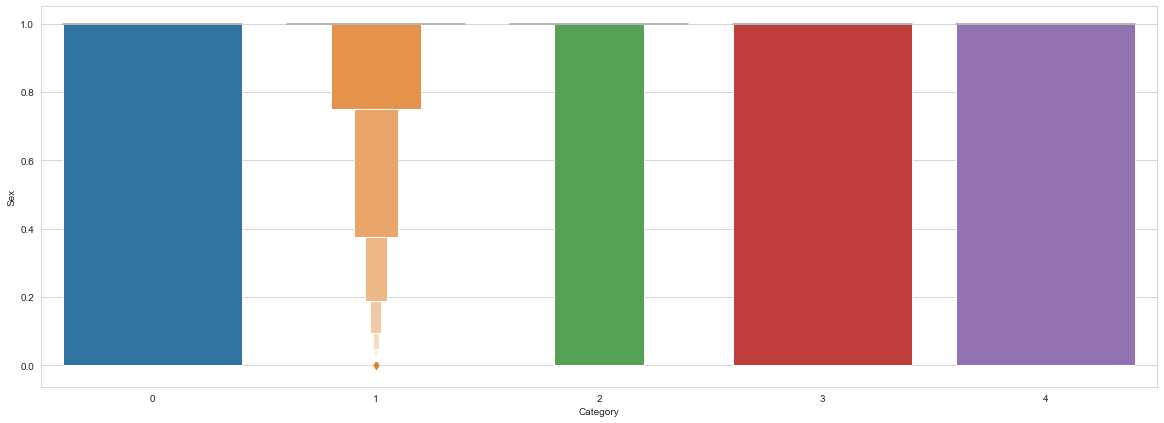

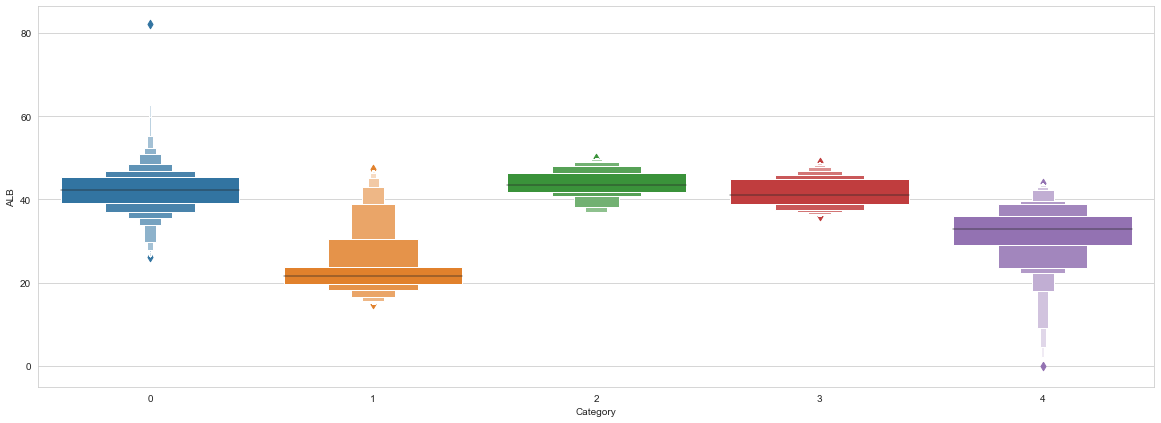

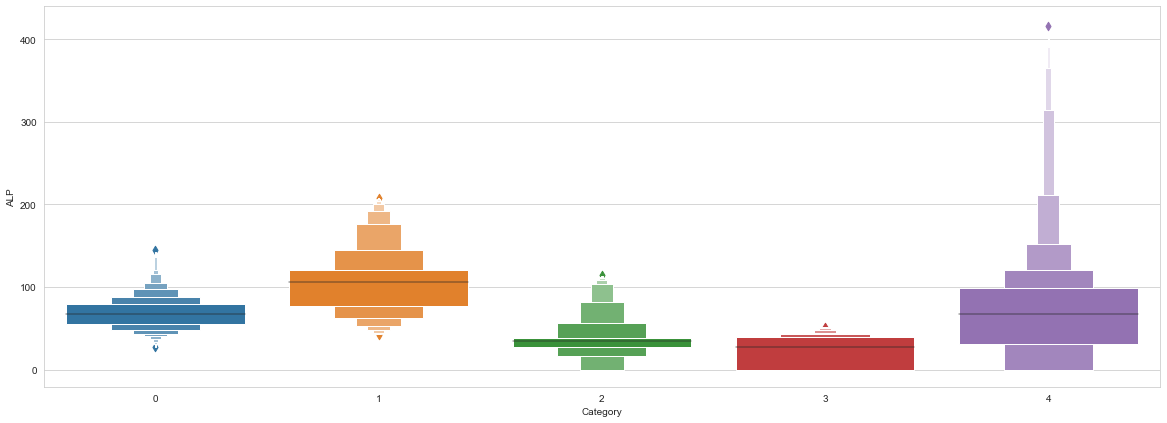

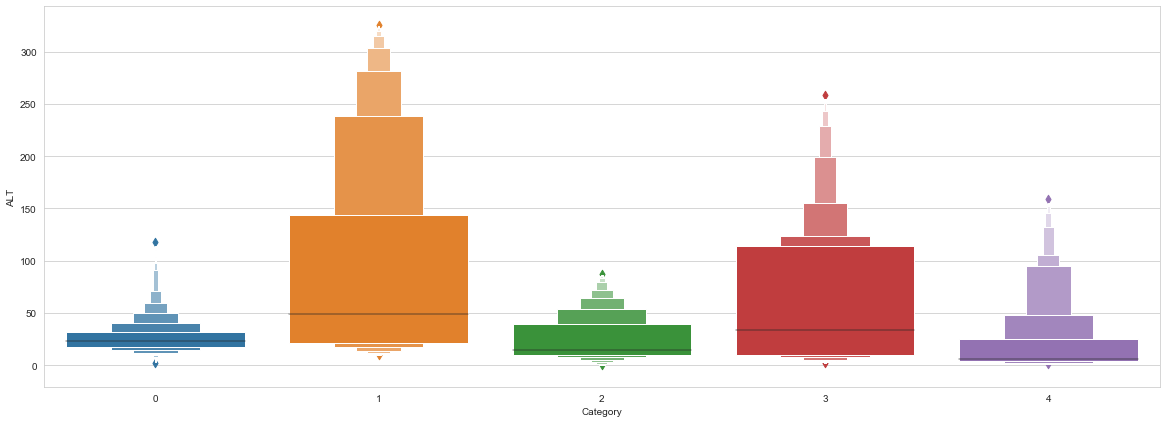

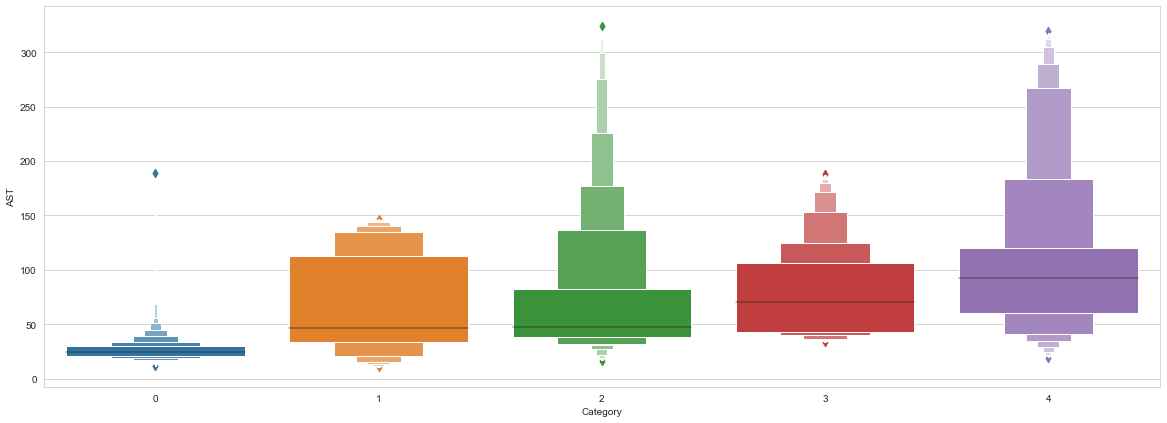

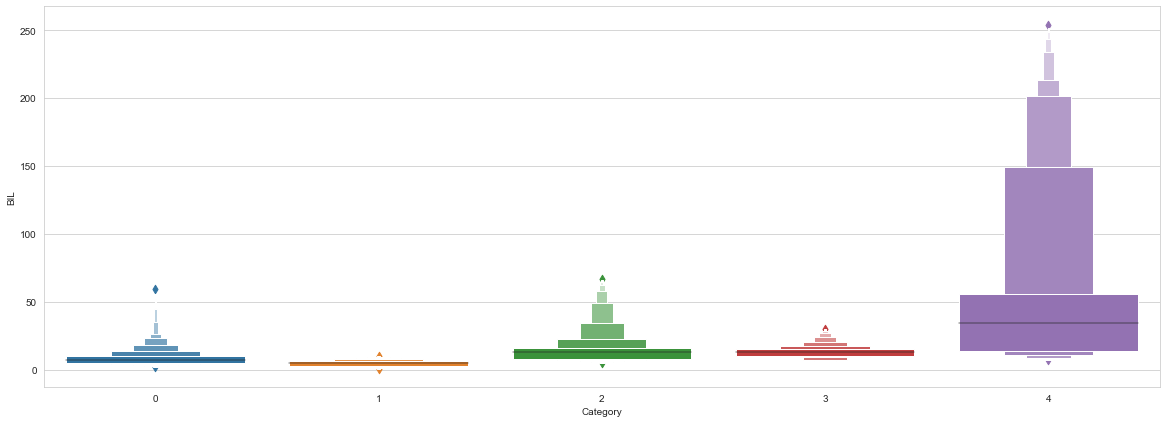

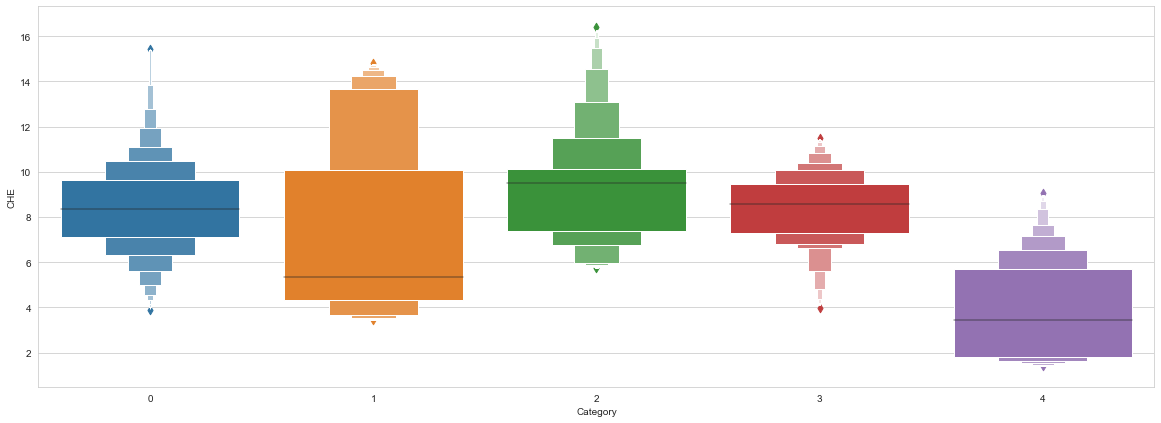

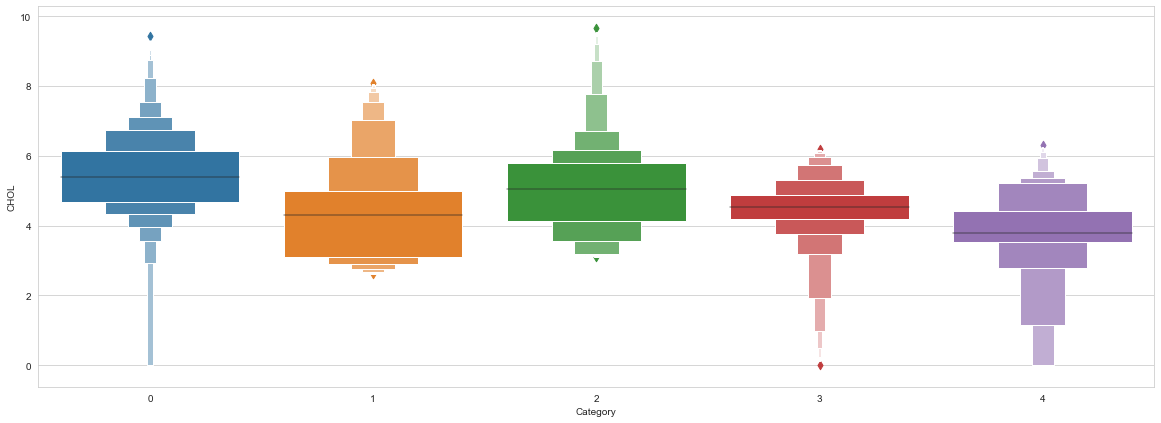

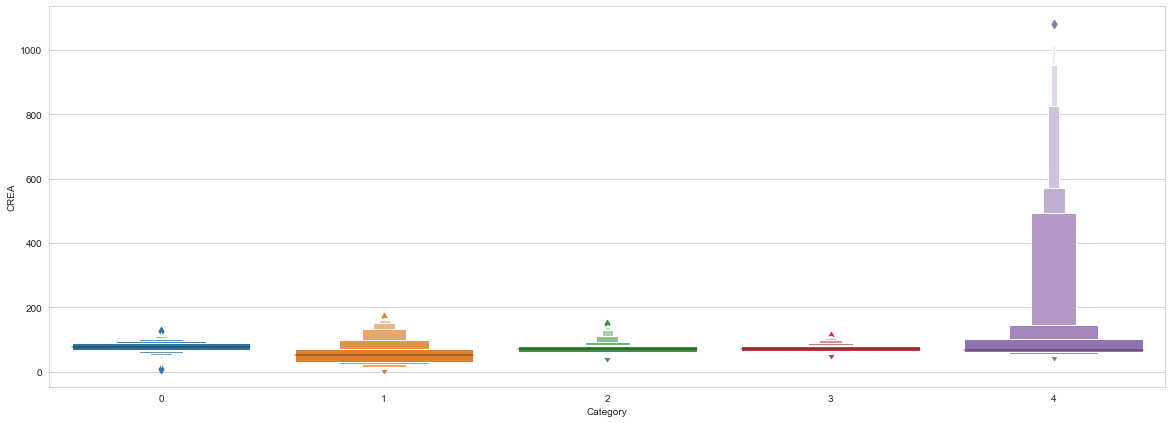

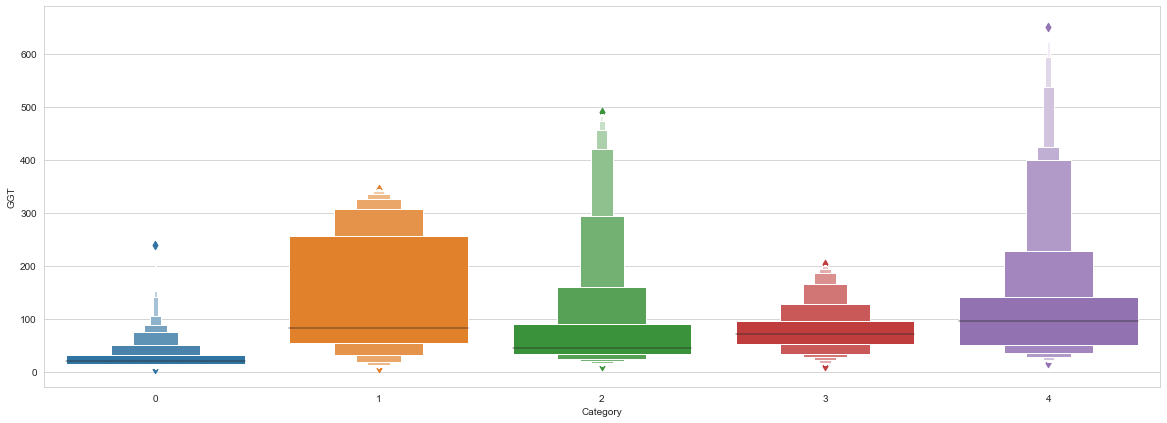

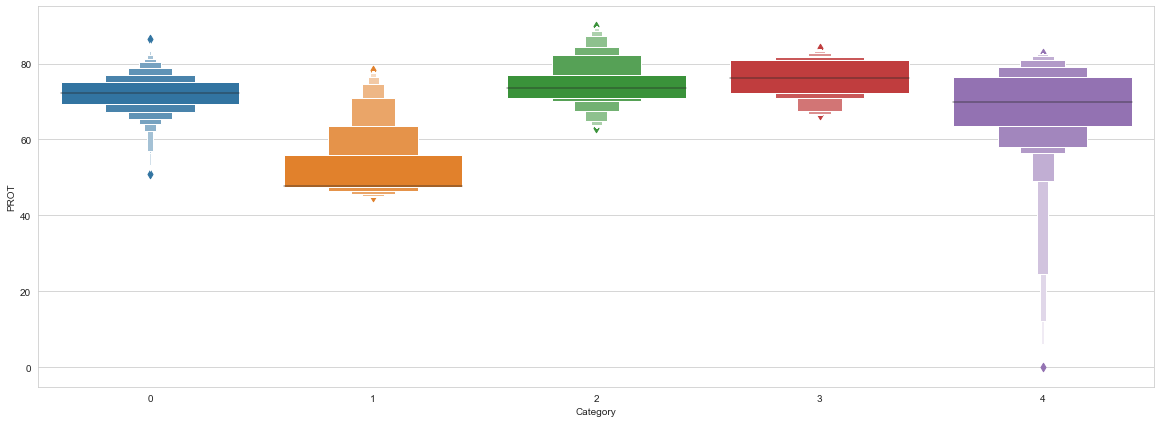

In [91]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(20,7))
    sns.boxenplot(x=df.Category,y=df[i],data=df,linewidth=1)
    plt.show()

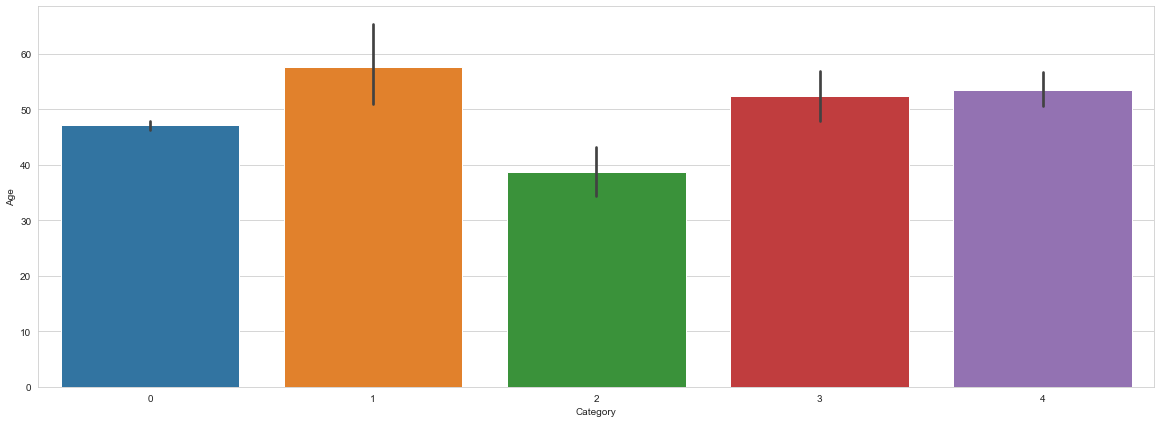

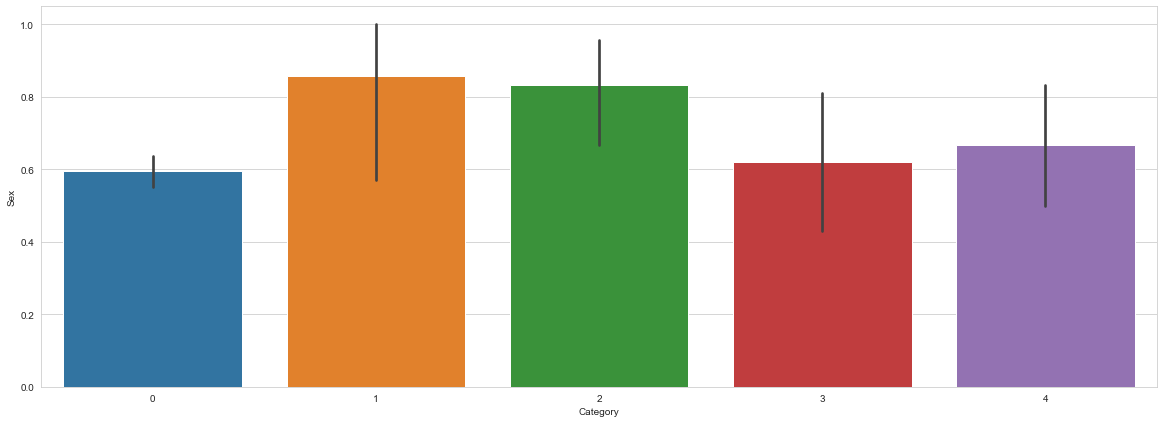

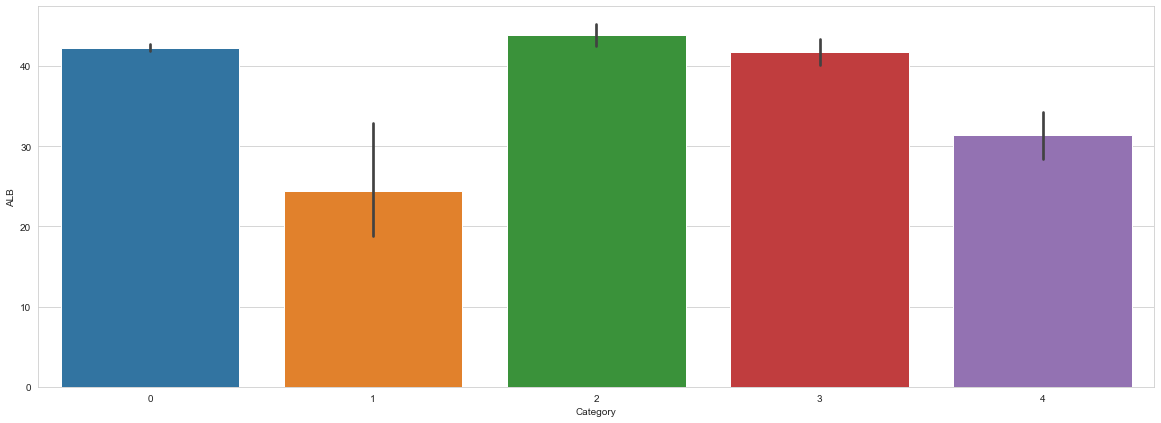

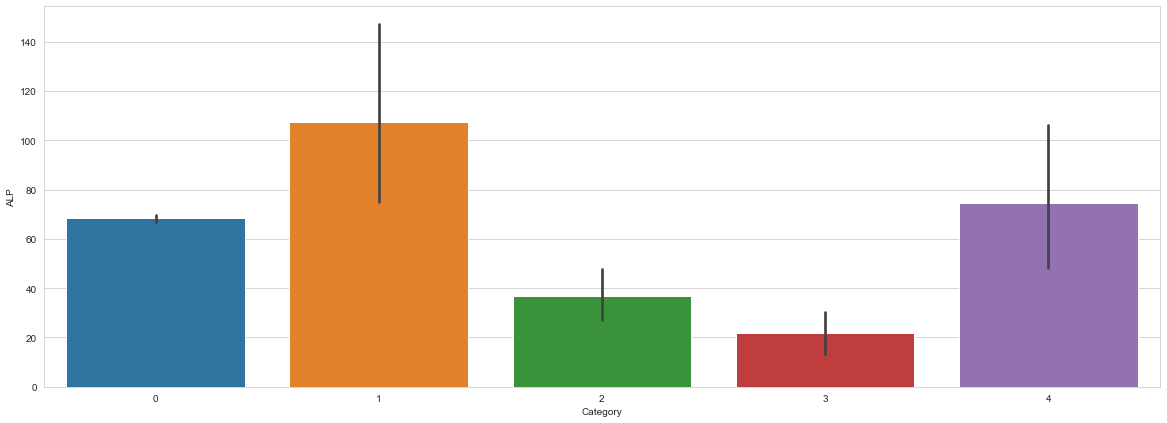

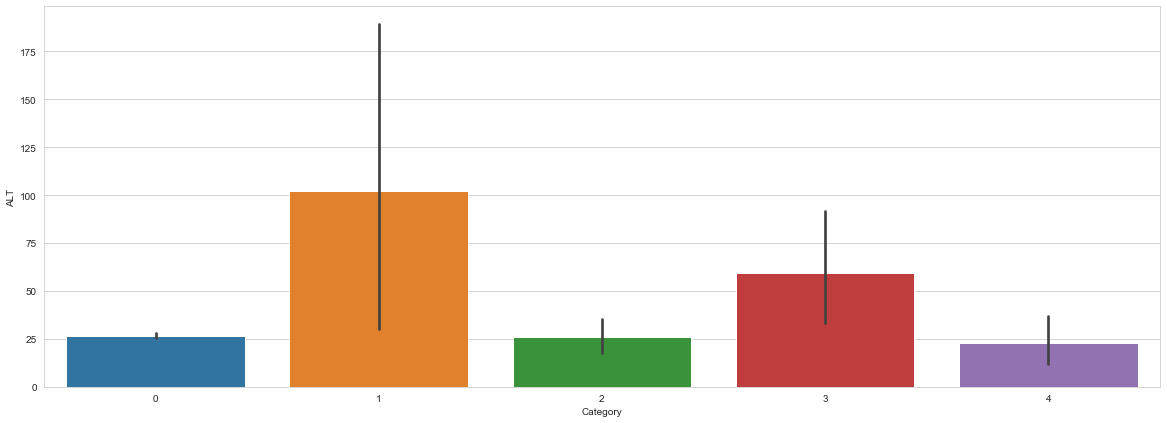

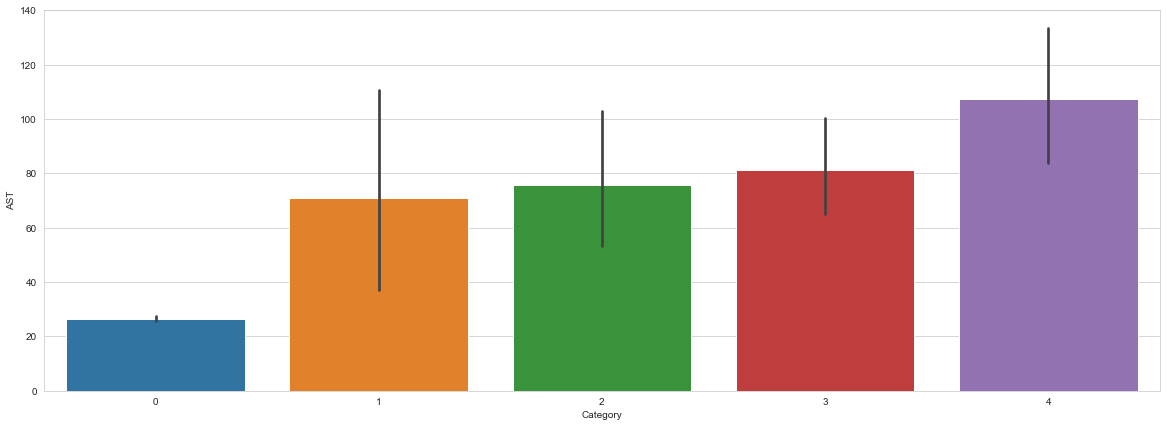

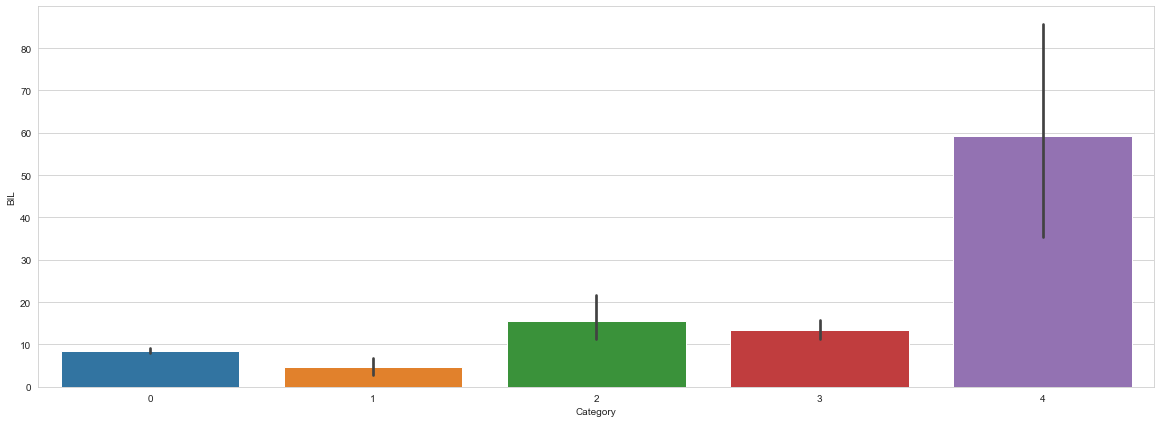

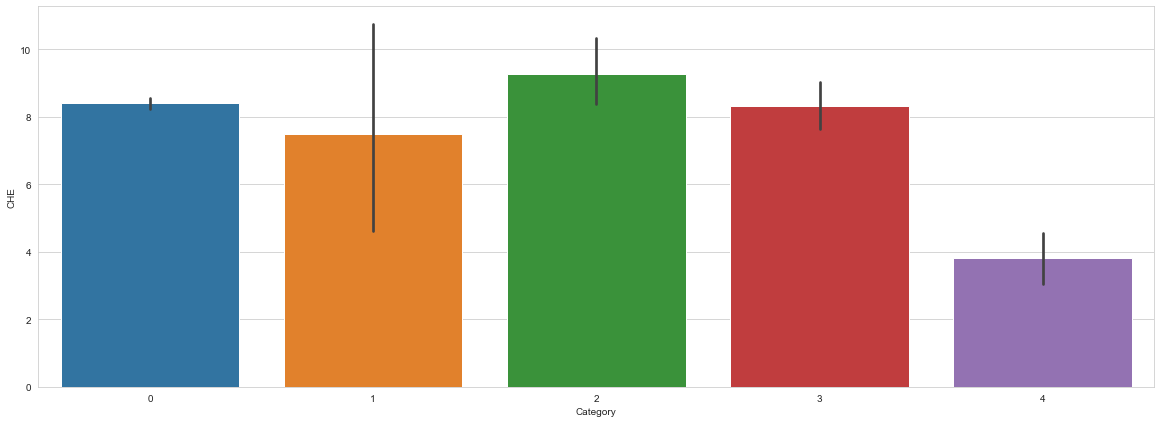

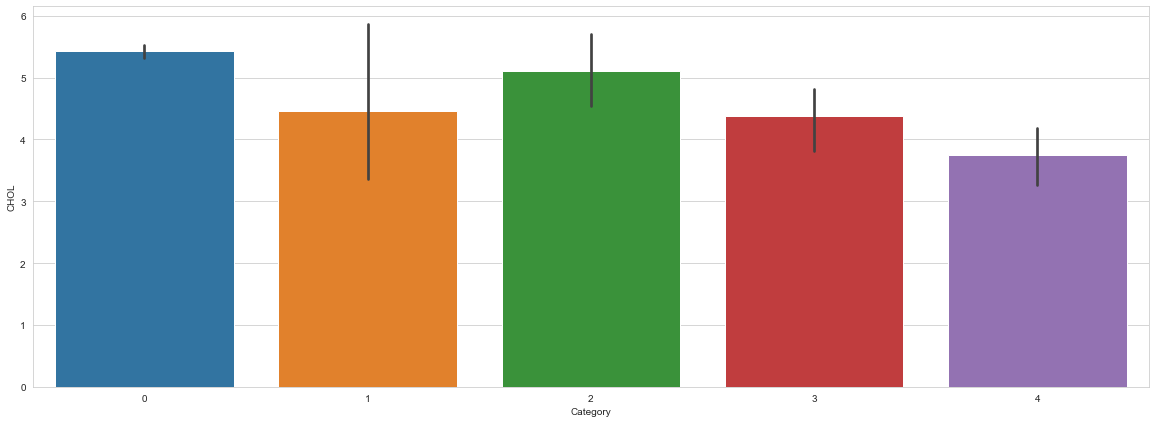

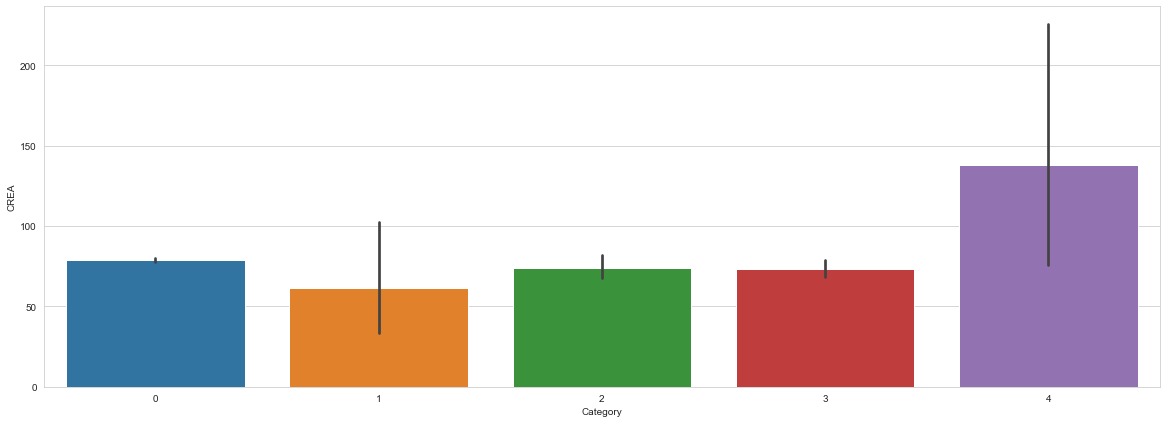

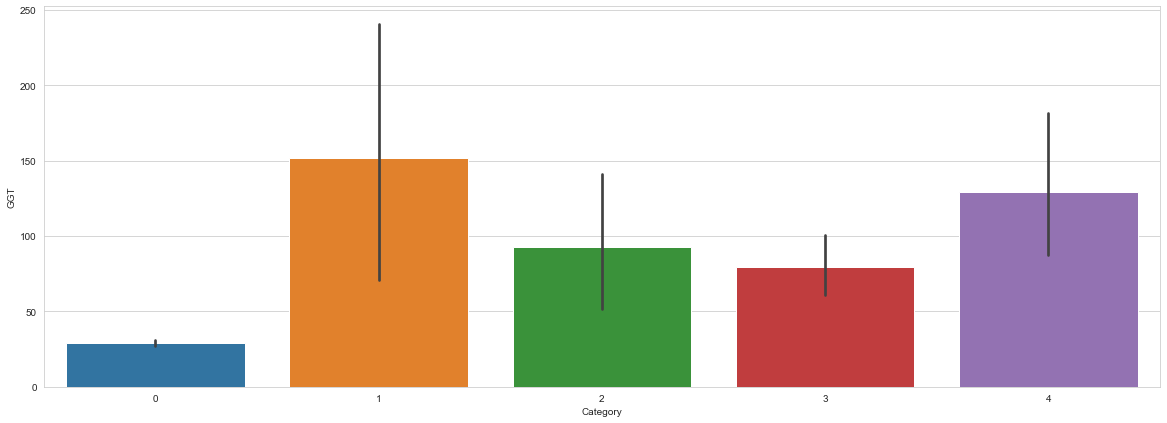

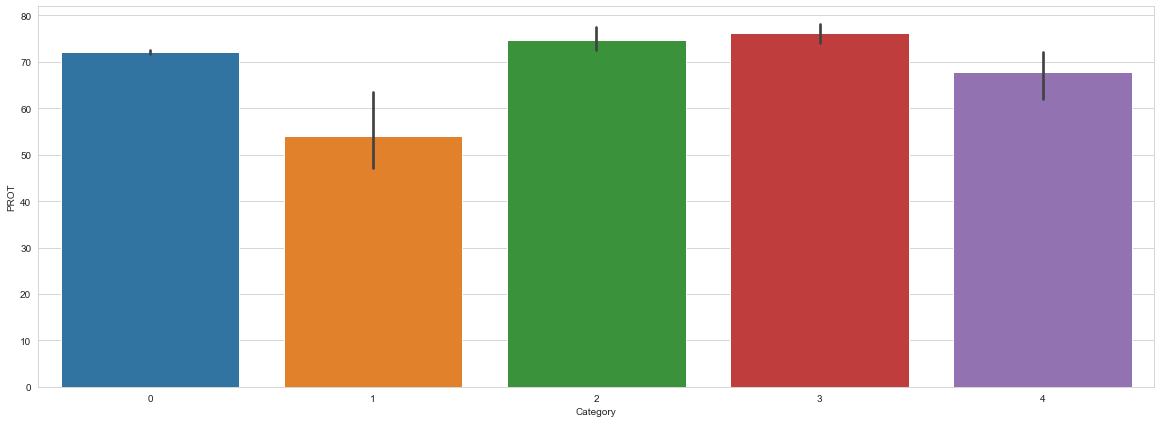

In [92]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(20,7))
    sns.barplot(x=df.Category,y=df[i],data=df,linewidth=1)
    plt.show()

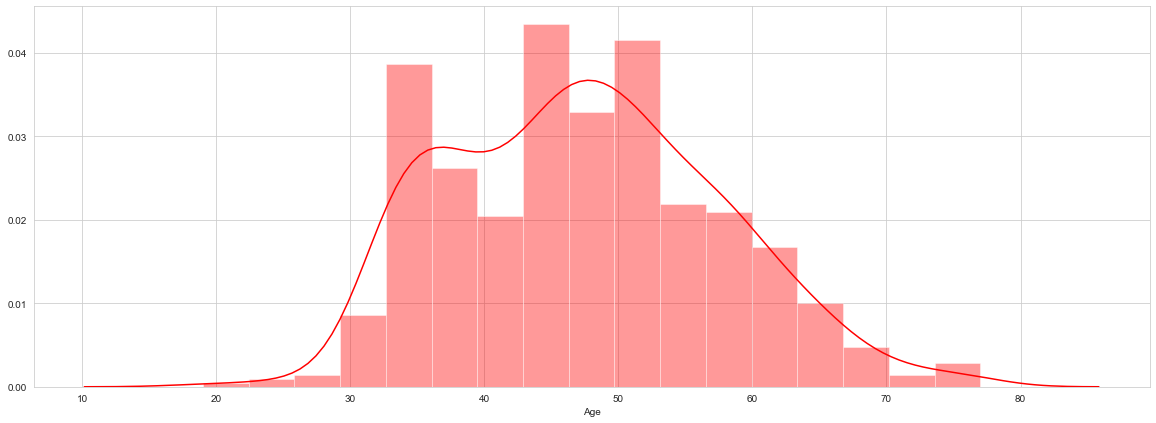

In [94]:
plt.figure(figsize=(20,7))
sns.distplot(df['Age'],color='red')

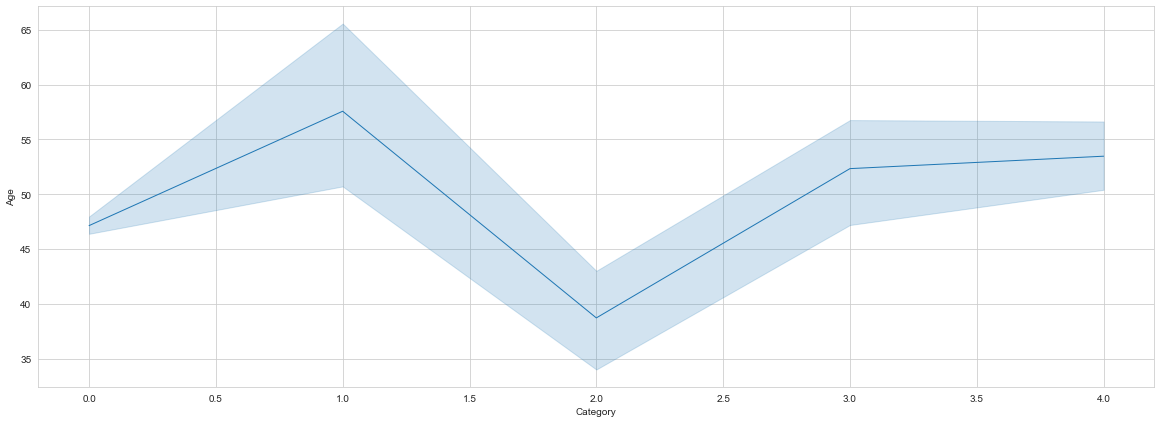

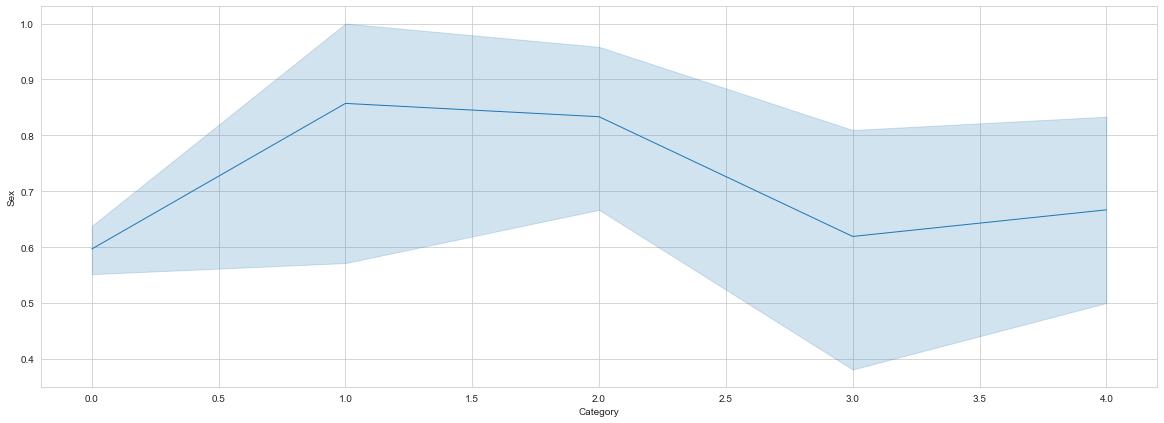

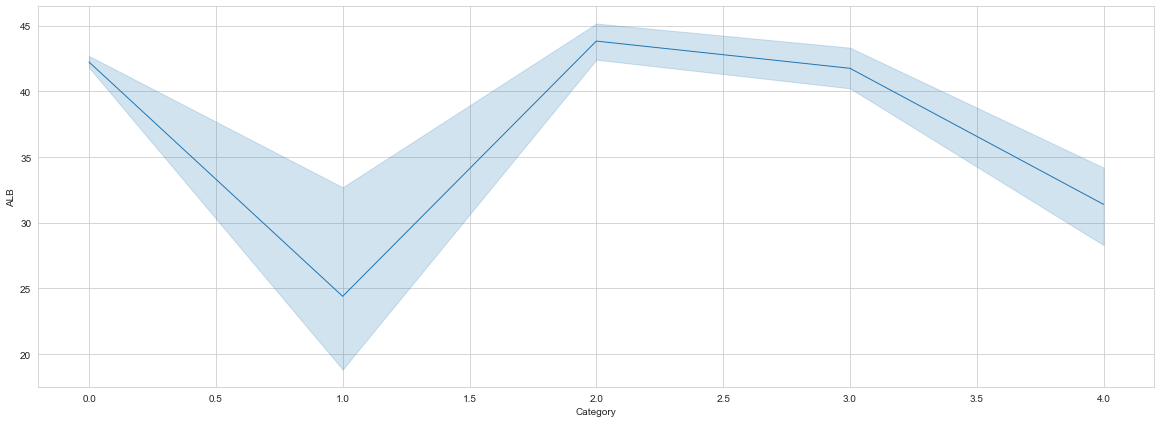

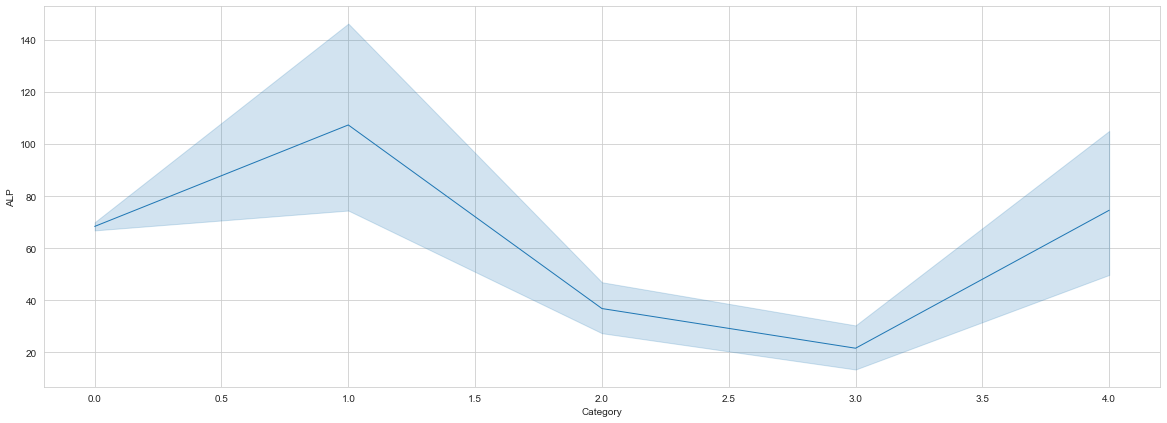

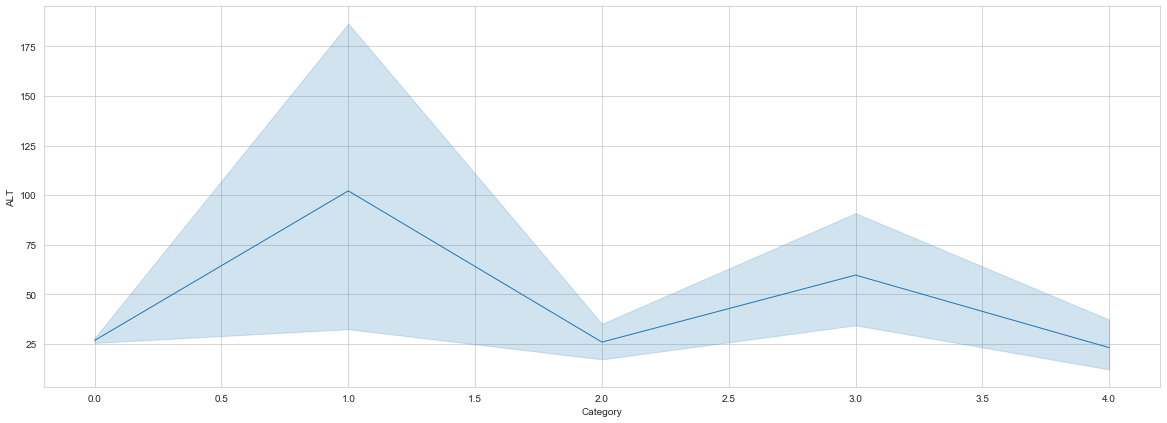

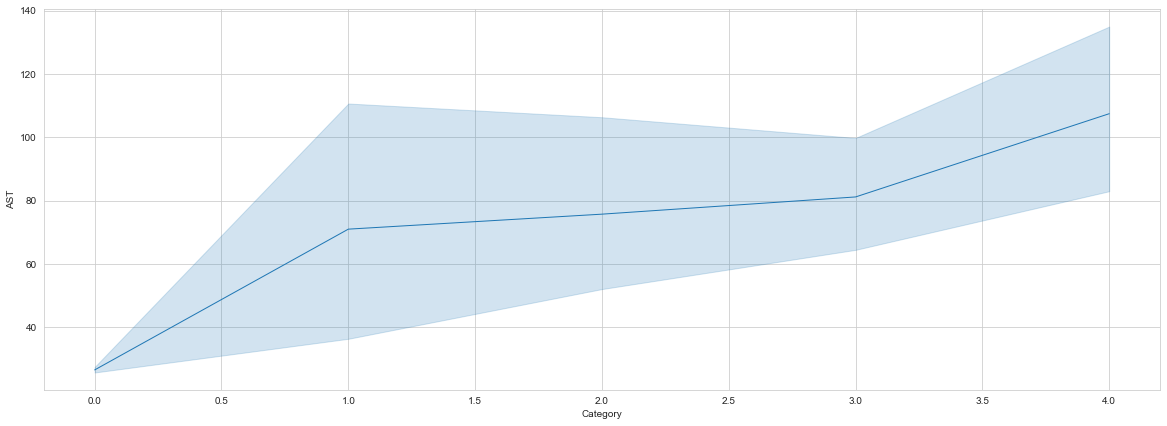

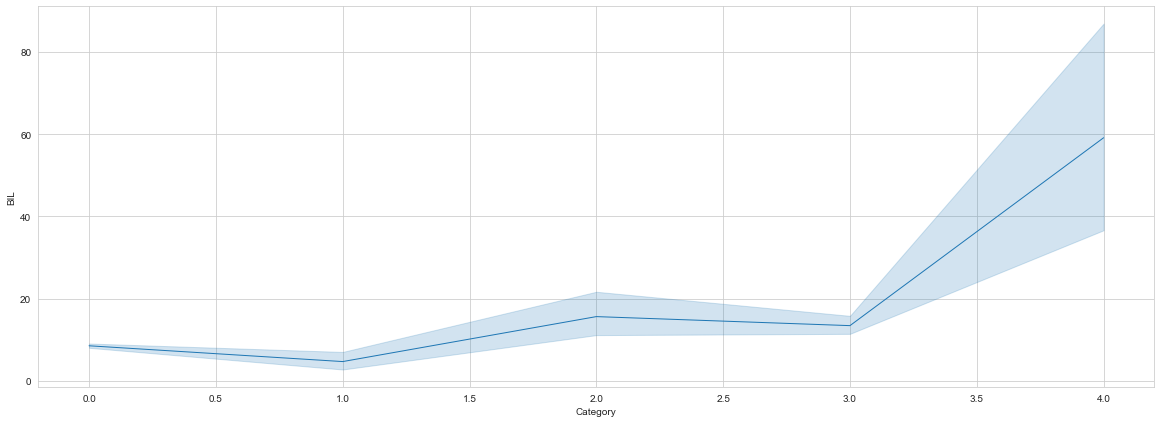

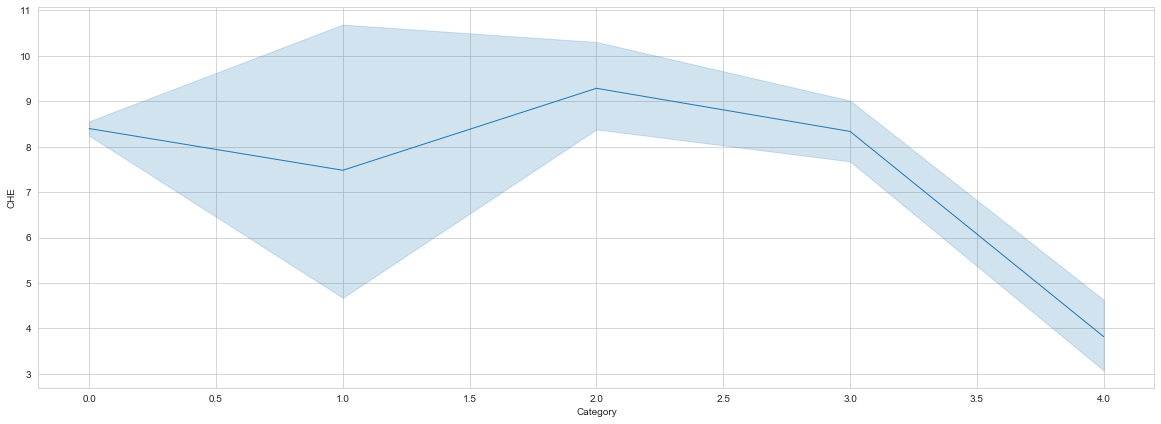

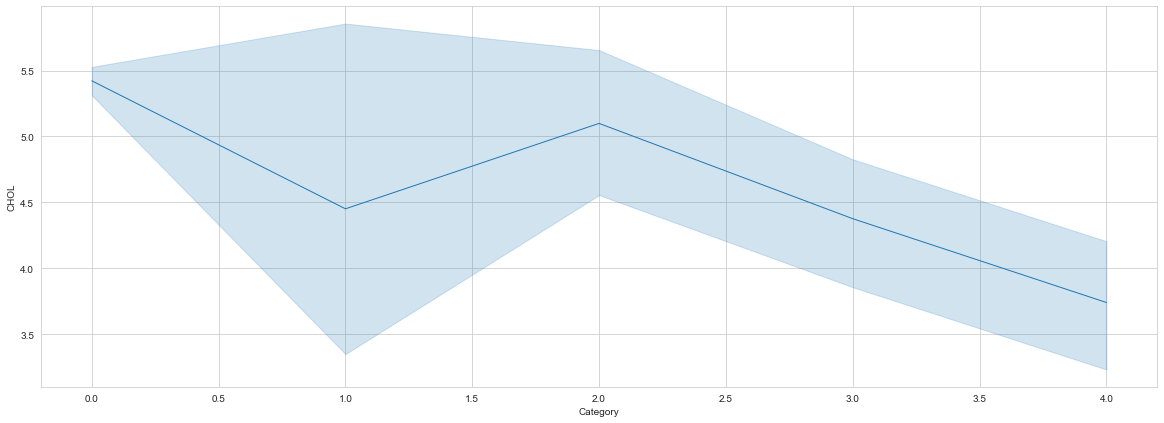

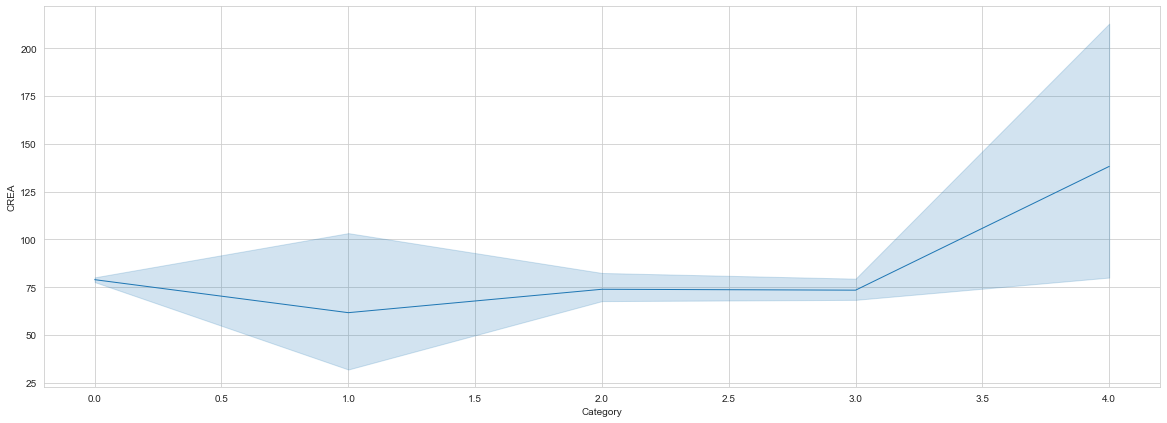

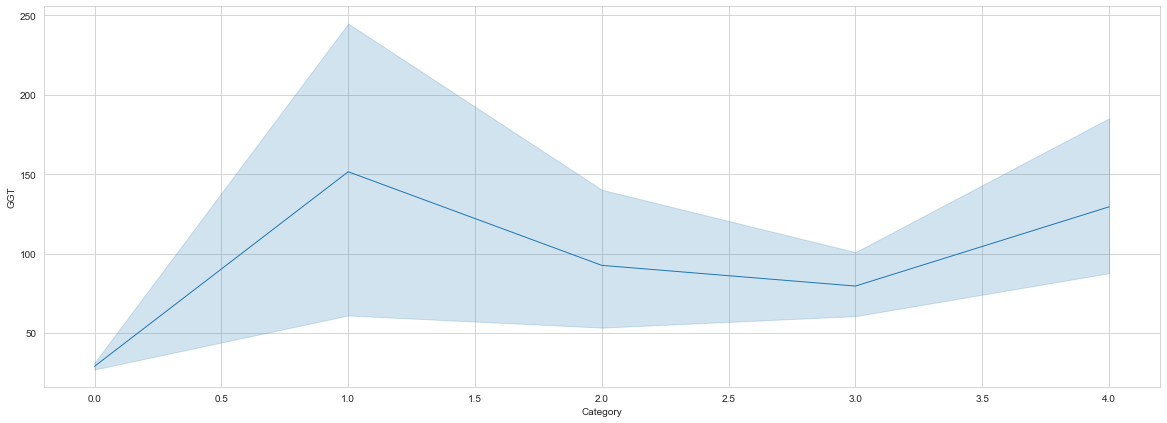

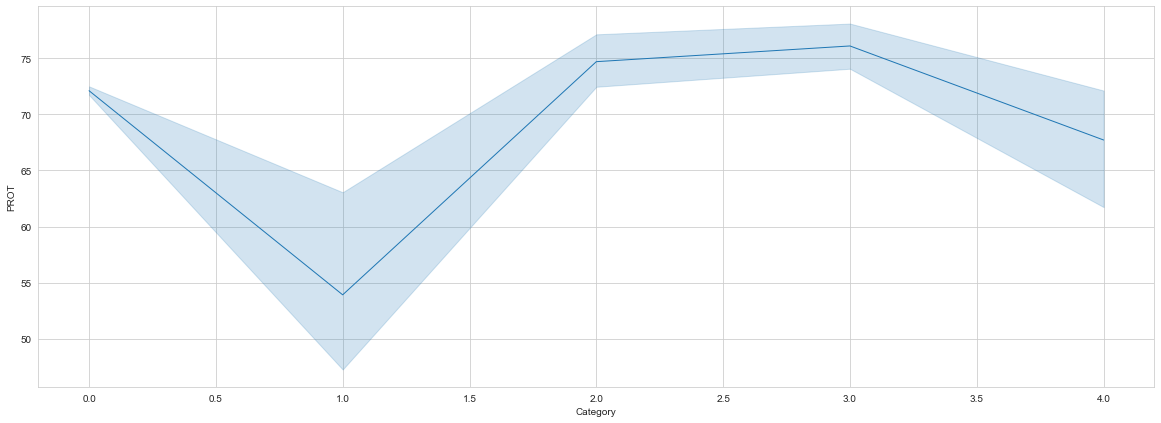

In [95]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(20,7))
    sns.lineplot(x=df.Category,y=df[i],data=df,linewidth=1)
    plt.show()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


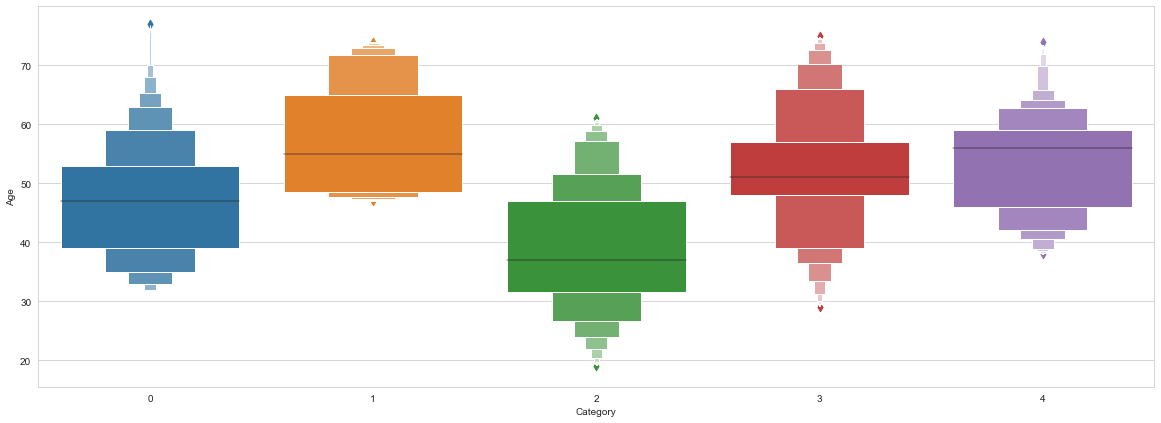

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


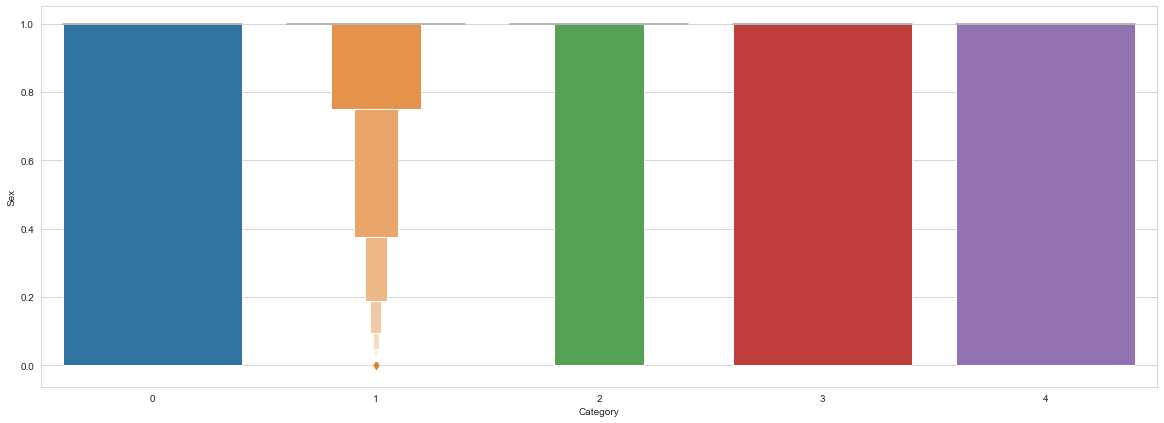

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


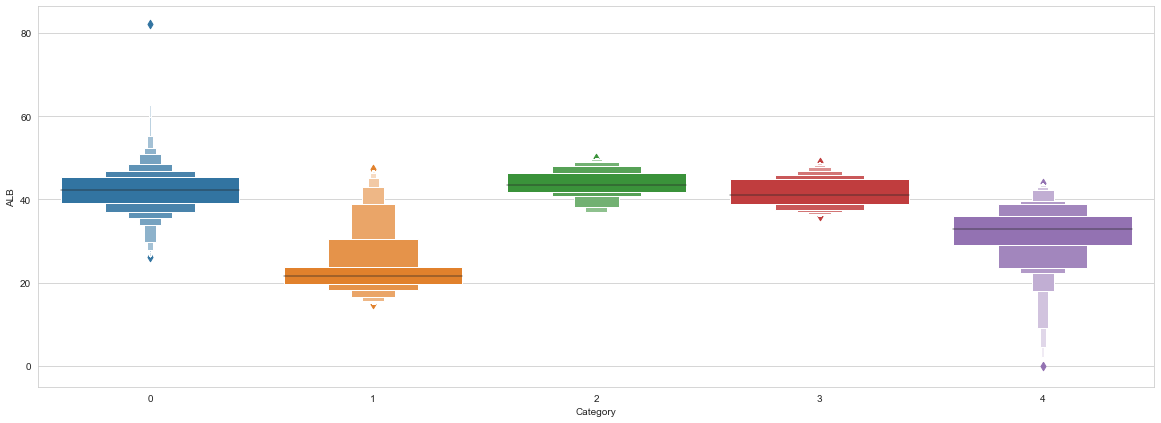

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


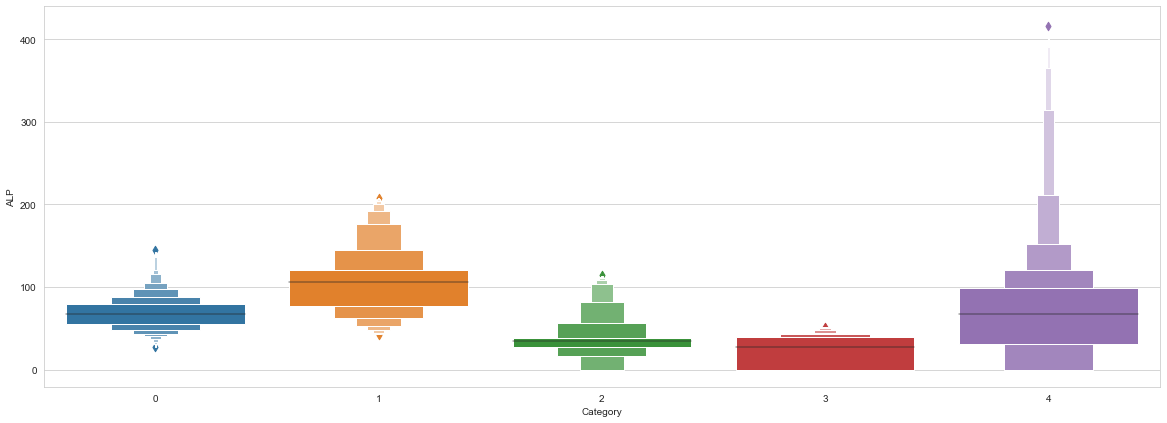

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


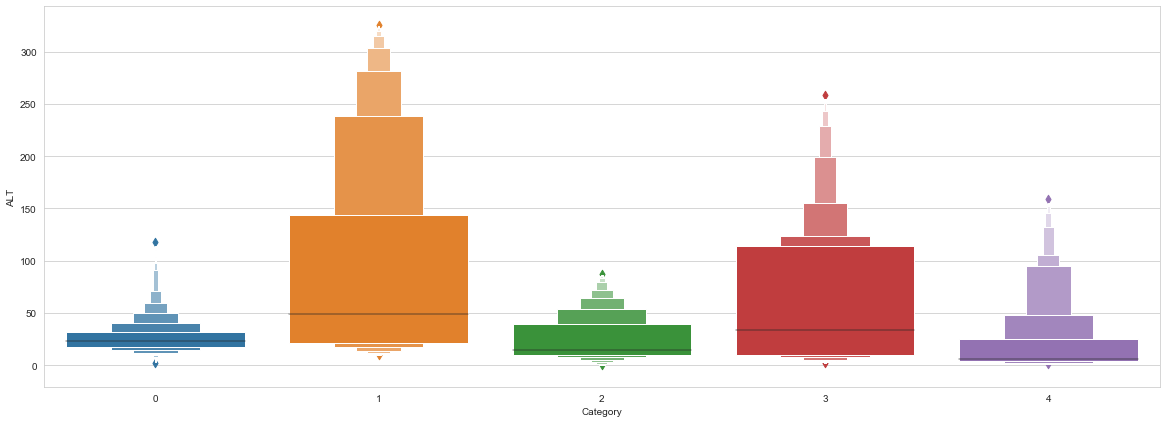

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


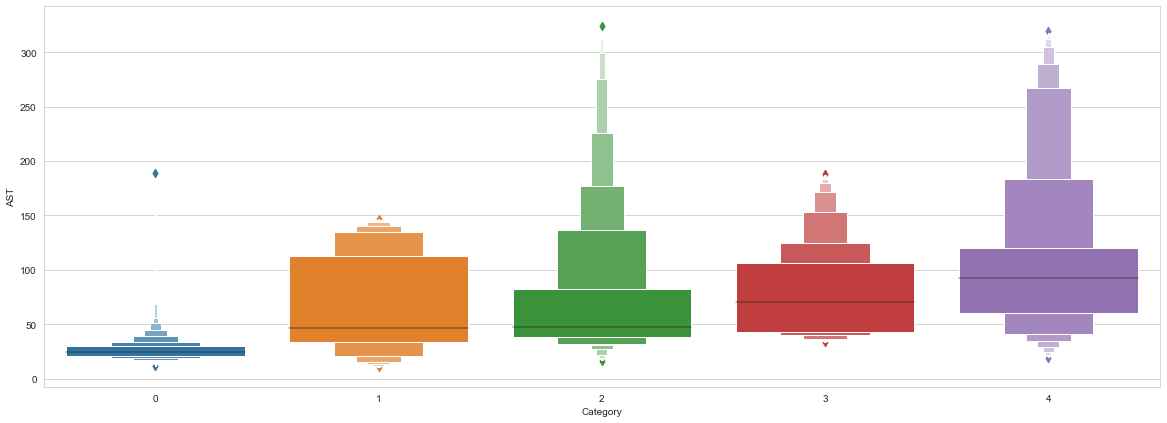

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


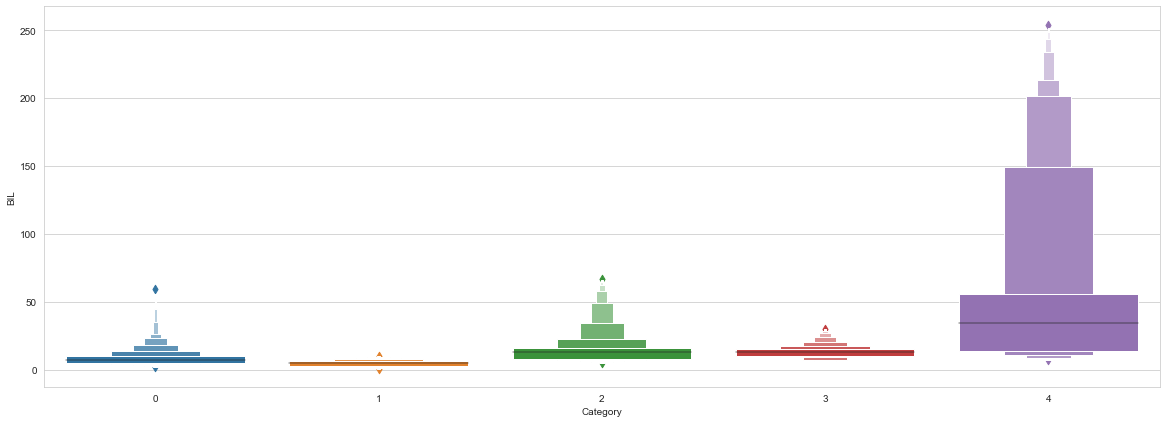

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


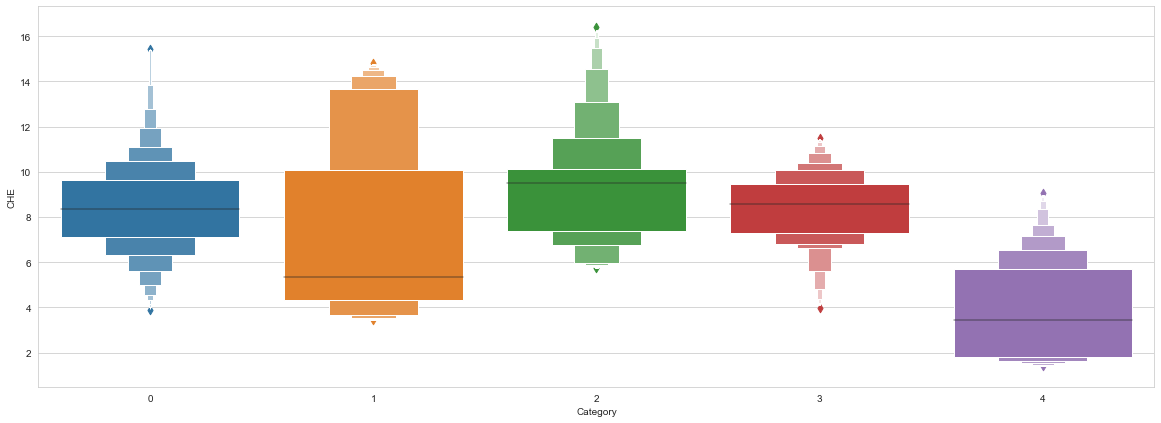

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


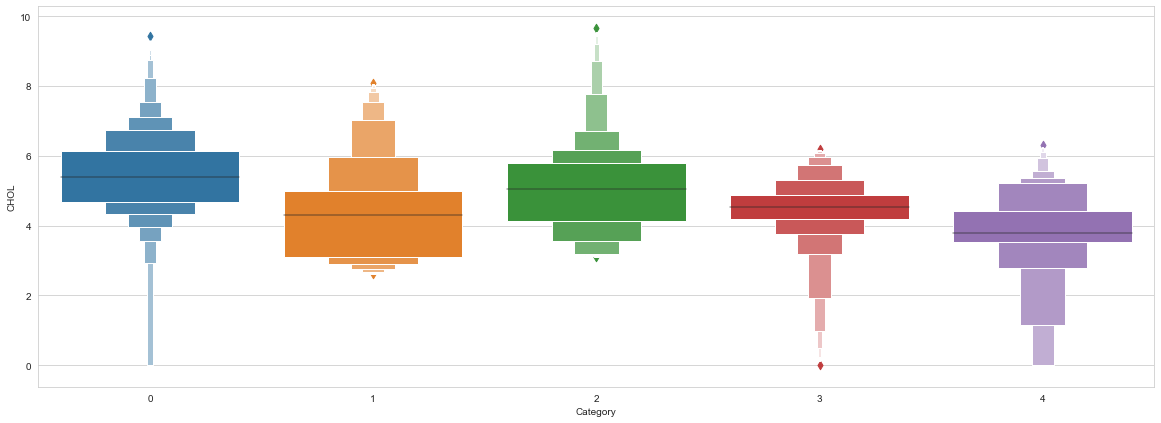

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


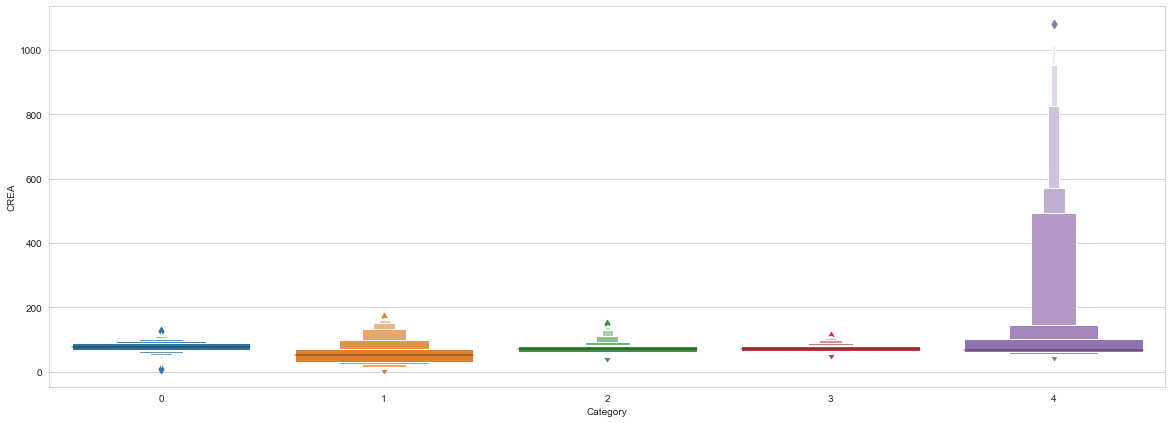

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


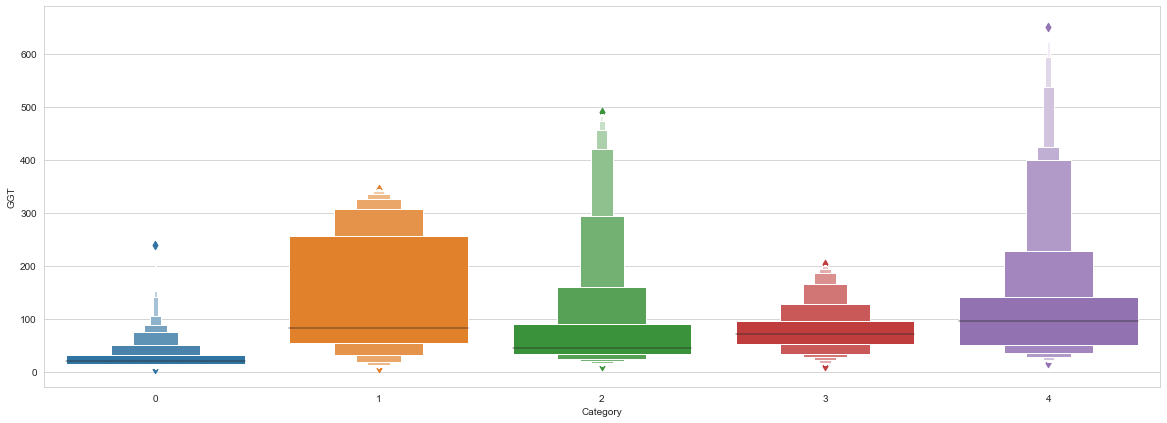

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


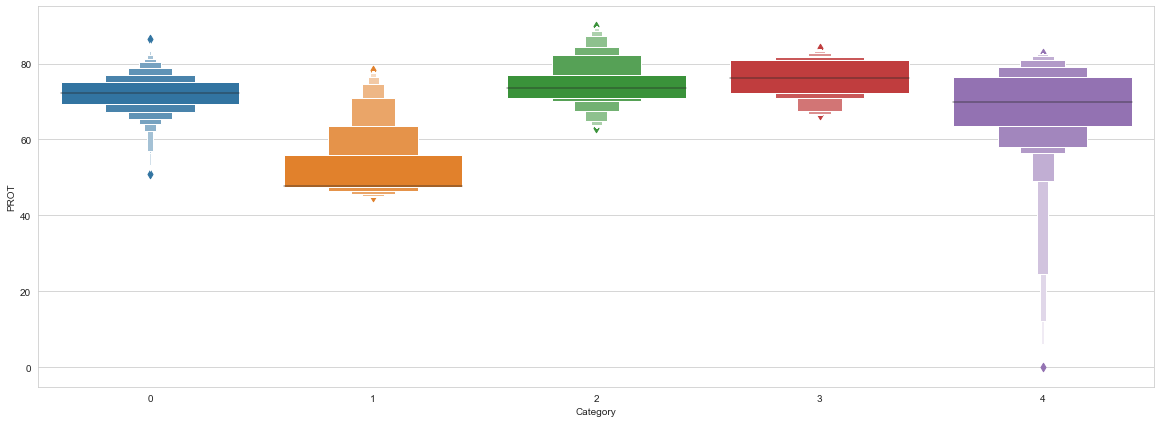

In [96]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(20,7))
    sns.lvplot(x=df.Category,y=df[i],data=df,linewidth=1)
    plt.show()

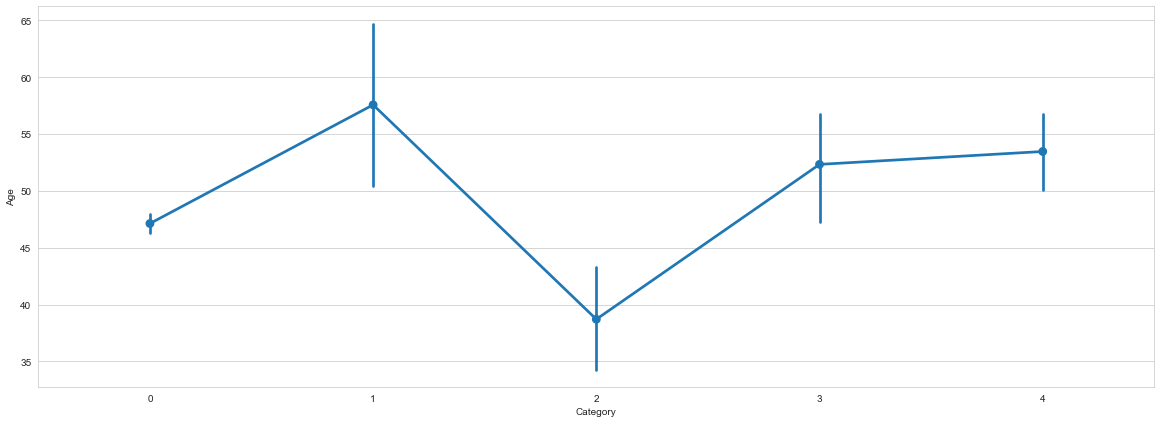

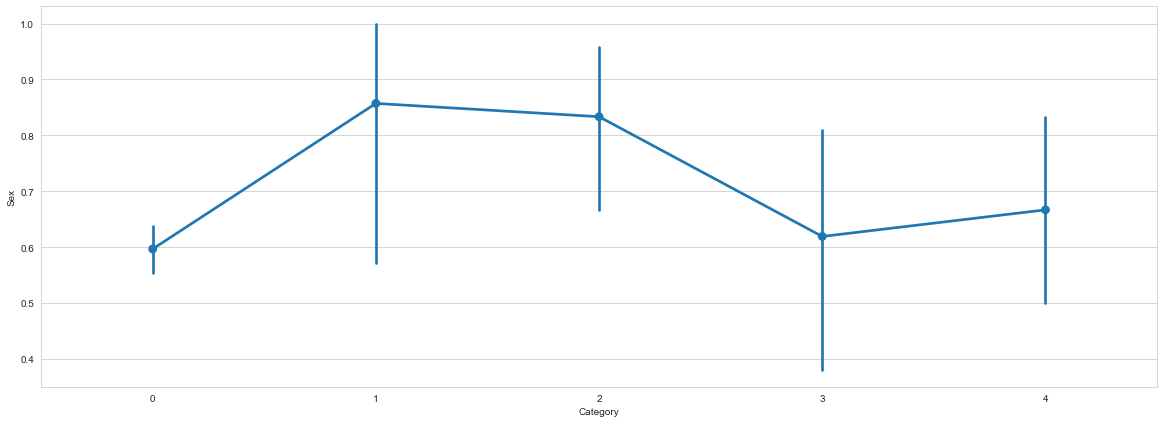

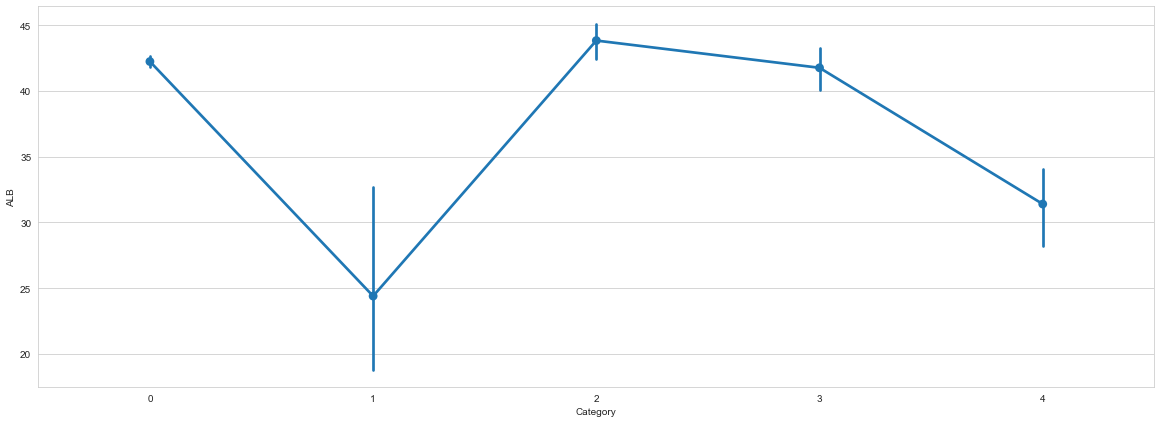

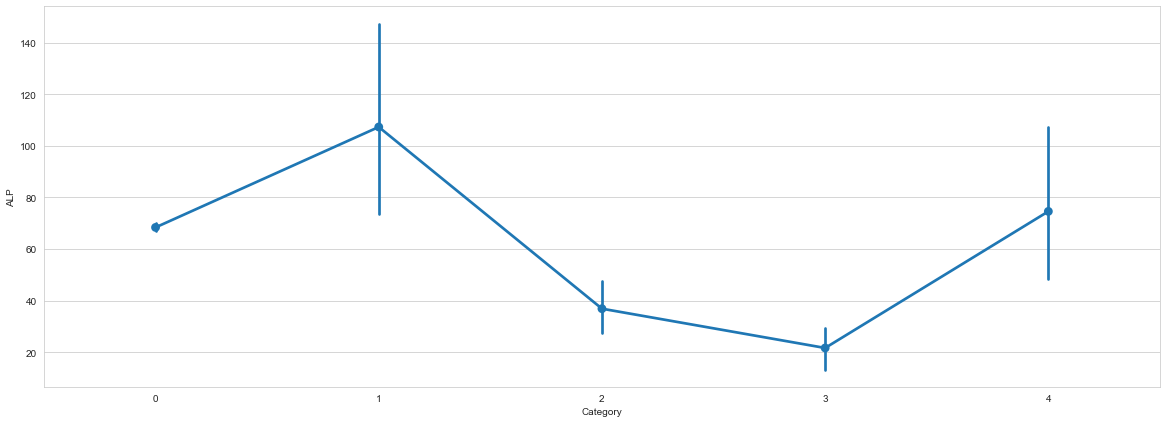

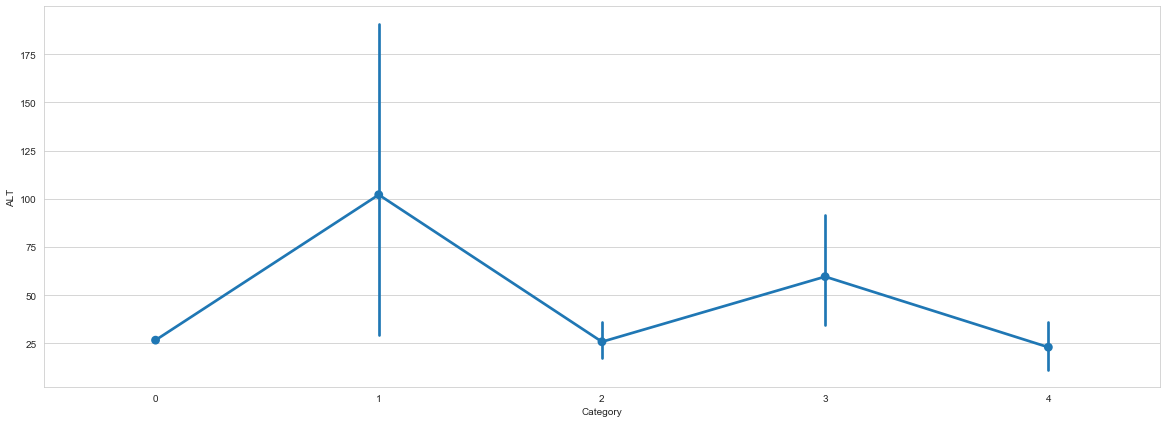

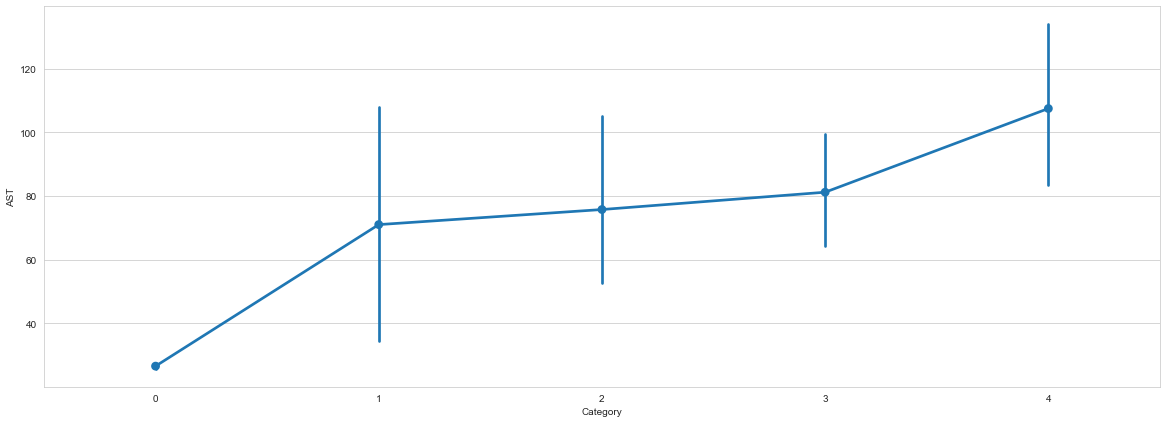

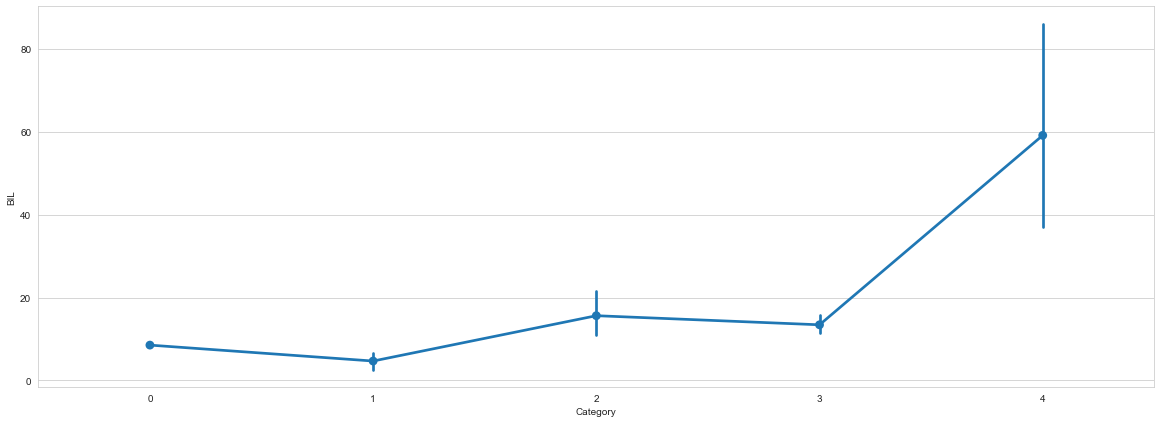

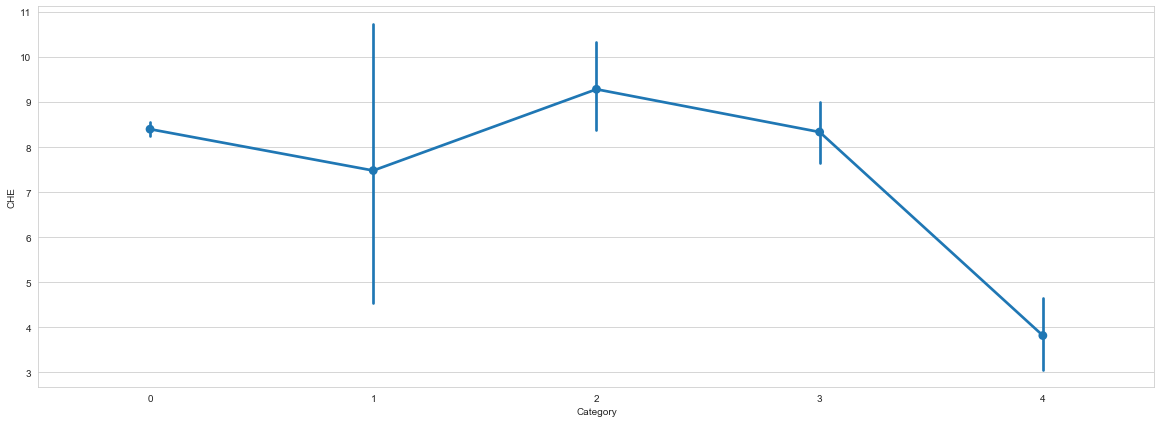

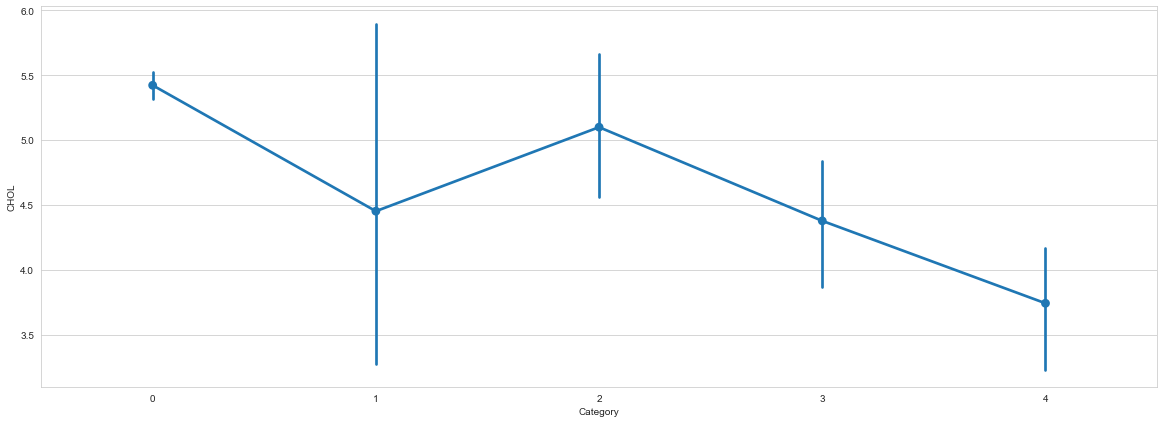

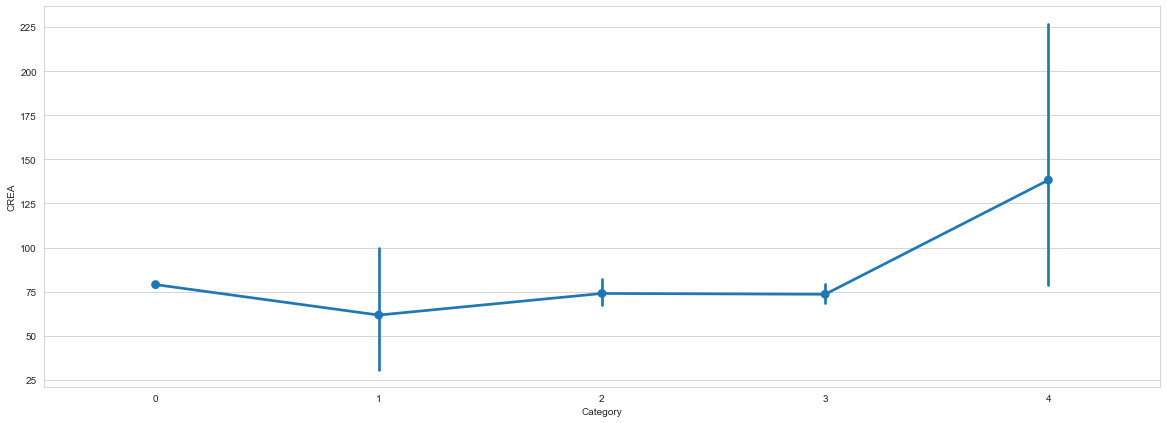

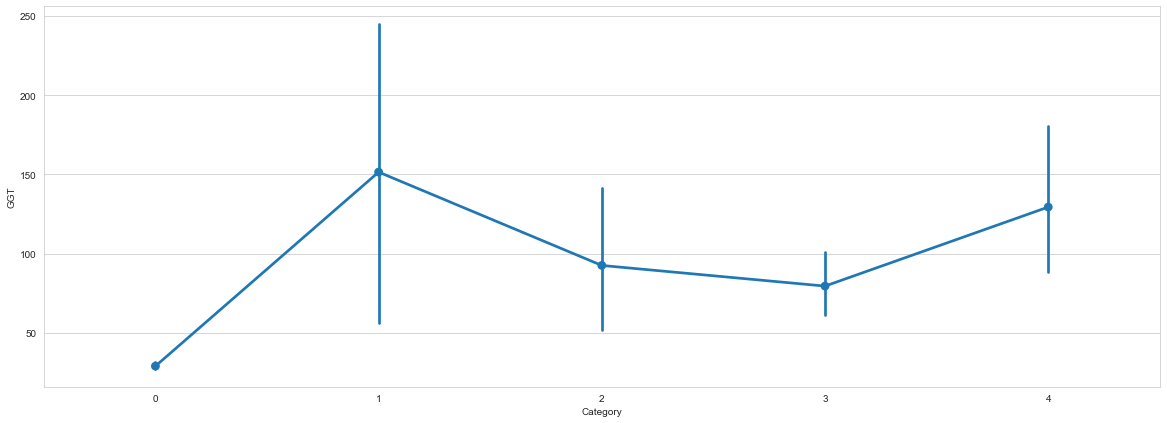

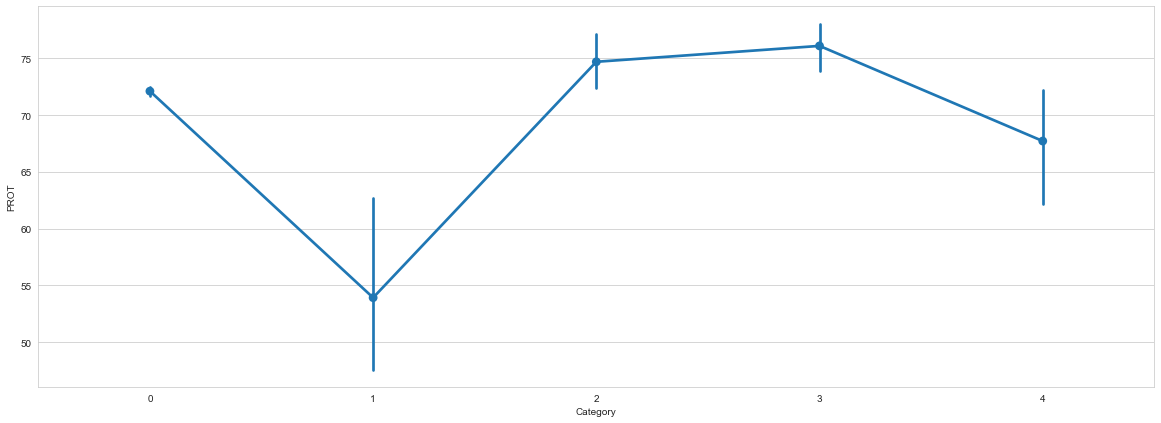

In [97]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(20,7))
    sns.pointplot(x=df.Category,y=df[i],data=df,linewidth=1)
    plt.show()

<Figure size 1440x504 with 0 Axes>

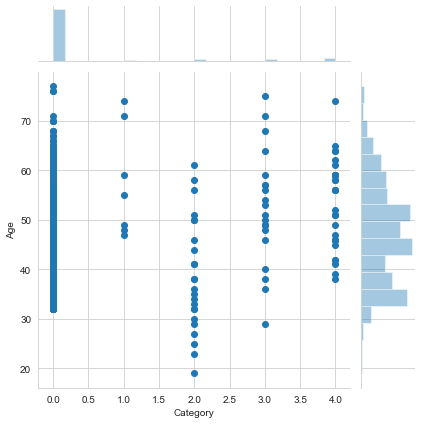

<Figure size 1440x504 with 0 Axes>

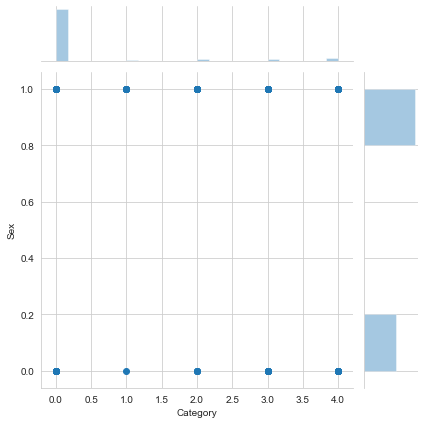

<Figure size 1440x504 with 0 Axes>

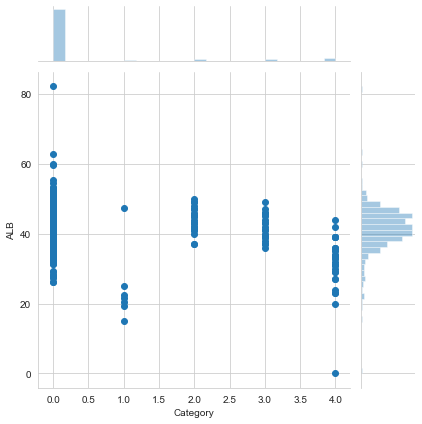

<Figure size 1440x504 with 0 Axes>

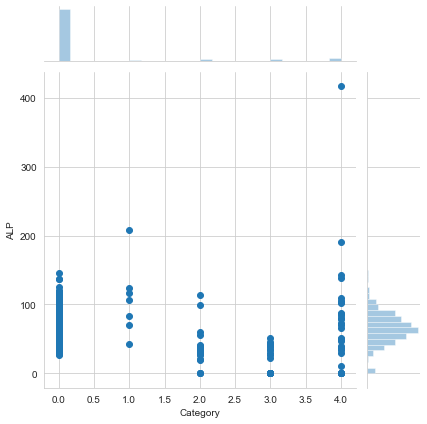

<Figure size 1440x504 with 0 Axes>

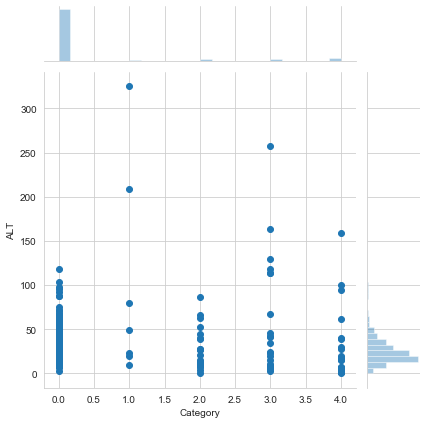

<Figure size 1440x504 with 0 Axes>

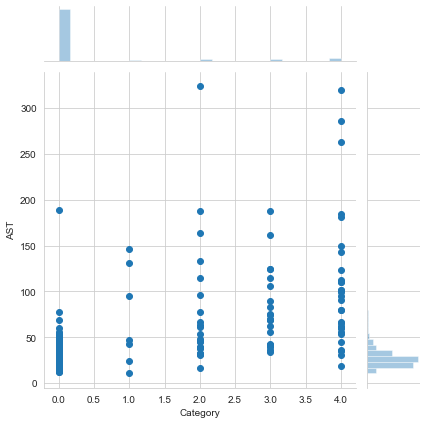

<Figure size 1440x504 with 0 Axes>

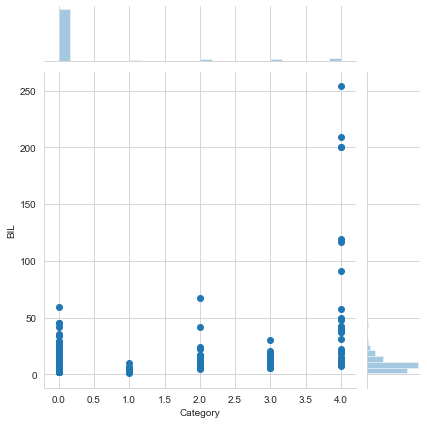

<Figure size 1440x504 with 0 Axes>

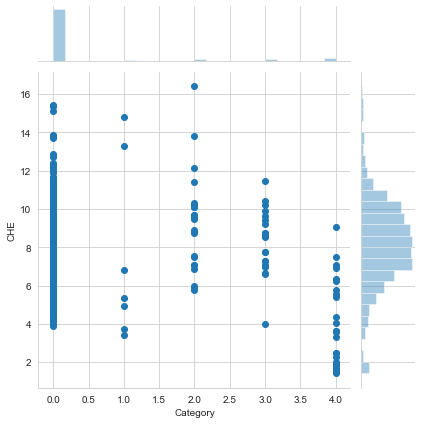

<Figure size 1440x504 with 0 Axes>

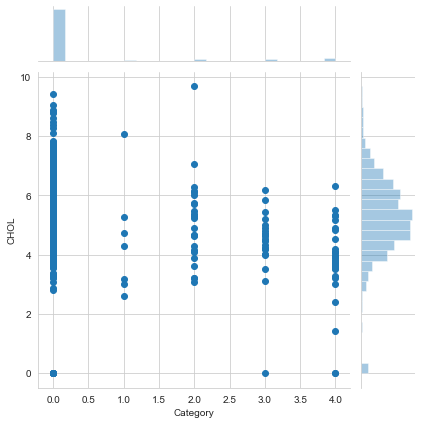

<Figure size 1440x504 with 0 Axes>

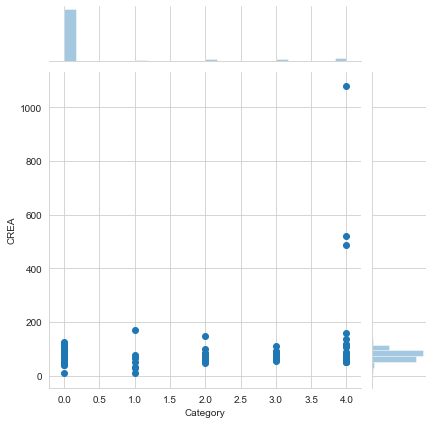

<Figure size 1440x504 with 0 Axes>

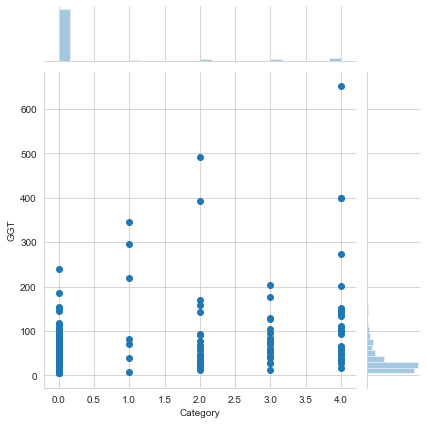

<Figure size 1440x504 with 0 Axes>

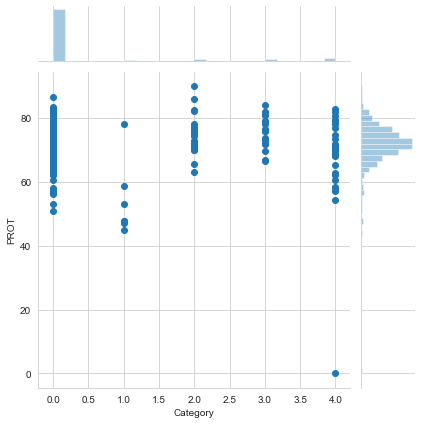

In [99]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(20,7))
    sns.jointplot(x=df.Category,y=df[i],data=df,linewidth=1)
    plt.show()

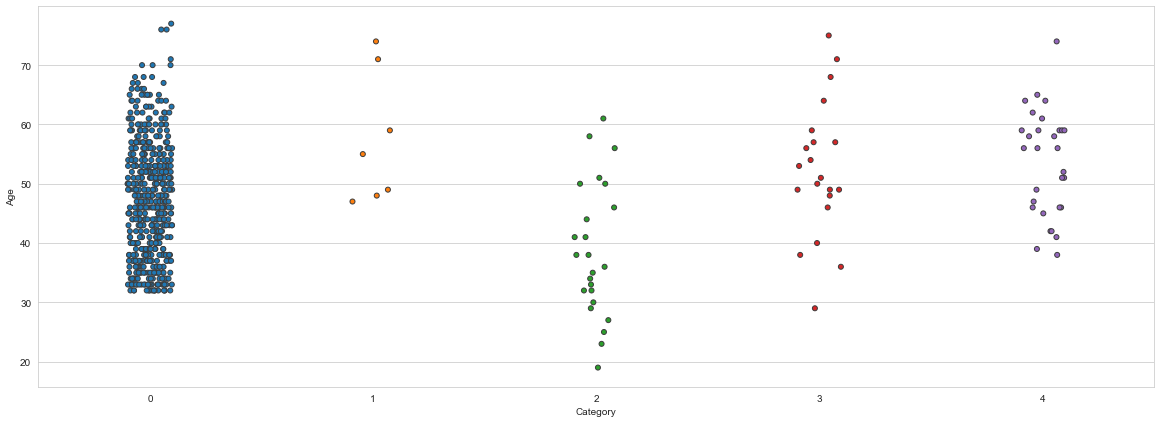

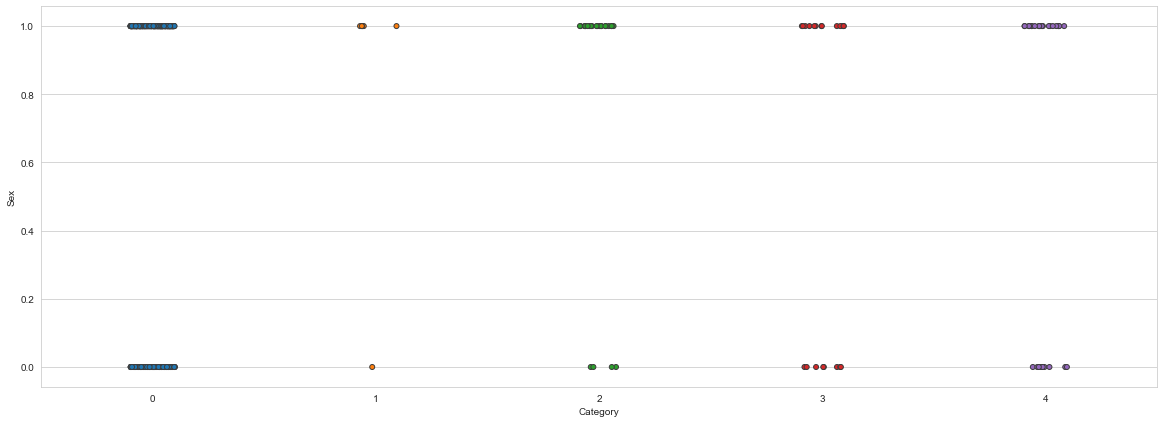

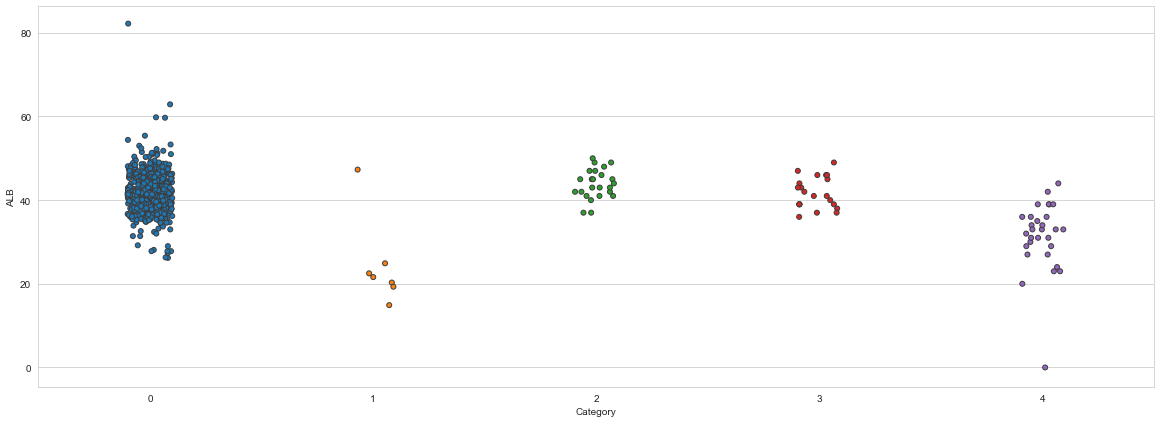

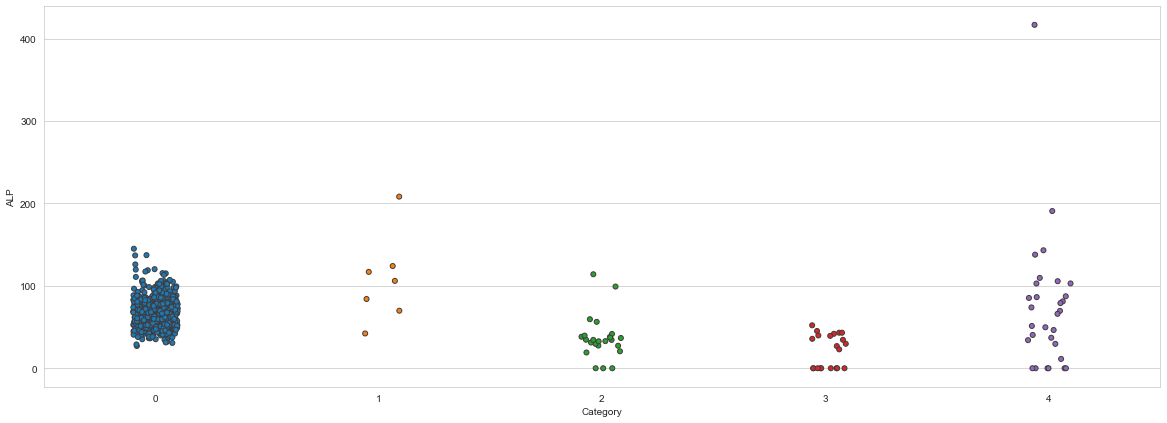

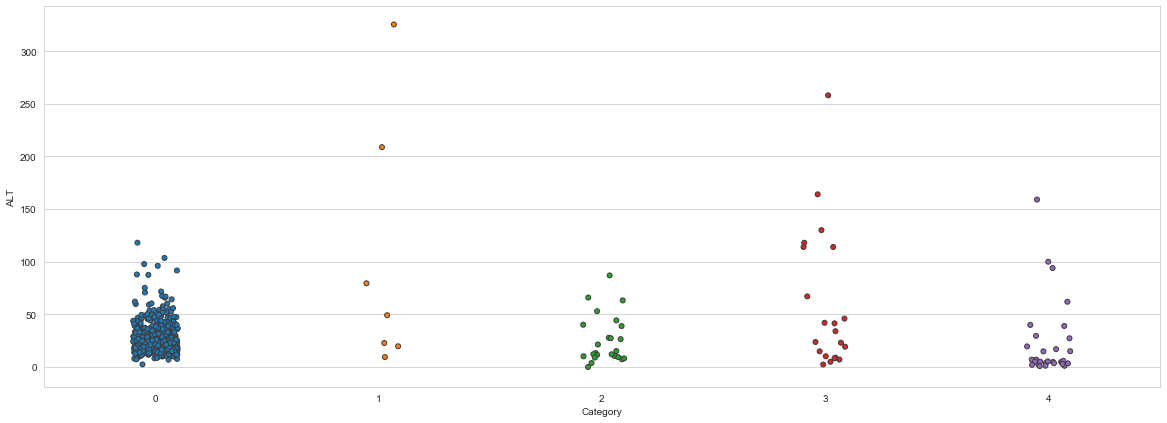

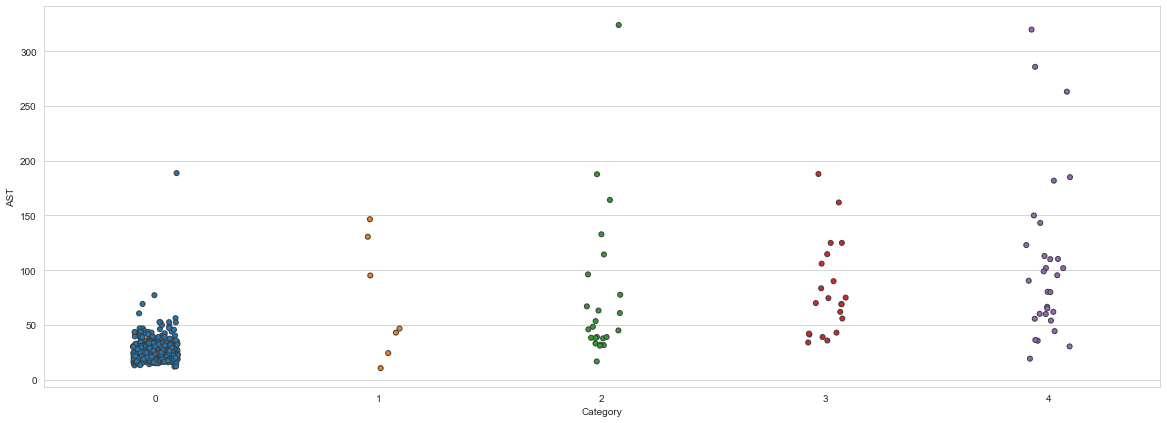

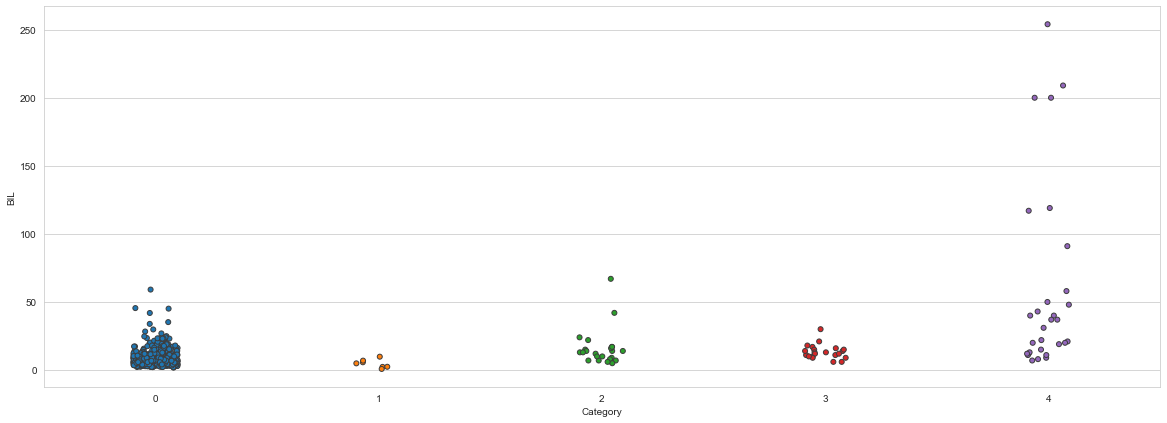

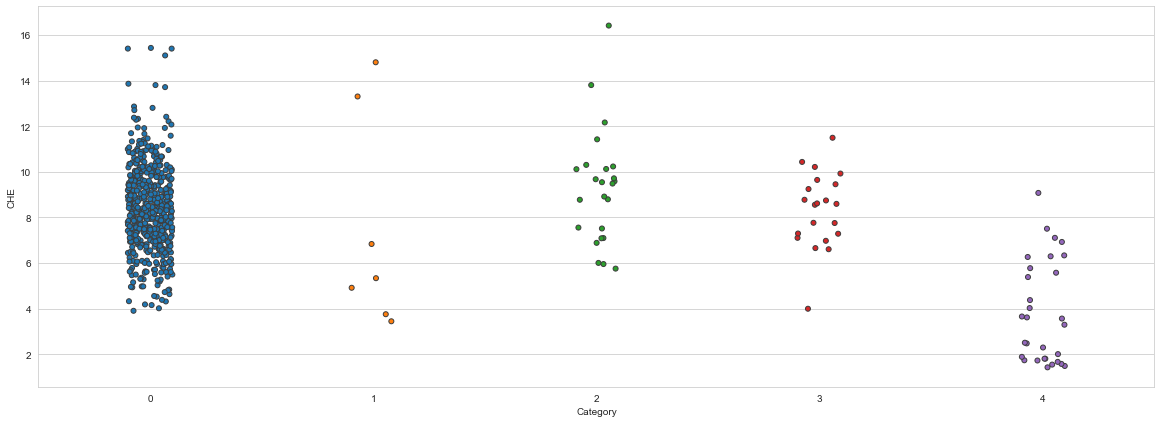

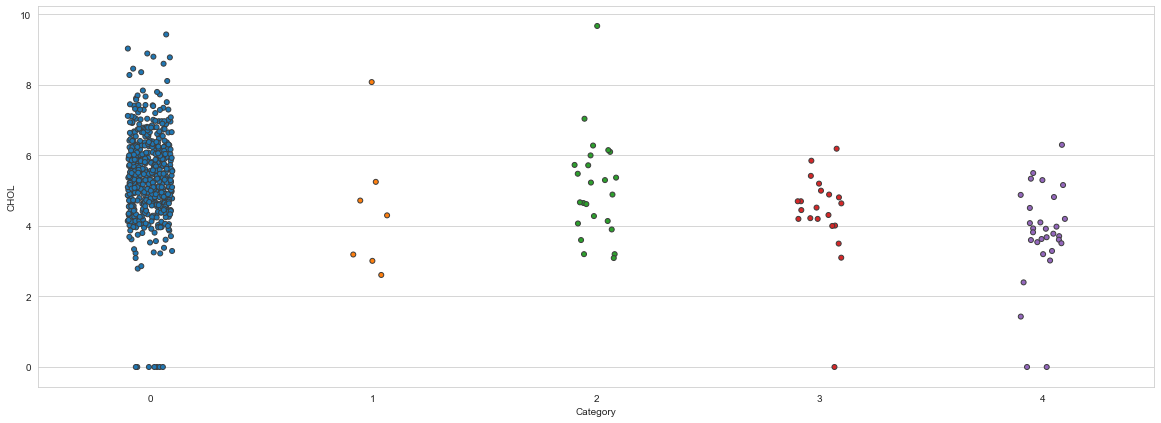

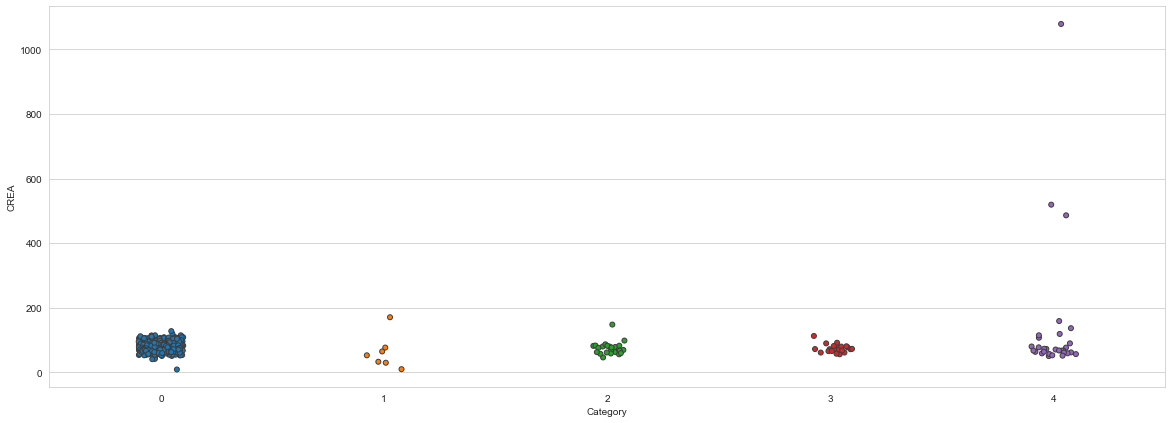

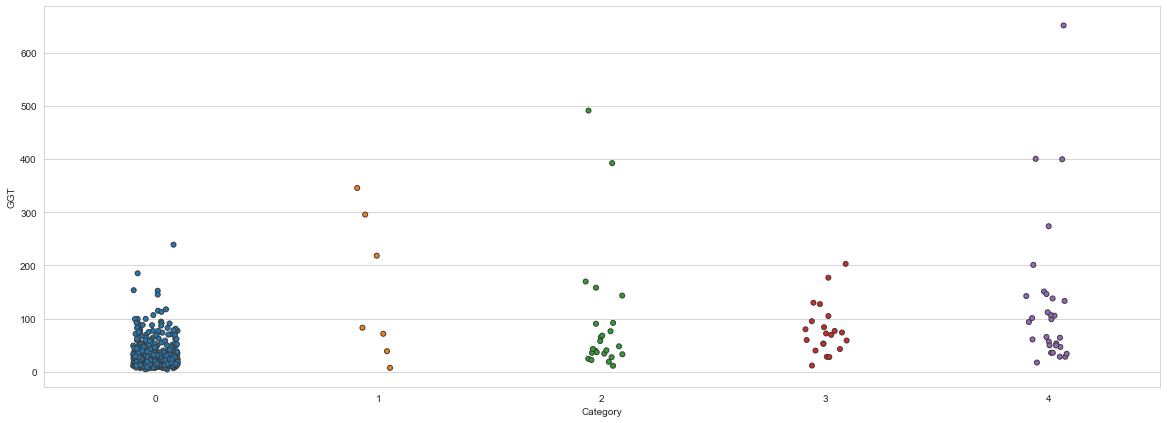

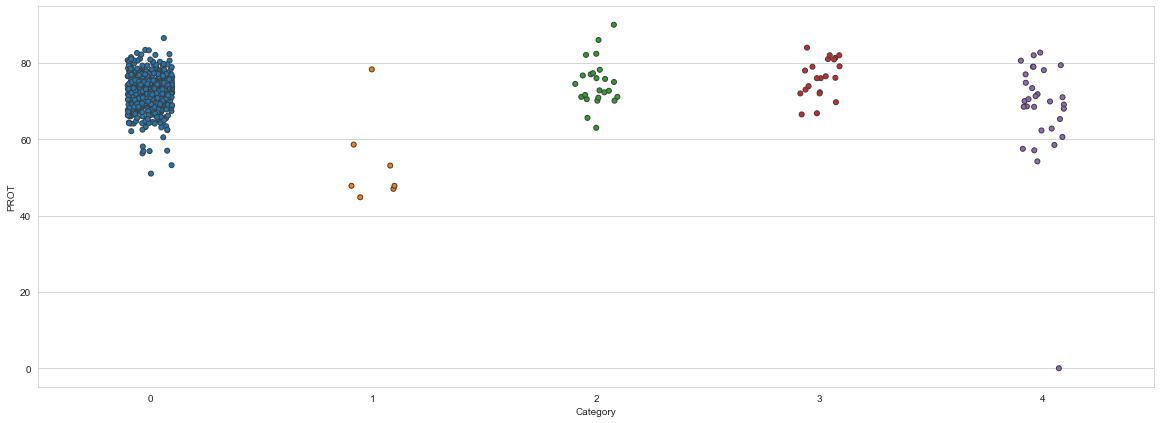

In [100]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(20,7))
    sns.stripplot(x=df.Category,y=df[i],data=df,linewidth=1)
    plt.show()

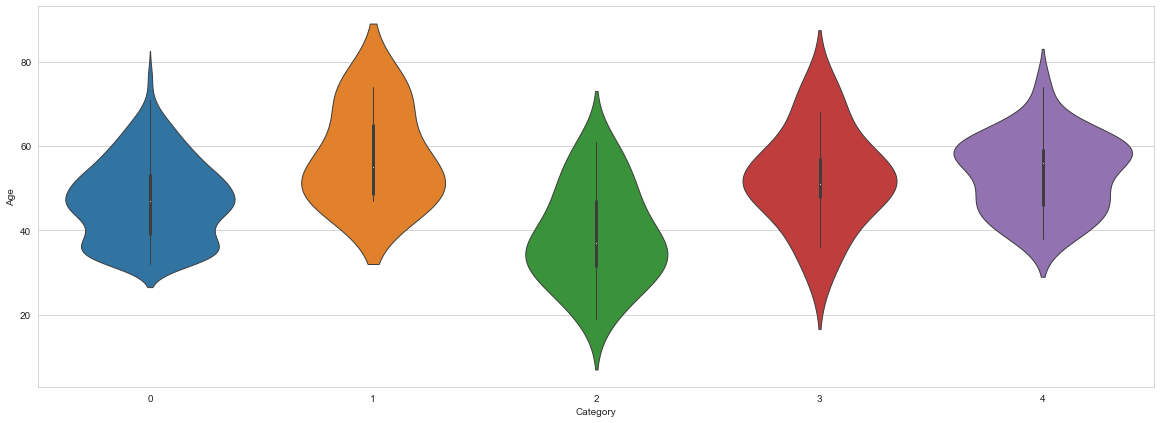

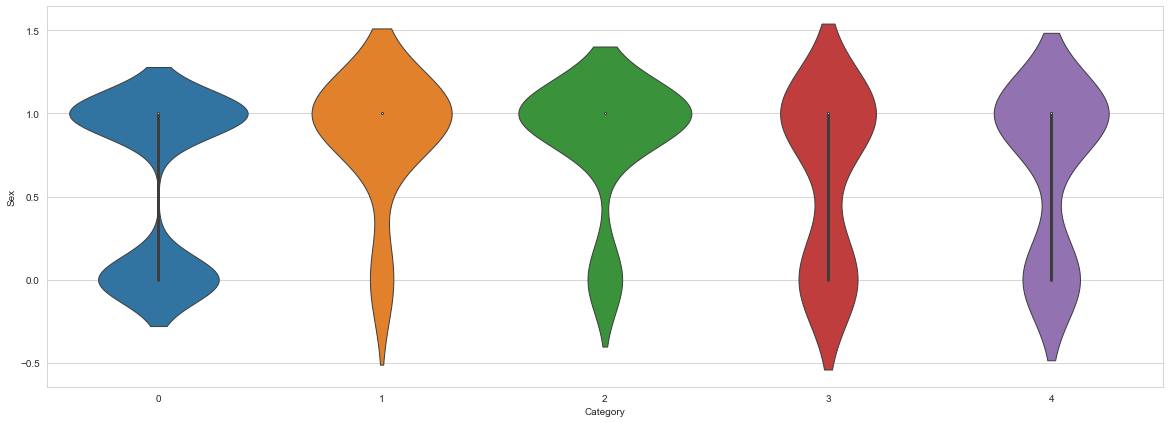

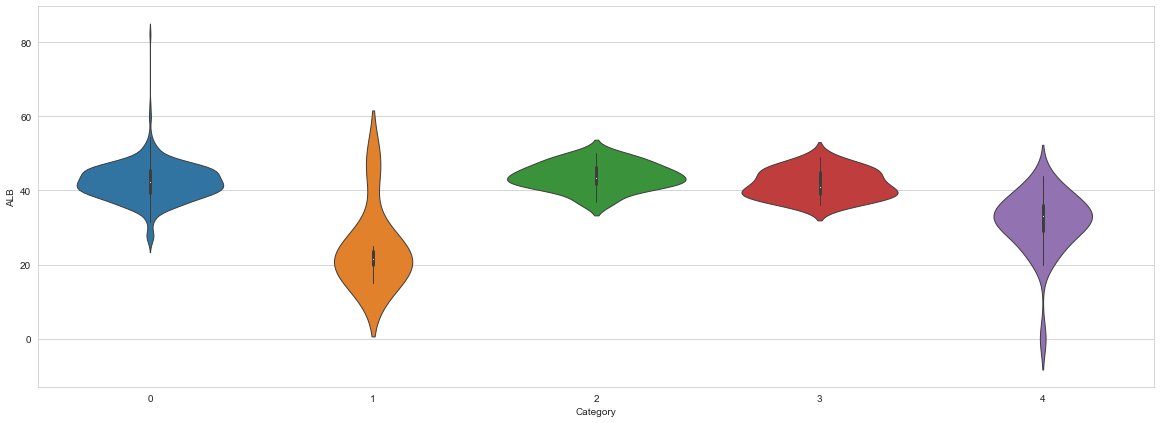

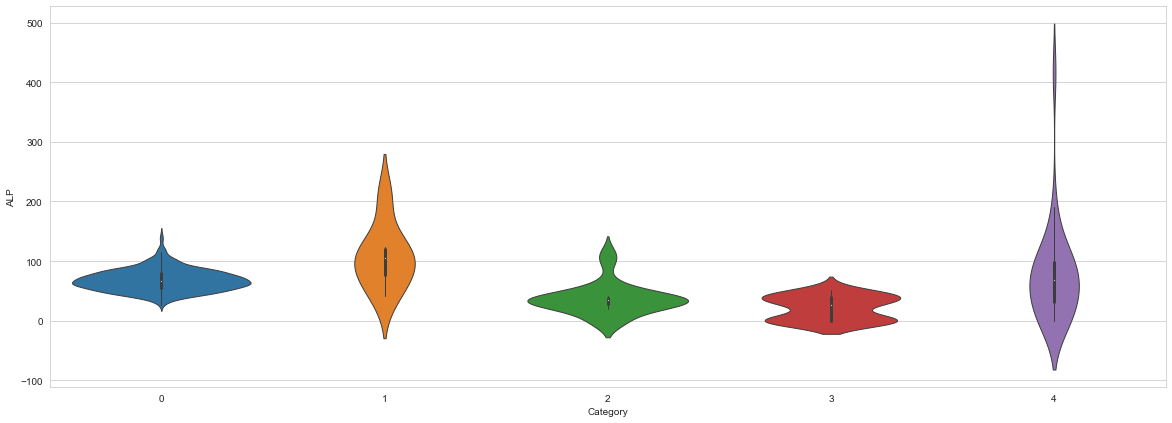

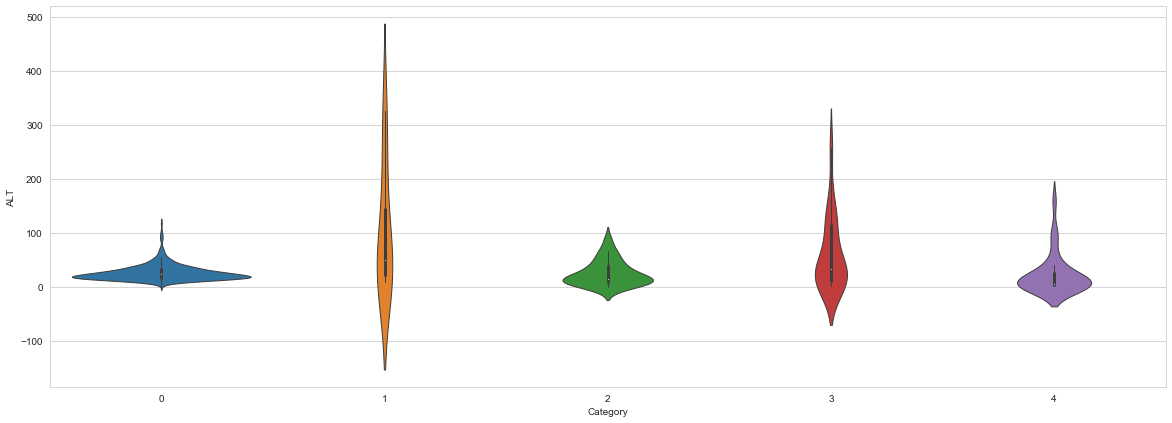

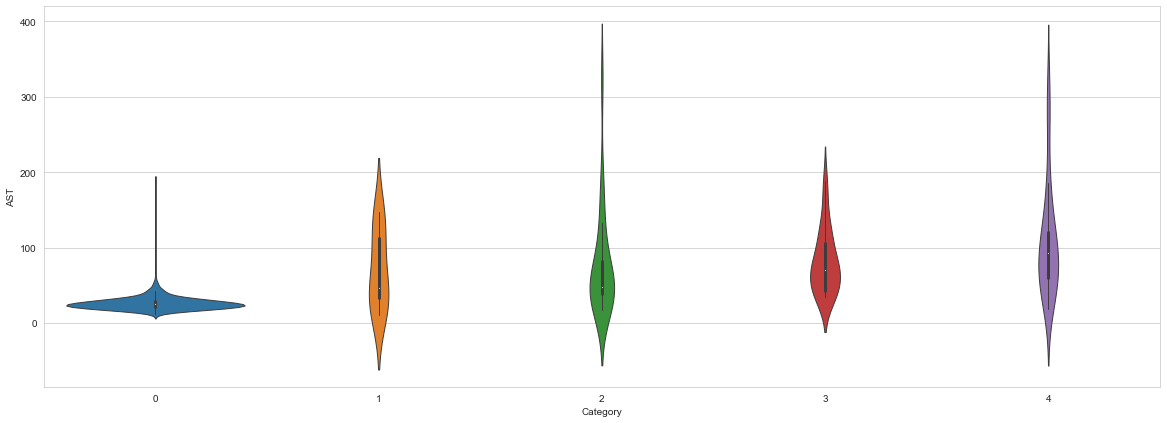

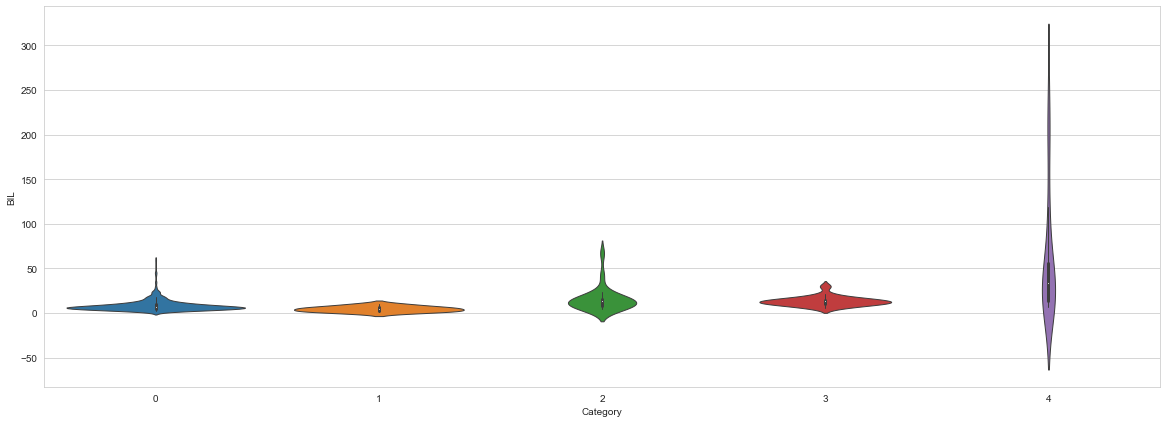

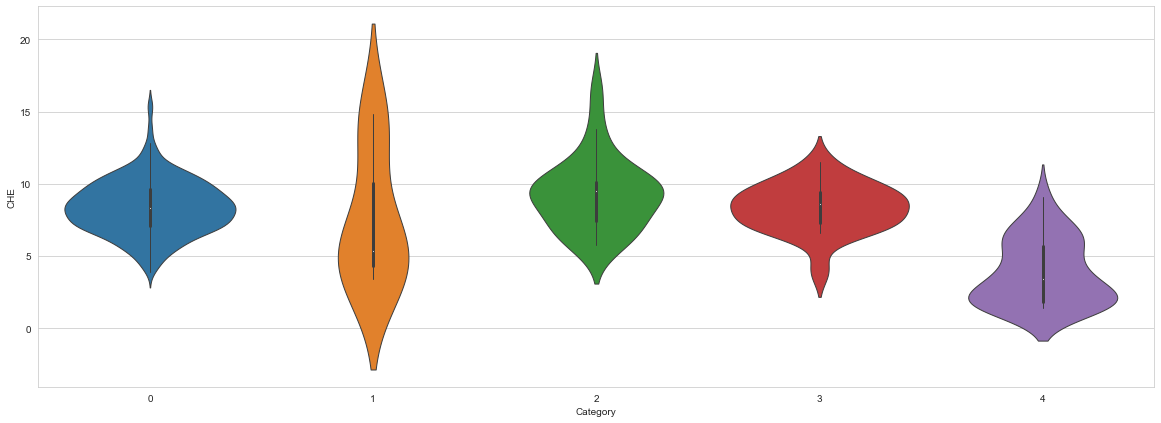

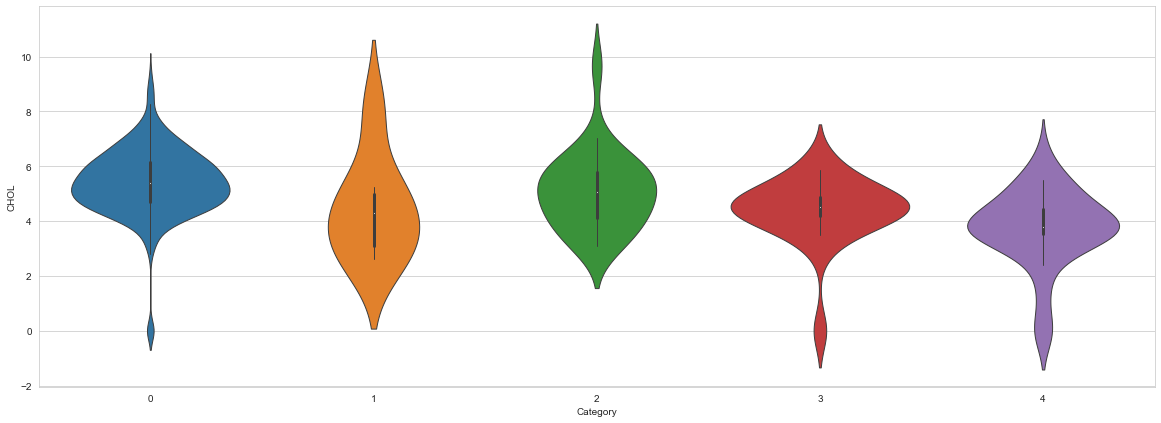

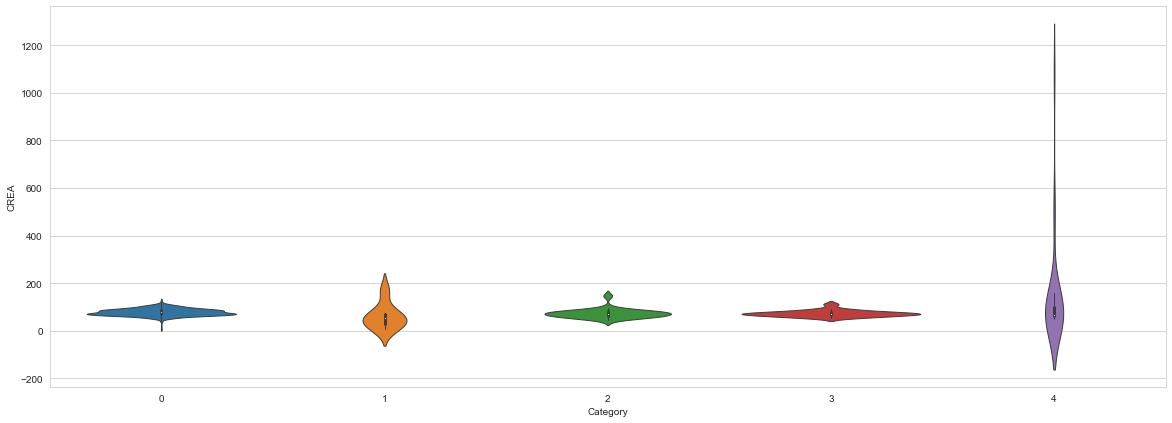

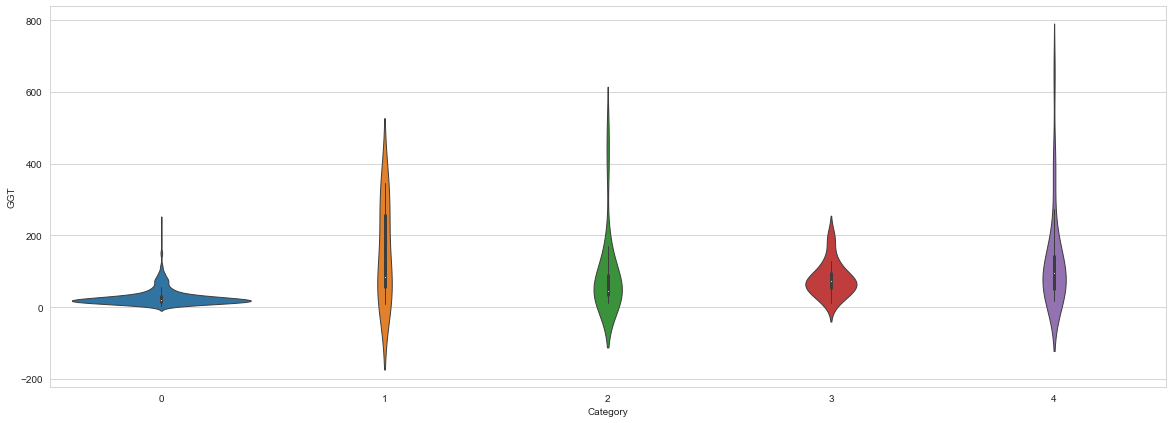

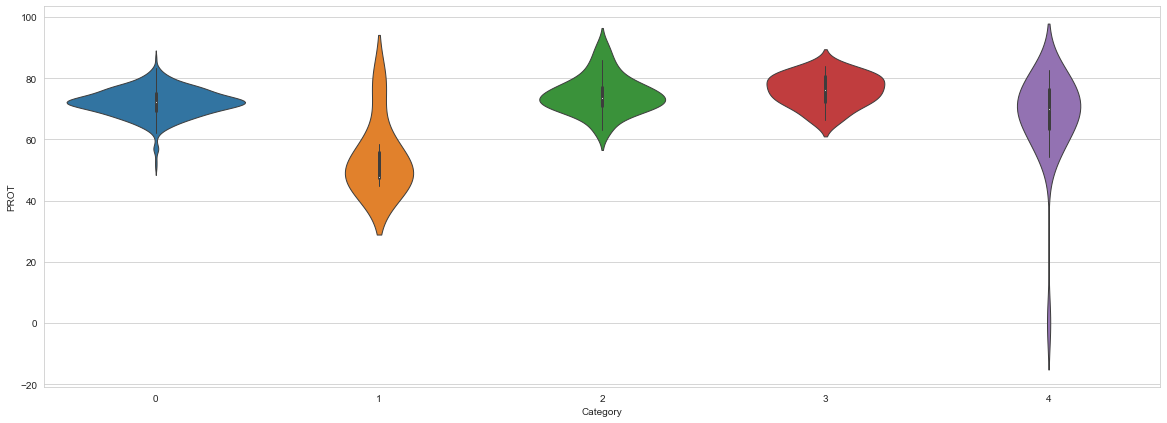

In [101]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(20,7))
    sns.violinplot(x=df.Category,y=df[i],data=df,linewidth=1)
    plt.show()

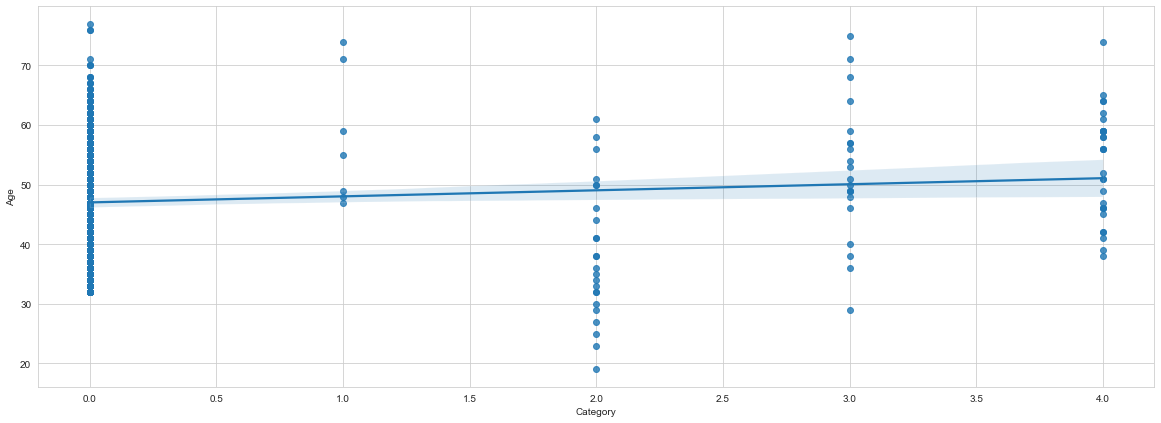

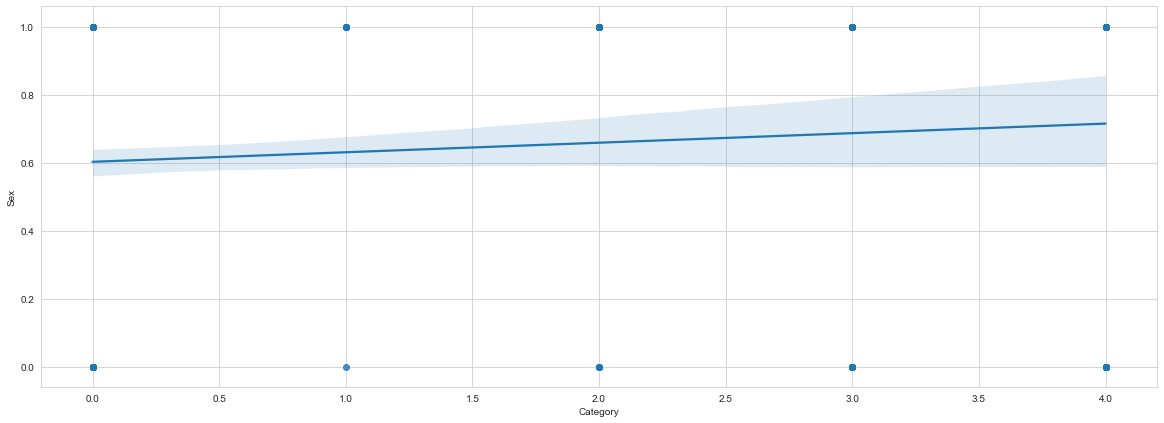

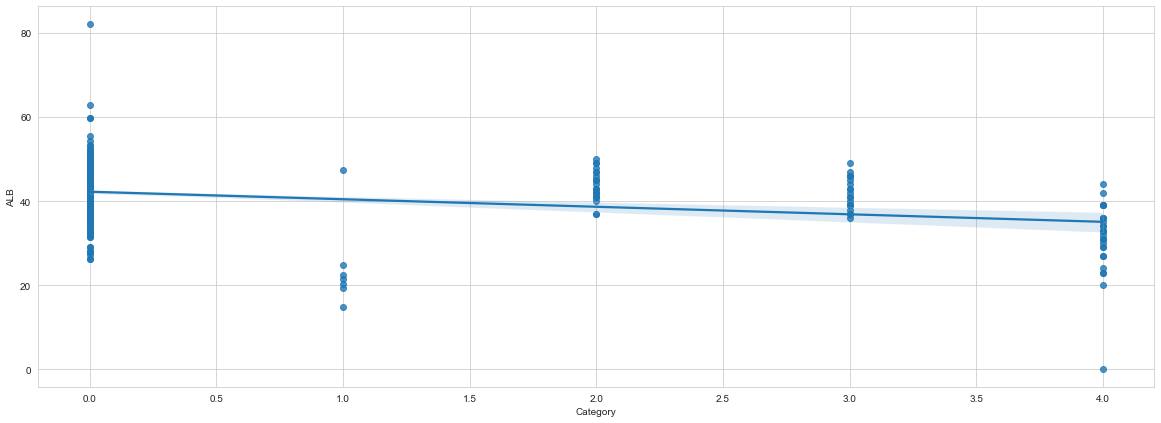

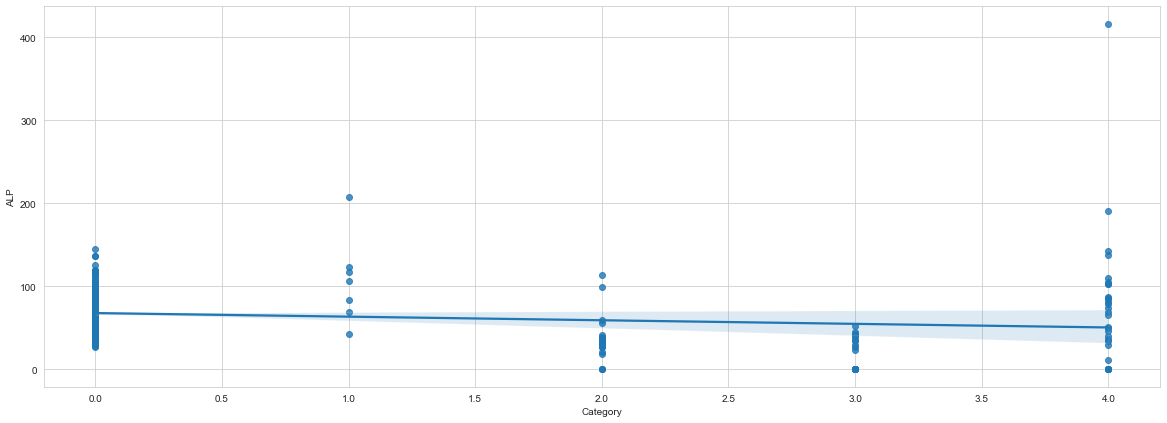

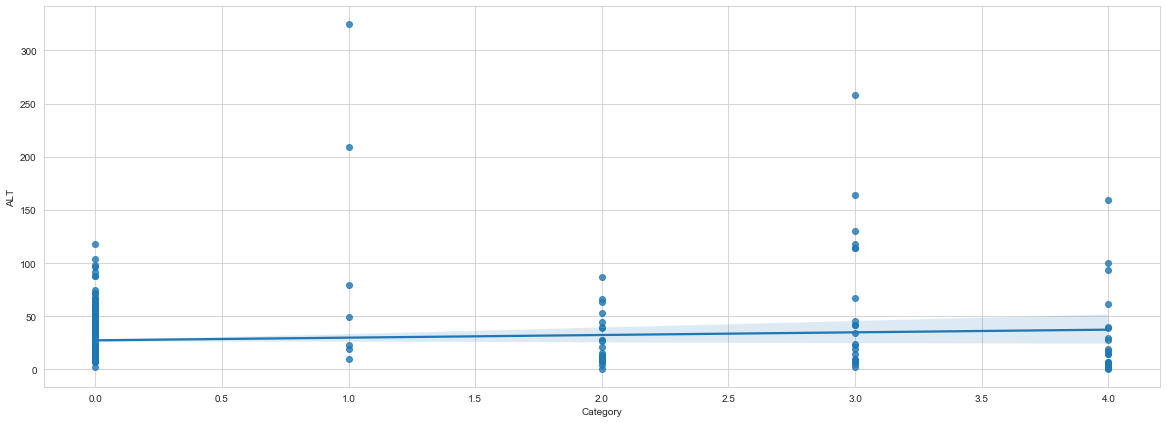

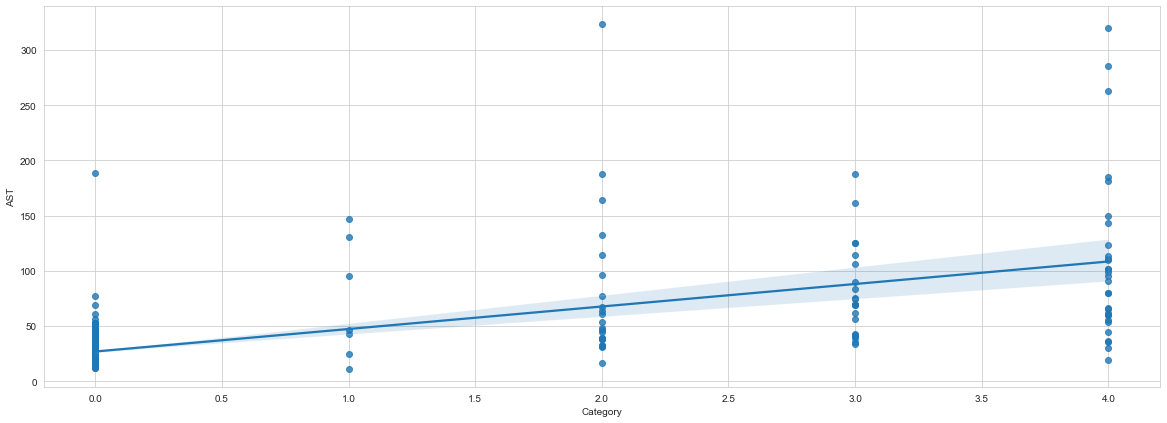

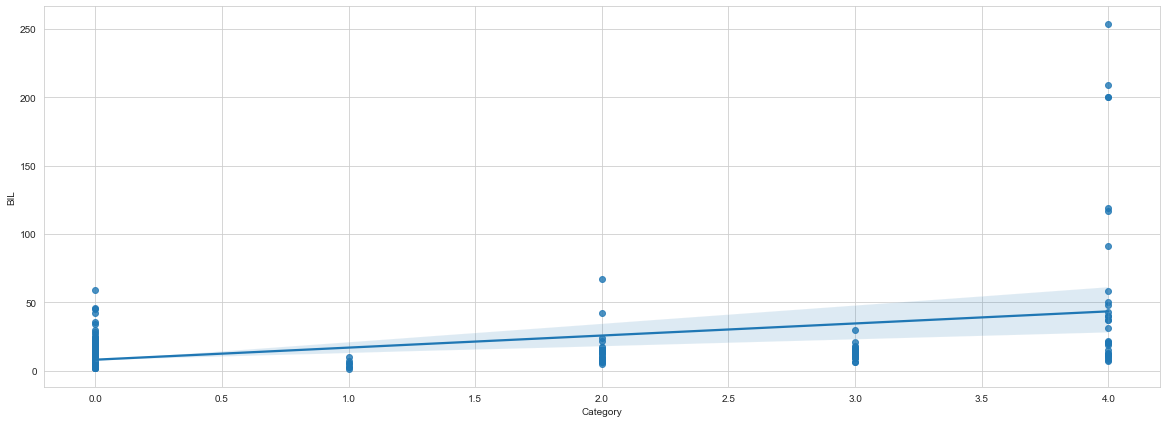

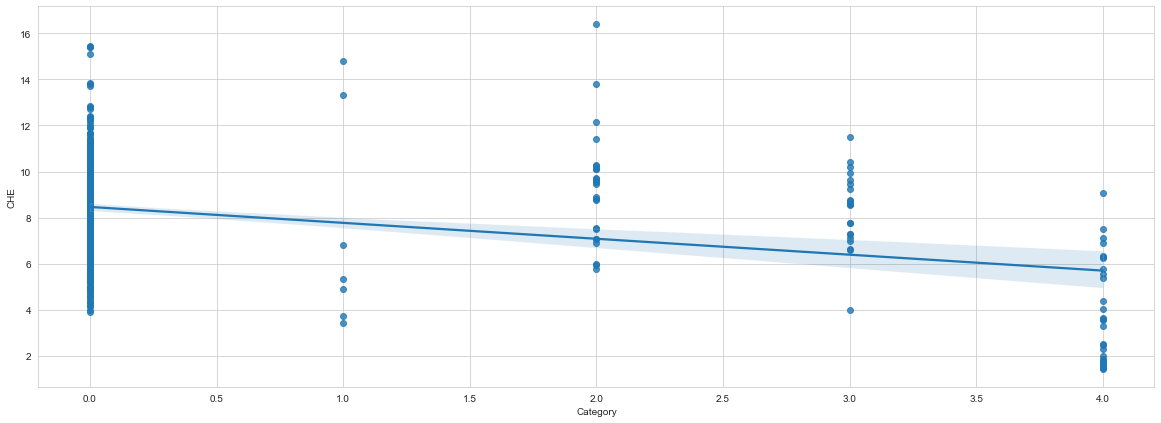

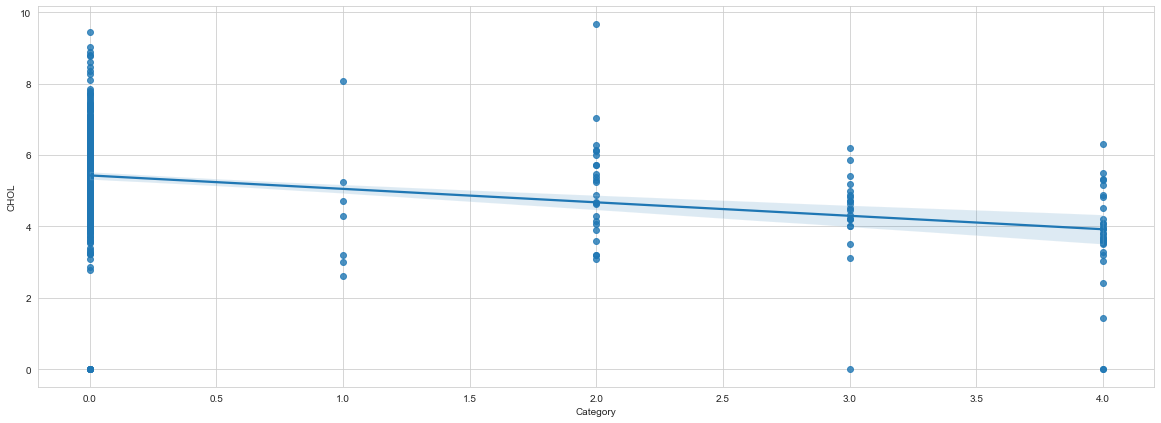

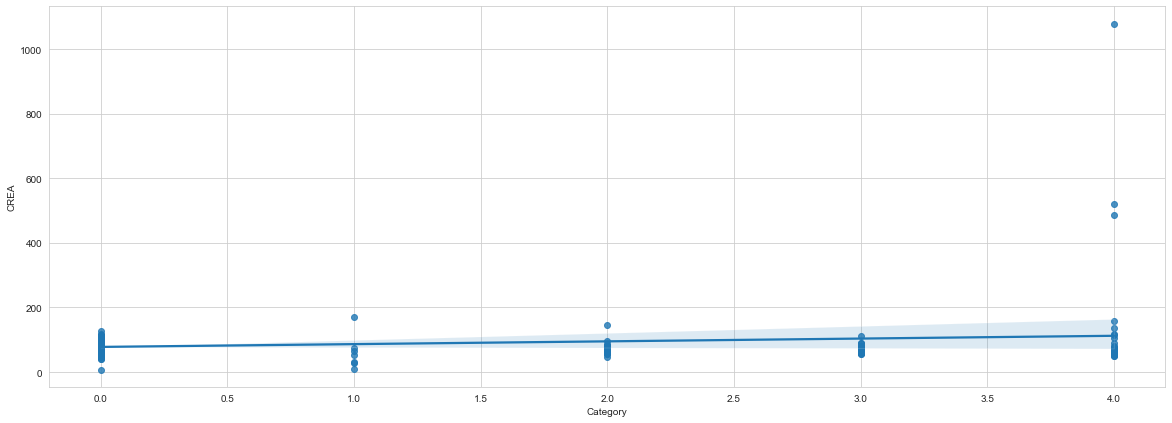

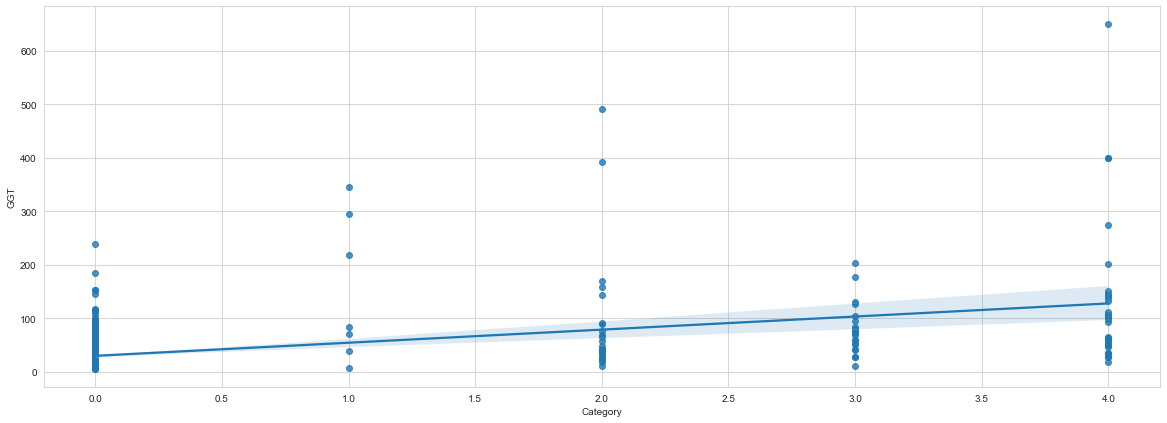

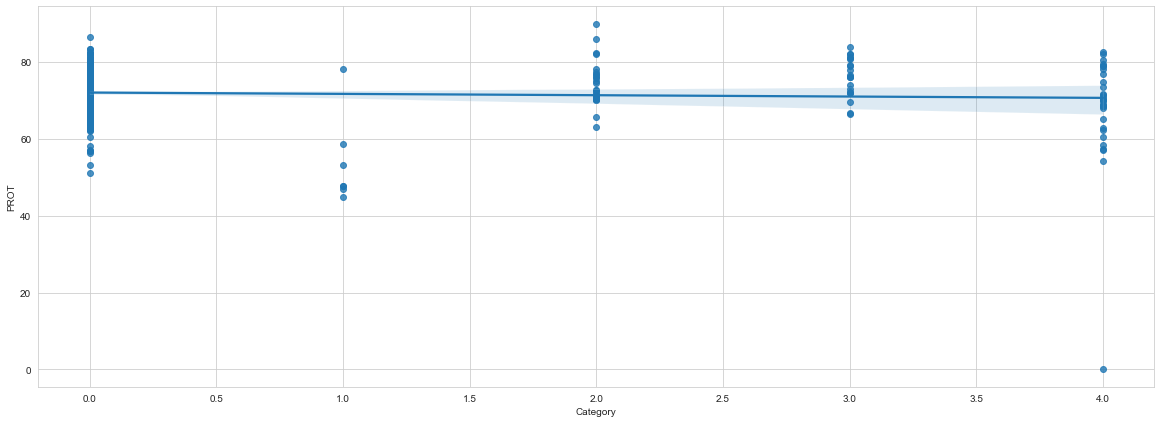

In [103]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(20,7))
    sns.regplot(x=df.Category,y=df[i],data=df)
    plt.show()

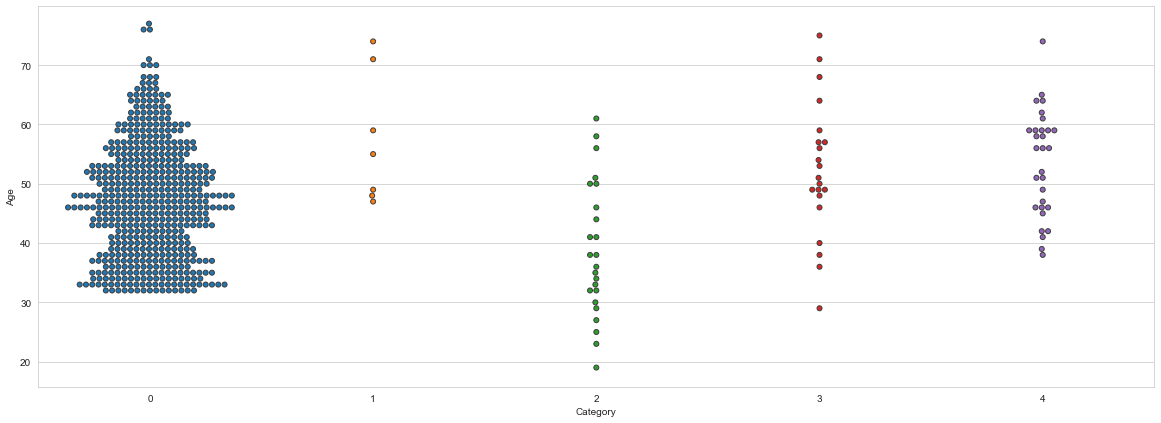

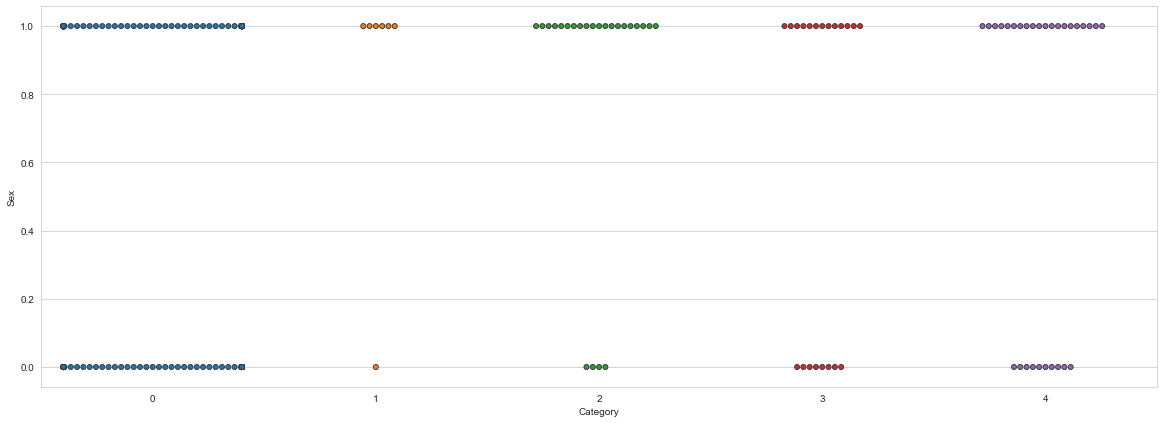

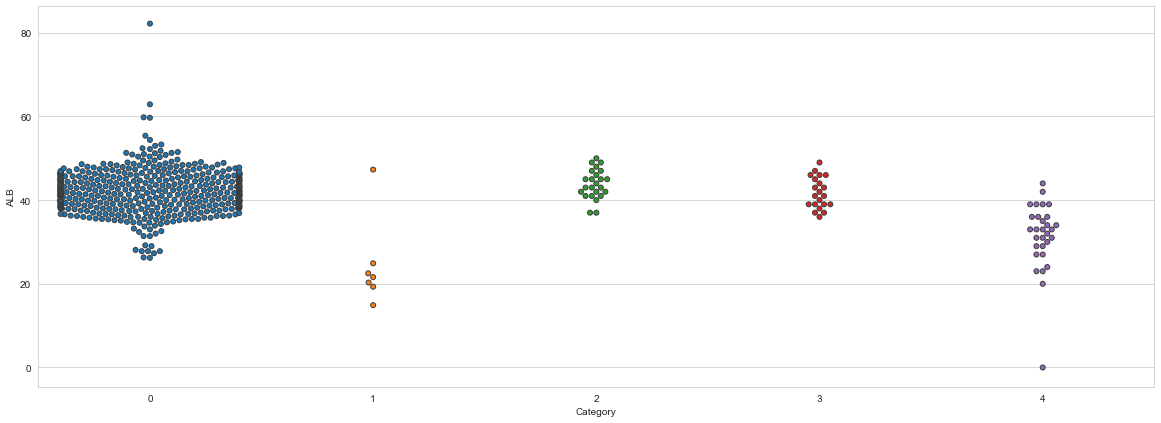

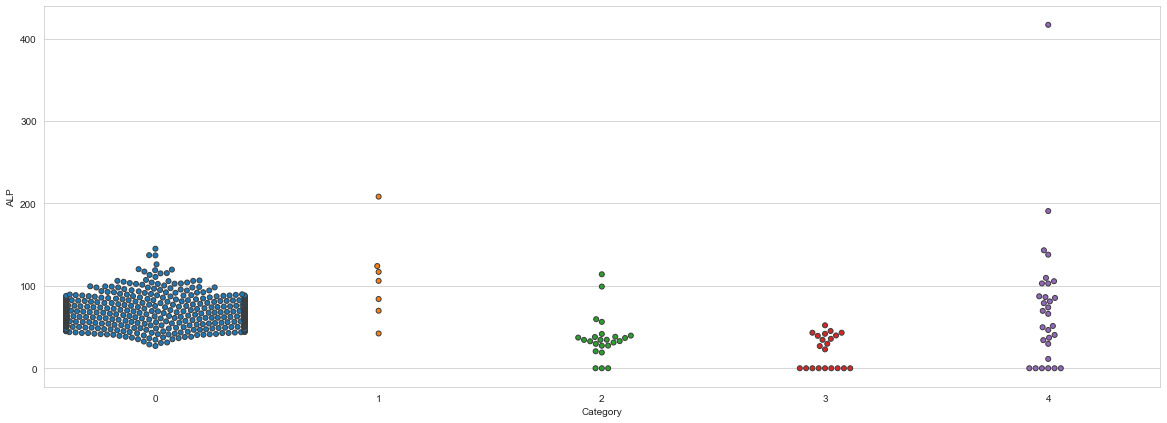

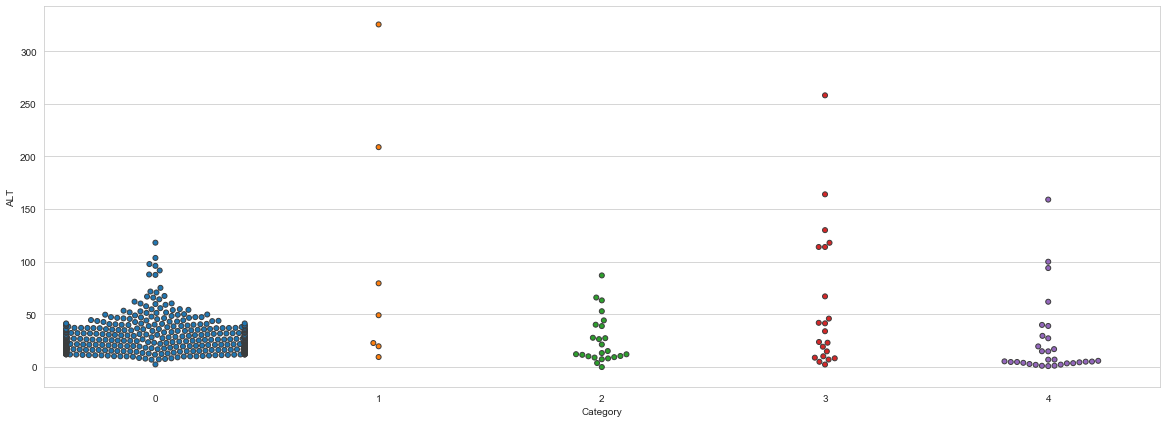

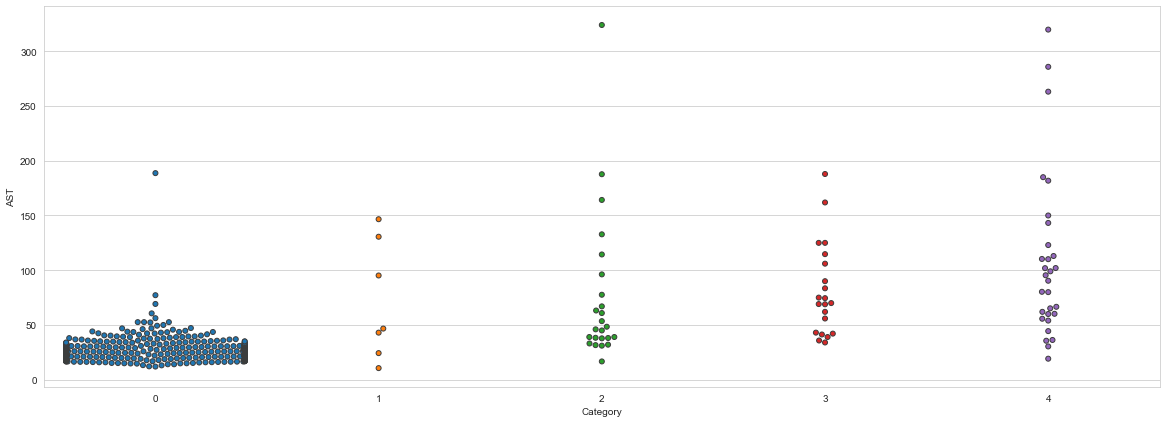

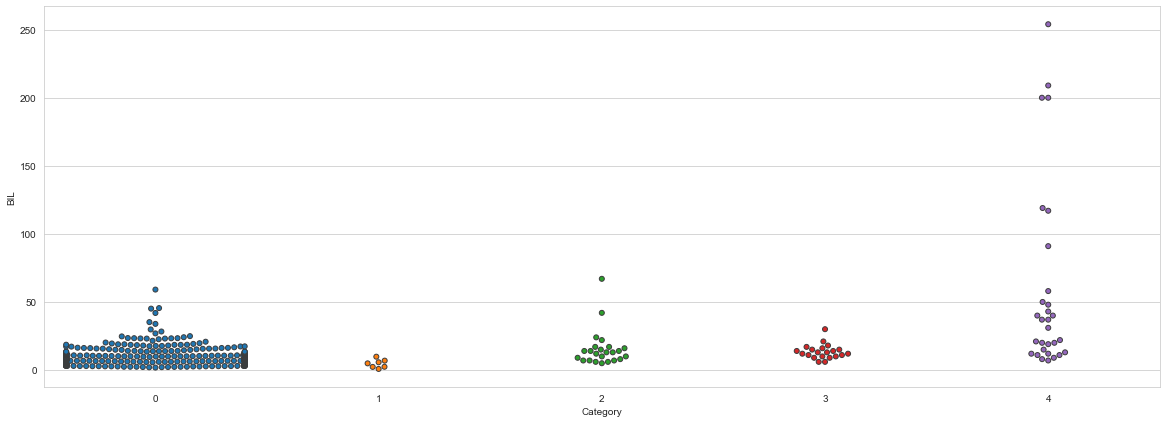

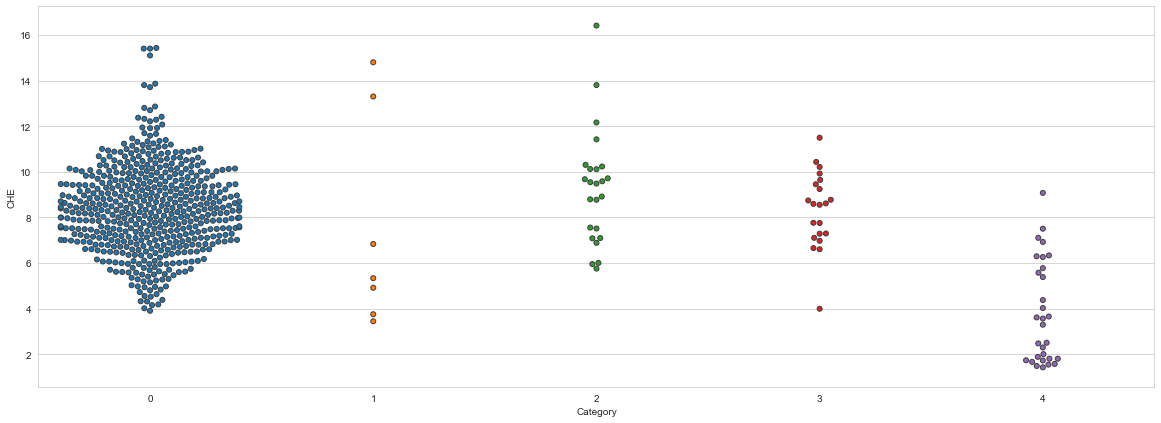

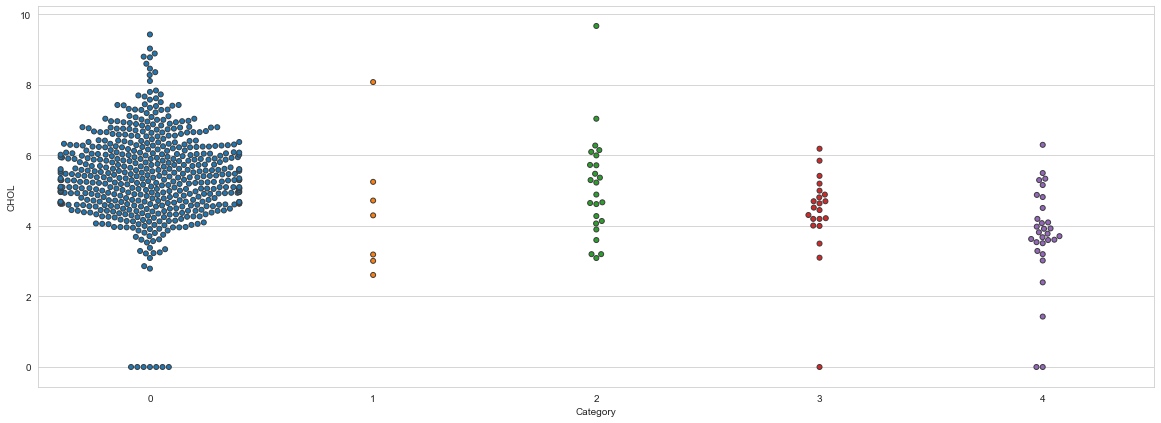

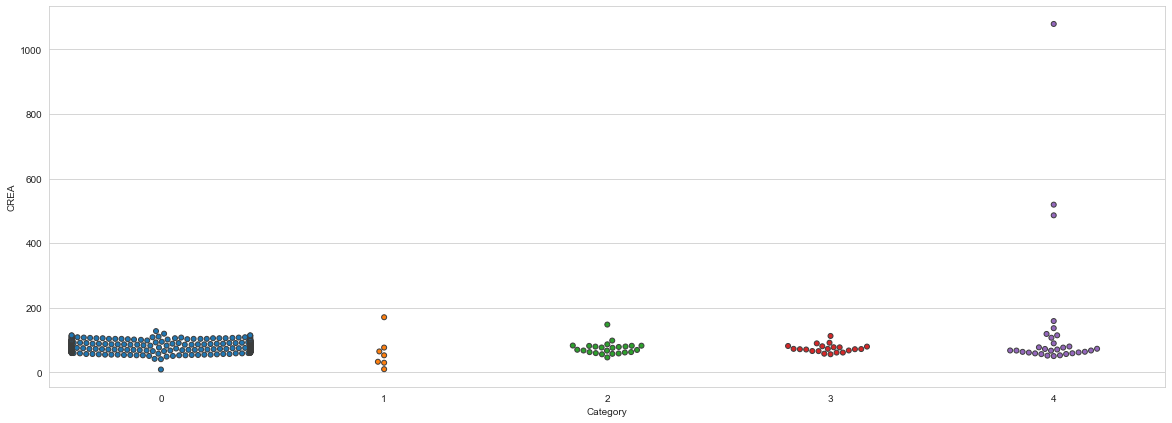

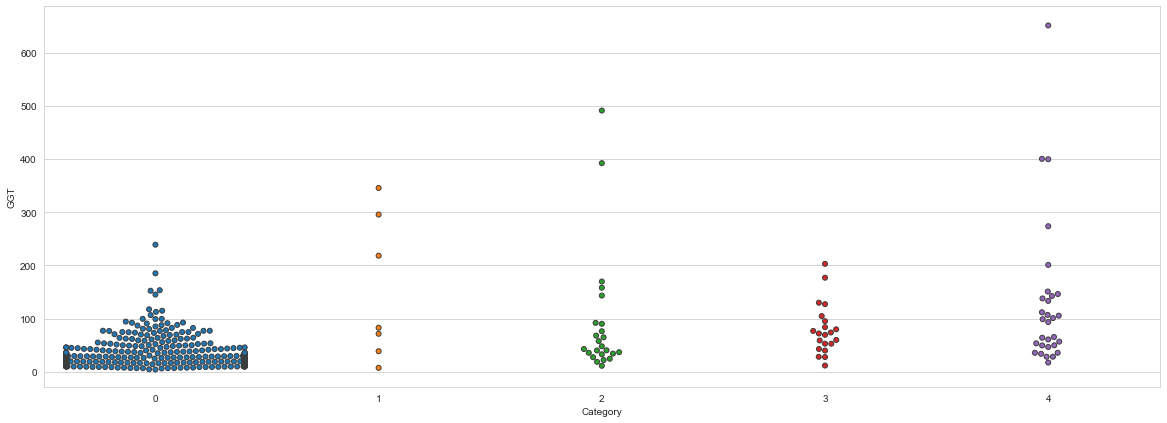

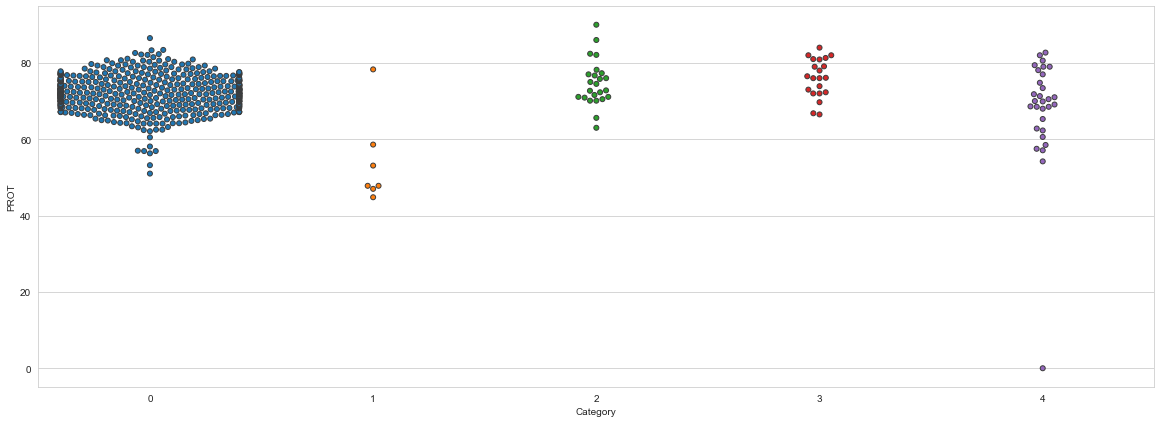

In [104]:
for i in [ 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']:
    plt.figure(figsize=(20,7))
    sns.swarmplot(x=df.Category,y=df[i],data=df,linewidth=1)
    plt.show()

In [105]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT', 'Age by Sex', 'Sex by Category'],
      dtype='object')

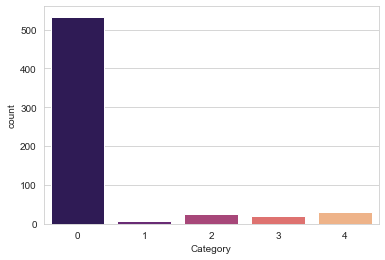

In [106]:
sns.countplot(x='Category',data=df,palette='magma')

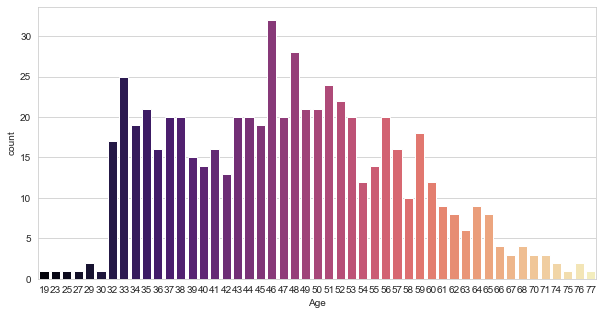

In [112]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=df,palette='magma')

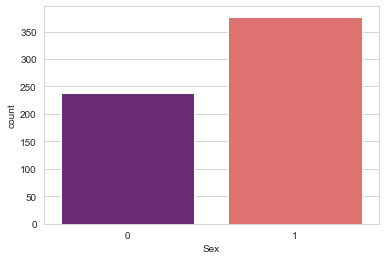

In [108]:
sns.countplot(x='Sex',data=df,palette='magma')

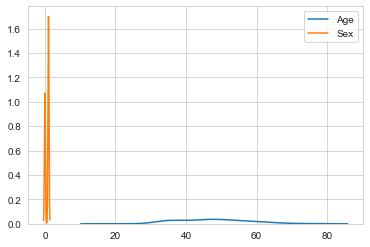

In [118]:
sns.kdeplot(df['Age'])
sns.kdeplot(df['Sex'])

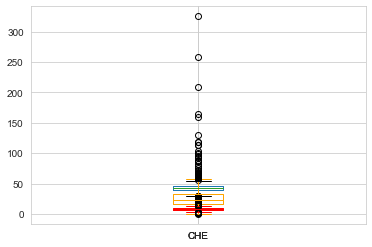

In [119]:
df.boxplot(column="ALB")
df.boxplot(column="ALT",color='orange')
df.boxplot(column="CHE",color='red')

In [120]:
import sweetviz as sv

In [121]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [124]:
from IPython.display import IFrame

In [125]:
IFrame(src='Analyze.html',width=1000,height=600)

In [126]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT', 'Age by Sex', 'Sex by Category'],
      dtype='object')

In [127]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [131]:
man=MinMaxScaler()
data=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']
df[data]=man.fit_transform(df[data])
df[data]

Category       Age  Sex       ALB       ALP       ALT       AST  \
0         0.0  0.224138  1.0  0.468370  0.126020  0.023670  0.036694   
1         0.0  0.224138  1.0  0.468370  0.168747  0.055334  0.044990   
2         0.0  0.224138  1.0  0.570560  0.179309  0.111282  0.134014   
3         0.0  0.224138  1.0  0.525547  0.124820  0.094067  0.038290   
4         0.0  0.224138  1.0  0.476886  0.177868  0.100215  0.045310   
..        ...       ...  ...       ...       ...       ...       ...   
610       1.0  0.741379  0.0  0.389294  1.000000  0.018137  0.318124   
611       1.0  0.775862  0.0  0.291971  0.246759  0.008915  0.107849   
612       1.0  0.775862  0.0  0.352798  0.209554  0.010759  0.282068   
613       1.0  0.465517  0.0  0.401460  0.000000  0.119889  0.164008   
614       1.0  0.689655  0.0  0.437956  0.000000  0.307409  0.221442   

          BIL       CHE      CHOL      CREA       GGT      PROT  
0    0.026461  0.367578  0.334023  0.091495  0.011757  0.766667  
1    0.012243  0.650434  0.496381  0.061619  0.017172  0.850000  
2    0.020932  0.494997  0.537746  0.072822  0.044400  0.881111  
3    0.071485  0.394263  0.490176  0.067221  0.045328  0.841111  
4    0.034755  0.515677  0.446743  0.063486  0.039295  0.763333  
..        ...       ...       ...       ...       ...       ...  
610  0.194313  0.276851  0.651499  0.044534  1.000000  0.761111  
611  0.075829  0.008005  0.312306  0.051349  0.048577  0.792222  
612  0.186414  0.016011  0.375388  0.054803  0.092358  0.911111  
613  0.075829  0.142762  0.434333  0.041079  0.070390  0.788889  
614  0.044234  0.510340  0.548087  0.055084  0.045637  0.755556  

[615 rows x 13 columns]

In [132]:
man=StandardScaler()
data=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']
df[data]=man.fit_transform(df[data])
df[data]

Category       Age       Sex       ALB        ALP       ALT       AST  \
0   -0.368060 -1.533616  0.794544 -0.507914  -0.490766 -0.813408 -0.383693   
1   -0.368060 -1.533616  0.794544 -0.507914   0.142923 -0.408758 -0.305057   
2   -0.368060 -1.533616  0.794544  0.889776   0.299565  0.306255  0.538767   
3   -0.368060 -1.533616  0.794544  0.274127  -0.508567  0.086251 -0.368571   
4   -0.368060 -1.533616  0.794544 -0.391440   0.278205  0.164824 -0.302033   
..        ...       ...       ...       ...        ...       ...       ...   
610  3.436254  1.452371 -1.258584 -1.589460  12.471389 -0.884124  2.283879   
611  3.436254  1.651437 -1.258584 -2.920594   1.299941 -1.001983  0.290761   
612  3.436254  1.651437 -1.258584 -2.088635   0.748132 -0.978412  1.942115   
613  3.436254 -0.140155 -1.258584 -1.423068  -2.359795  0.416258  0.823066   
614  3.436254  1.153773 -1.258584 -0.923893  -2.359795  2.812731  1.367468   

          BIL       CHE      CHOL      CREA        GGT      PROT  
0   -0.198236 -0.574734 -1.563246  0.497070  -0.502286 -0.477852  
1   -0.381375  1.349161 -0.366503 -0.146590  -0.438203  0.746576  
2   -0.269457  0.291926 -0.061600  0.094783  -0.115957  1.203695  
3    0.381706 -0.393234 -0.412238 -0.025903  -0.104971  0.615970  
4   -0.091404  0.432588 -0.732386 -0.106361  -0.176378 -0.526829  
..        ...       ...       ...       ...        ...       ...  
610  1.963828 -1.191832  0.776882 -0.514683  11.193789 -0.559480  
611  0.437665 -3.020439 -1.723320 -0.367848  -0.066521 -0.102361  
612  1.862083 -2.965989 -1.258343 -0.293425   0.451636  1.644489  
613  0.437665 -2.103866 -0.823857 -0.589106   0.191642 -0.151338  
614  0.030689  0.396289  0.014625 -0.287390  -0.101309 -0.641109  

[615 rows x 13 columns]